This assignment involves two parts focused on data visualization and statistical analysis using Python. In Part 1, you will create various visualizations, such as a scatter plot with statistical indicators, and write functions to generate figures. In Part 2, you will analyze stock market data for Apple, Microsoft, Google, Amazon, and Tesla, creating box plots for daily closing prices, scatter plots for closing prices versus trading volumes, and a bar chart for average closing prices.

## Part 1 (40 Points)

### Question 1 (10 pts)

Use the dataframe created in the next code cell and complete tasks 1-6 to generate the following figure:

1. Create a scatterplot, where the x-axis corresponds to the default index of the dataframe, and the y-axis represents the values from the column Y.

2. Calculate the mean of Y and show it as a solid horizontal line on the graph.

3. Calculate the standard deviation of Y and draw two dashed lines, each representing one standard deviation away from the mean.

4. Set x-axis and y-axis limits as [-1, 11] and [-20, 30] respectively.

5. Enhance plot clarity by removing ticks on the x-axis.

6. Set the legend in the bottom-right corner of the graph.

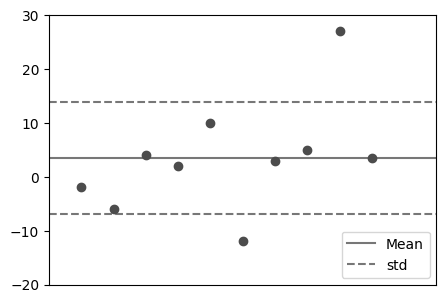

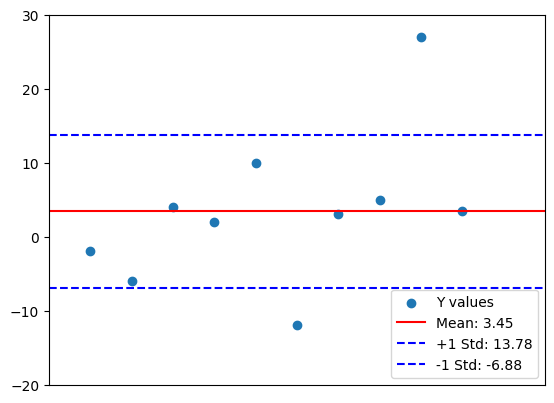

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

temp={"X":{"0":1,"1":5,"2":2,"3":4,"4":4,"5":5,"6":6,"7":7,"8":8,"9":6},"Y":{"0":-2.0,"1":-6.0,"2":4.0,"3":2.0,"4":10.0,"5":-12.0,"6":3.0,"7":5.0,"8":27.0,"9":3.5}}
df=pd.DataFrame(temp)



plt.scatter(df.index, df['Y'], label='Y values')

mean_y = df['Y'].mean()
std_y = df['Y'].std()


plt.axhline(y=mean_y, color='r', linestyle='-', label=f'Mean: {mean_y:.2f}')


plt.axhline(y=mean_y + std_y, color='b', linestyle='--', label=f'+1 Std: {mean_y + std_y:.2f}')
plt.axhline(y=mean_y - std_y, color='b', linestyle='--', label=f'-1 Std: {mean_y - std_y:.2f}')


plt.xlim([-1, 11])
plt.ylim([-20, 30])


plt.xticks([])

plt.legend(loc='lower right')


plt.show()


### Question 2 (15 pts)

Create a function named `CustomFig` that takes a DataFrame with a mix of categorical and numerical variables as input. The purpose of this function is to generate a figure consisting of two rows: the first row will display bar charts for all categorical variables, while the second row will display histograms for all numerical variables.

To accommodate cases where there are unequal number of columns such as 3 categorical and 2 numerical, the function dynamically removes any unused axes in each row. Additionally, the function sets the spacing between rows and subplots using `wspace=0.35` and `hspace=0.6` to ensure proper visual clarity.


#### Test Case

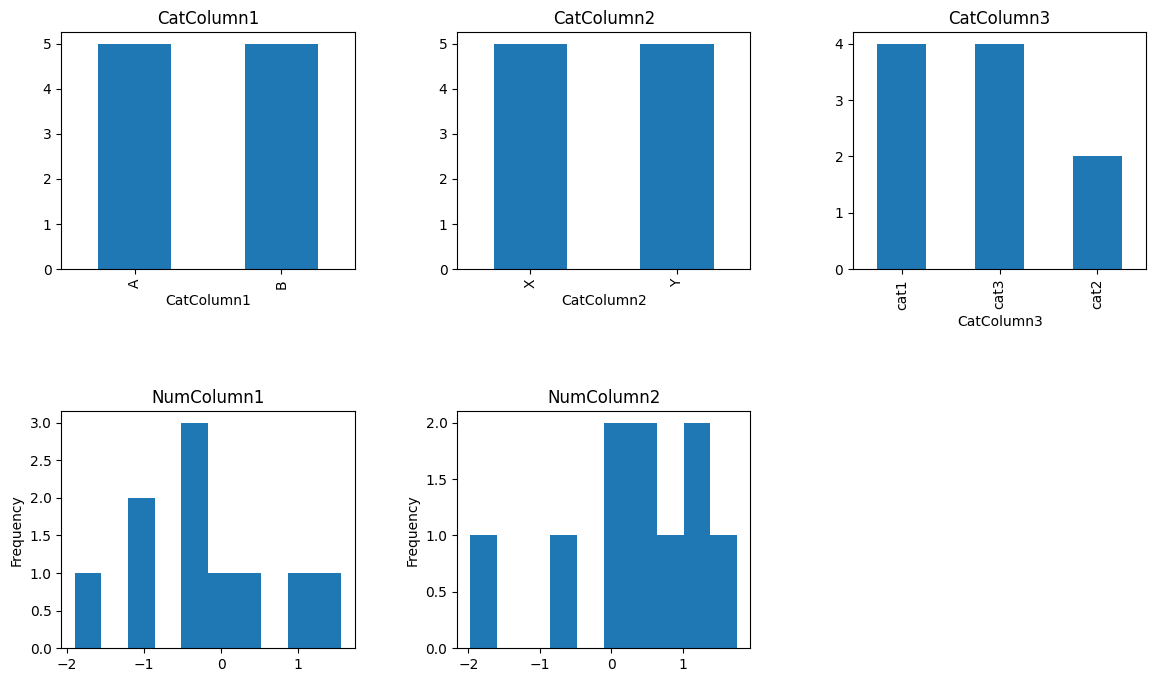

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def CustomFig(dataframe):
  columnCat = dataframe.select_dtypes(include=['object', 'category']).columns
  numCat = dataframe.select_dtypes(include=[np.number]).columns

  num_cats = len(columnCat)
  num_nums = len(numCat)

  fig, axes = plt.subplots(2, max(num_cats, num_nums), figsize=(14, 8))

  axes = axes.flatten()

  for i, col in enumerate(columnCat):
    dataframe[col].value_counts().plot(kind='bar', ax=axes[i], title=col)

  for i in range(num_cats, max(num_cats, num_nums)):
    fig.delaxes(axes[i])

  for i, col in enumerate(numCat):
    dataframe[col].plot(kind='hist', ax=axes[max(num_cats, num_nums) + i], title=col, bins=10)

  for i in range(num_nums, max(num_cats, num_nums)):
    fig.delaxes(axes[max(num_cats, num_nums) + i])

  plt.subplots_adjust(wspace=0.35, hspace=0.6)

  plt.show()

  data = {
    'CatColumn1': ['A', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'A', 'B'],
    'CatColumn2': ['X', 'Y', 'X', 'X', 'Y', 'Y', 'Y', 'X', 'X', 'Y'],
    'CatColumn3': ['cat1', 'cat1', 'cat1', 'cat1', 'cat2', 'cat2', 'cat3', 'cat3', 'cat3', 'cat3'],
    'NumColumn1': np.random.randn(10),
    'NumColumn2': np.random.randn(10),
}

df2 = pd.DataFrame(data)
CustomFig(df2)

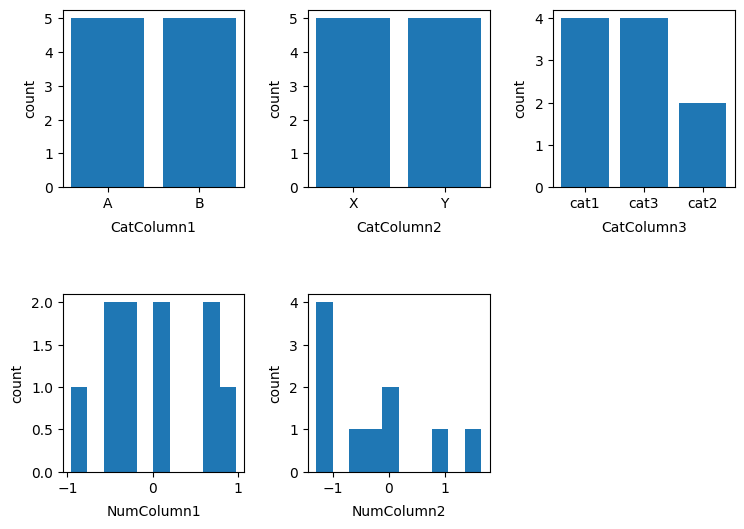

### Question 3 (15 pts)

Given a dataset with x variables (x1 to x10) and a y variable, perform the following tasks and create a bar chart to illustrate the correlation of each x variable with the y variable.

1. **Calculate Correlation Matrix:**
   Obtain the correlation matrix of the dataset to understand the relationships between x variables and the y variable.

3. **Absolute Values:**
   Take the absolute values of the correlation coefficients to focus on the strength of the relationships rather than their direction.

4. **Create Bar Chart:**
   Generate a bar chart where each bar represents the absolute strength of the correlation of a specific x variable with the y variable. set the `right and top` spines invisible

**To hide spines use the following code**

```
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
```

Upon successful completion of all tasks, the generated figure will appear as follows:

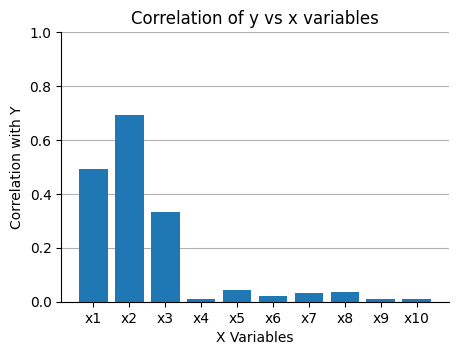

#### data

In [ ]:
temp3={"x1":{"0":0.3745401188,"1":0.9507143064,"2":0.7319939418,"3":0.5986584842,"4":0.1560186404,"5":0.1559945203,"6":0.0580836122,"7":0.8661761458,"8":0.6011150117,"9":0.7080725778,"10":0.0205844943,"11":0.9699098522,"12":0.8324426408,"13":0.2123391107,"14":0.1818249672,"15":0.1834045099,"16":0.304242243,"17":0.5247564316,"18":0.4319450186,"19":0.2912291402,"20":0.6118528947,"21":0.1394938607,"22":0.2921446485,"23":0.3663618433,"24":0.4560699842,"25":0.7851759614,"26":0.1996737822,"27":0.5142344384,"28":0.5924145689,"29":0.0464504127,"30":0.6075448519,"31":0.1705241237,"32":0.065051593,"33":0.9488855373,"34":0.9656320331,"35":0.8083973481,"36":0.3046137692,"37":0.097672114,"38":0.6842330265,"39":0.4401524937,"40":0.1220382348,"41":0.4951769101,"42":0.0343885211,"43":0.9093204021,"44":0.2587799816,"45":0.6625222844,"46":0.3117110761,"47":0.5200680212,"48":0.5467102793,"49":0.1848544555,"50":0.9695846278,"51":0.7751328234,"52":0.9394989416,"53":0.8948273504,"54":0.5978999788,"55":0.921874235,"56":0.0884925021,"57":0.1959828624,"58":0.0452272889,"59":0.3253303308,"60":0.3886772897,"61":0.2713490318,"62":0.8287375092,"63":0.3567533267,"64":0.2809345097,"65":0.5426960832,"66":0.140924225,"67":0.8021969808,"68":0.0745506437,"69":0.9868869366,"70":0.7722447693,"71":0.1987156815,"72":0.0055221171,"73":0.8154614285,"74":0.7068573438,"75":0.729007168,"76":0.7712703467,"77":0.0740446517,"78":0.3584657285,"79":0.1158690595,"80":0.8631034259,"81":0.6232981268,"82":0.3308980249,"83":0.0635583503,"84":0.3109823217,"85":0.325183322,"86":0.7296061783,"87":0.6375574714,"88":0.8872127426,"89":0.4722149252,"90":0.1195942459,"91":0.7132447872,"92":0.7607850486,"93":0.5612771976,"94":0.77096718,"95":0.4937955964,"96":0.5227328294,"97":0.4275410184,"98":0.0254191267,"99":0.107891427,"100":0.0314291857,"101":0.6364104113,"102":0.3143559811,"103":0.5085706912,"104":0.9075664739,"105":0.2492922291,"106":0.410382923,"107":0.7555511385,"108":0.2287981655,"109":0.0769799098,"110":0.2897514529,"111":0.1612212873,"112":0.9296976523,"113":0.8081203796,"114":0.6334037565,"115":0.8714605902,"116":0.8036720769,"117":0.1865700589,"118":0.8925589985,"119":0.5393422419,"120":0.8074401552,"121":0.8960912999,"122":0.318003475,"123":0.1100519245,"124":0.2279351625,"125":0.4271077886,"126":0.8180147659,"127":0.8607305833,"128":0.0069521305,"129":0.5107473026,"130":0.4174110031,"131":0.2221078105,"132":0.1198653673,"133":0.3376151714,"134":0.9429097039,"135":0.323202932,"136":0.5187906217,"137":0.7030189589,"138":0.3636296024,"139":0.9717820827,"140":0.9624472949,"141":0.2517822958,"142":0.4972485059,"143":0.3008783098,"144":0.2848404944,"145":0.0368869474,"146":0.609564334,"147":0.5026790232,"148":0.0514787512,"149":0.2786464642,"150":0.908265886,"151":0.2395618907,"152":0.1448948721,"153":0.4894527603,"154":0.9856504541,"155":0.2420552715,"156":0.6721355474,"157":0.7616196153,"158":0.237637544,"159":0.7282163486,"160":0.3677831327,"161":0.6323058306,"162":0.6335297108,"163":0.5357746841,"164":0.0902897701,"165":0.8353024956,"166":0.320780065,"167":0.1865185104,"168":0.0407751416,"169":0.5908929432,"170":0.6775643618,"171":0.0165878289,"172":0.5120930583,"173":0.2264957752,"174":0.6451727904,"175":0.174366429,"176":0.6909377381,"177":0.3867353463,"178":0.9367299887,"179":0.1375209441,"180":0.3410663511,"181":0.1134735212,"182":0.9246936183,"183":0.8773393534,"184":0.2579416277,"185":0.659984046,"186":0.8172222002,"187":0.5552008116,"188":0.5296505784,"189":0.2418522909,"190":0.0931027678,"191":0.897215758,"192":0.9004180572,"193":0.6331014573,"194":0.339029791,"195":0.3492095746,"196":0.7259556789,"197":0.89711026,"198":0.8870864243,"199":0.7798755459,"200":0.6420316462,"201":0.084139965,"202":0.1616287141,"203":0.8985541885,"204":0.6064290597,"205":0.0091970516,"206":0.1014715429,"207":0.6635017691,"208":0.0050615838,"209":0.1608080514,"210":0.5487337894,"211":0.6918951977,"212":0.6519612595,"213":0.2242693095,"214":0.7121792213,"215":0.2372490875,"216":0.3253996982,"217":0.7464914051,"218":0.649632899,"219":0.8492234105,"220":0.6576128923,"221":0.5683086033,"222":0.0936747678,"223":0.3677158031,"224":0.2652023677,"225":0.2439896434,"226":0.9730105548,"227":0.3930977247,"228":0.8920465552,"229":0.631138626,"230":0.7948113035,"231":0.5026370931,"232":0.5769038846,"233":0.4925176938,"234":0.1952429878,"235":0.7224521153,"236":0.2807723624,"237":0.0243159664,"238":0.6454722959,"239":0.1771106794,"240":0.9404585844,"241":0.953928577,"242":0.9148643902,"243":0.3701587003,"244":0.0154566165,"245":0.9283185626,"246":0.4281841483,"247":0.966654819,"248":0.9636199771,"249":0.8530094555,"250":0.2944488921,"251":0.3850977286,"252":0.8511366715,"253":0.3169220052,"254":0.1694927467,"255":0.5568012625,"256":0.9361547742,"257":0.6960297967,"258":0.5700611701,"259":0.0971764938,"260":0.6150072267,"261":0.9900538501,"262":0.1400840152,"263":0.5183296524,"264":0.8773730719,"265":0.7407686178,"266":0.697015741,"267":0.702484084,"268":0.3594911512,"269":0.2935918443,"270":0.8093611555,"271":0.8101133947,"272":0.8670723186,"273":0.9132405526,"274":0.5113423989,"275":0.5015162947,"276":0.798295179,"277":0.6499639308,"278":0.7019668773,"279":0.7957926694,"280":0.8900053418,"281":0.3379951569,"282":0.3755829526,"283":0.0939819398,"284":0.578280141,"285":0.0359422738,"286":0.4655980181,"287":0.5426446347,"288":0.2865412521,"289":0.5908332606,"290":0.0305002499,"291":0.0373481887,"292":0.8226005607,"293":0.3601906414,"294":0.1270605127,"295":0.5222432601,"296":0.7699935531,"297":0.2158210275,"298":0.6228904758,"299":0.085347465,"300":0.0516817212,"301":0.5313546316,"302":0.5406351216,"303":0.6374299015,"304":0.7260913337,"305":0.9758520795,"306":0.5163003483,"307":0.3229564729,"308":0.7951861948,"309":0.2708322513,"310":0.4389714207,"311":0.0784563813,"312":0.0253507434,"313":0.9626484147,"314":0.8359801205,"315":0.6959742061,"316":0.4089529444,"317":0.1732943201,"318":0.1564370427,"319":0.2502428982,"320":0.5492266647,"321":0.7145959227,"322":0.6601973767,"323":0.2799338969,"324":0.9548652807,"325":0.7378969167,"326":0.5543540525,"327":0.6117207462,"328":0.4196000624,"329":0.2477309895,"330":0.3559726787,"331":0.7578461105,"332":0.0143934886,"333":0.1160726405,"334":0.046002642,"335":0.0407288023,"336":0.855460584,"337":0.7036578594,"338":0.4741738291,"339":0.0978341607,"340":0.4916158751,"341":0.4734717708,"342":0.1732018699,"343":0.4338516492,"344":0.3985047344,"345":0.6158500981,"346":0.6350936509,"347":0.0453040098,"348":0.3746126146,"349":0.6258599157,"350":0.5031362586,"351":0.8564898412,"352":0.6586936316,"353":0.1629344271,"354":0.0705687474,"355":0.6424192782,"356":0.0265113105,"357":0.5857755813,"358":0.9402302414,"359":0.5754741779,"360":0.3881699262,"361":0.6432882184,"362":0.4582528905,"363":0.5456167893,"364":0.9414648088,"365":0.3861026378,"366":0.9611905638,"367":0.905350642,"368":0.1957911348,"369":0.0693613009,"370":0.1007780014,"371":0.0182218257,"372":0.0944429608,"373":0.6830067734,"374":0.0711886485,"375":0.3189756303,"376":0.844875311,"377":0.0232719357,"378":0.8144684826,"379":0.2818547748,"380":0.1181648276,"381":0.6967371654,"382":0.6289428468,"383":0.8774720135,"384":0.7350710438,"385":0.8034809304,"386":0.2820345726,"387":0.1774395438,"388":0.7506147516,"389":0.8068347393,"390":0.990505142,"391":0.4126176769,"392":0.3720180858,"393":0.7764129607,"394":0.3408035403,"395":0.9307573256,"396":0.8584127518,"397":0.4289940274,"398":0.7508710678,"399":0.7545428741,"400":0.1031238688,"401":0.9025529067,"402":0.5052523724,"403":0.8264574661,"404":0.320049601,"405":0.8955232285,"406":0.3892016787,"407":0.0108376515,"408":0.9053819764,"409":0.0912866768,"410":0.3193136376,"411":0.9500619671,"412":0.9506071469,"413":0.5734378881,"414":0.6318372122,"415":0.448445522,"416":0.2932107717,"417":0.3286645454,"418":0.6725184561,"419":0.7523745294,"420":0.7915790437,"421":0.7896181428,"422":0.091206103,"423":0.4944203047,"424":0.05755876,"425":0.5495288823,"426":0.4415305014,"427":0.8877041828,"428":0.3509150126,"429":0.1170670164,"430":0.1429916821,"431":0.7615106317,"432":0.6182180633,"433":0.1011226761,"434":0.0841068061,"435":0.7009691315,"436":0.0727630064,"437":0.8218600593,"438":0.7062422272,"439":0.0813487806,"440":0.0848377141,"441":0.9866395785,"442":0.3742707958,"443":0.3706421471,"444":0.8127995673,"445":0.9472485774,"446":0.9860010638,"447":0.7533781853,"448":0.3762595855,"449":0.0835007167,"450":0.7771469159,"451":0.5584042497,"452":0.4242220092,"453":0.9063543851,"454":0.1111974823,"455":0.4926251043,"456":0.0113536448,"457":0.468660642,"458":0.0563032757,"459":0.1188179163,"460":0.1175262468,"461":0.6492103021,"462":0.7460448793,"463":0.5833687651,"464":0.9621725485,"465":0.3748705795,"466":0.2857120863,"467":0.8685991282,"468":0.2235958385,"469":0.9632225394,"470":0.0121544747,"471":0.9698788267,"472":0.043159912,"473":0.8911431137,"474":0.5277011091,"475":0.9929647961,"476":0.0737965647,"477":0.5538542844,"478":0.9693025356,"479":0.5230978442,"480":0.6293986381,"481":0.695748689,"482":0.4545410648,"483":0.6275580801,"484":0.5843143119,"485":0.9011580105,"486":0.0454463803,"487":0.2809631896,"488":0.9504114841,"489":0.8902637839,"490":0.4556567528,"491":0.6201325978,"492":0.277381183,"493":0.1881211597,"494":0.4636984049,"495":0.353352228,"496":0.5836561119,"497":0.077734637,"498":0.9743948077,"499":0.9862107445,"500":0.698161714,"501":0.5360963663,"502":0.3095276163,"503":0.8137950197,"504":0.6847311726,"505":0.1626169393,"506":0.9109271845,"507":0.8225372429,"508":0.9497999133,"509":0.7257195084,"510":0.6134151959,"511":0.4182430363,"512":0.9327284834,"513":0.8660638895,"514":0.0452186701,"515":0.0263669745,"516":0.3764633669,"517":0.8105533308,"518":0.9872761293,"519":0.1504168911,"520":0.5941307154,"521":0.3808908566,"522":0.9699143978,"523":0.8421189231,"524":0.8383287047,"525":0.4686931598,"526":0.4148195023,"527":0.2734070719,"528":0.0563754967,"529":0.8647223763,"530":0.8129010091,"531":0.9997176733,"532":0.9966368371,"533":0.5554317056,"534":0.7689874152,"535":0.9447657299,"536":0.8496473907,"537":0.2473481017,"538":0.4505441353,"539":0.1291594152,"540":0.9540510273,"541":0.6061746345,"542":0.2286428055,"543":0.6717006844,"544":0.6181282405,"545":0.358162718,"546":0.1135575922,"547":0.6715731956,"548":0.5203077009,"549":0.7723183917,"550":0.5201635011,"551":0.8521815003,"552":0.5519068388,"553":0.5609379715,"554":0.8766536027,"555":0.4034828662,"556":0.1340152285,"557":0.0287826763,"558":0.7551372557,"559":0.6203095514,"560":0.7040797681,"561":0.2129641615,"562":0.1363714756,"563":0.0145446657,"564":0.3505875588,"565":0.5899176869,"566":0.3922440451,"567":0.437474922,"568":0.9041586945,"569":0.348255467,"570":0.5139894892,"571":0.7836530127,"572":0.3965427823,"573":0.6220867002,"574":0.8623637087,"575":0.9495206237,"576":0.1470734809,"577":0.9265876252,"578":0.4921162931,"579":0.2582443883,"580":0.4591357562,"581":0.9800325753,"582":0.492618094,"583":0.3287516103,"584":0.6334008543,"585":0.2401456188,"586":0.0758633281,"587":0.1288797219,"588":0.128045839,"589":0.1519026935,"590":0.1388271726,"591":0.6408747448,"592":0.1818800844,"593":0.3456672833,"594":0.8967884099,"595":0.4739616403,"596":0.6675577385,"597":0.1723198712,"598":0.1922890188,"599":0.0408686163,"600":0.1689350631,"601":0.278590339,"602":0.1770104843,"603":0.0887025338,"604":0.1206358711,"605":0.460778768,"606":0.2063337184,"607":0.364269861,"608":0.5034172709,"609":0.6903948286,"610":0.0393121398,"611":0.7994103989,"612":0.6279003895,"613":0.0817590319,"614":0.8735786241,"615":0.9208724005,"616":0.0610779599,"617":0.2768776481,"618":0.8062012798,"619":0.7482596904,"620":0.1845210194,"621":0.2093493233,"622":0.3704721028,"623":0.4845229852,"624":0.6182547715,"625":0.3689136396,"626":0.4625347161,"627":0.7474709381,"628":0.0366832029,"629":0.2524369443,"630":0.7133495859,"631":0.8952068377,"632":0.5116774421,"633":0.5321134853,"634":0.1071720113,"635":0.4474123668,"636":0.5326172665,"637":0.2424705036,"638":0.2692432309,"639":0.3772841631,"640":0.0200711978,"641":0.3220791656,"642":0.211448007,"643":0.3274973522,"644":0.1197621318,"645":0.8905272807,"646":0.5935924536,"647":0.6791023191,"648":0.7891712386,"649":0.4984421989,"650":0.0869202881,"651":0.5371065418,"652":0.586841118,"653":0.7454394742,"654":0.4316595462,"655":0.1275803028,"656":0.2837759058,"657":0.3630822964,"658":0.6459172413,"659":0.5707783047,"660":0.3560967259,"661":0.9865152488,"662":0.6057748194,"663":0.2372267917,"664":0.1017824726,"665":0.1528591392,"666":0.2459577284,"667":0.1606813733,"668":0.1865670241,"669":0.2850951687,"670":0.1733735953,"671":0.8967654246,"672":0.0802337457,"673":0.5245113896,"674":0.410396827,"675":0.9823786169,"676":0.1120389022,"677":0.397855599,"678":0.9694704333,"679":0.8655071259,"680":0.8170720709,"681":0.257902827,"682":0.1708875874,"683":0.6686432199,"684":0.9293759891,"685":0.556762893,"686":0.5716126895,"687":0.2799790937,"688":0.7694929332,"689":0.1870437486,"690":0.3236792364,"691":0.4254364386,"692":0.5076103787,"693":0.2424097324,"694":0.1148368247,"695":0.6106200424,"696":0.2886305532,"697":0.5812382214,"698":0.1543627153,"699":0.4811401019,"700":0.5325894326,"701":0.0518235368,"702":0.3366042782,"703":0.1344146769,"704":0.0633749705,"705":0.9899602324,"706":0.322353845,"707":0.8098744459,"708":0.2546406548,"709":0.6815027222,"710":0.7602278599,"711":0.5956387406,"712":0.4715761886,"713":0.4118409141,"714":0.3488682665,"715":0.9295291442,"716":0.8306194078,"717":0.9650269107,"718":0.1242972235,"719":0.7308674752,"720":0.9383404568,"721":0.1812330662,"722":0.0664962674,"723":0.7411206493,"724":0.5744731132,"725":0.8418287768,"726":0.1397723766,"727":0.7952673119,"728":0.20162732,"729":0.1636559429,"730":0.1642657979,"731":0.8145747202,"732":0.6651972207,"733":0.5230654248,"734":0.3588304841,"735":0.8772005408,"736":0.3924451074,"737":0.8165994395,"738":0.4391349086,"739":0.3769444294,"740":0.4626797857,"741":0.3013778742,"742":0.7476093802,"743":0.5027203901,"744":0.2322126951,"745":0.8995745733,"746":0.3838912214,"747":0.5435528611,"748":0.906472111,"749":0.6242379959,"750":0.1168980407,"751":0.9398321236,"752":0.6277080531,"753":0.3349056147,"754":0.1392720727,"755":0.7940251893,"756":0.6200727559,"757":0.533461092,"758":0.8938925831,"759":0.7885972112,"760":0.1516748797,"761":0.3117220678,"762":0.2484891398,"763":0.7439462926,"764":0.0335324347,"765":0.5698896849,"766":0.7624586857,"767":0.8767656368,"768":0.3420817487,"769":0.8212573047,"770":0.110631737,"771":0.8464522917,"772":0.1274886623,"773":0.3972872906,"774":0.7972953658,"775":0.1499174273,"776":0.2292513952,"777":0.7222525684,"778":0.7200365365,"779":0.6411476329,"780":0.6939484445,"781":0.5427244433,"782":0.2517990589,"783":0.3456959935,"784":0.1815977168,"785":0.9084505613,"786":0.5833917948,"787":0.4008514168,"788":0.4620058036,"789":0.9472833396,"790":0.1533514031,"791":0.586229832,"792":0.5058886789,"793":0.6114542354,"794":0.0181101838,"795":0.8721239089,"796":0.9321182825,"797":0.5651331836,"798":0.6966508239,"799":0.9224993812,"800":0.7072386343,"801":0.1525390429,"802":0.5762883602,"803":0.6067150464,"804":0.4241306713,"805":0.7364442356,"806":0.9343670148,"807":0.9255685129,"808":0.4508393714,"809":0.1132380458,"810":0.984841199,"811":0.8388980864,"812":0.1246626812,"813":0.9208418826,"814":0.8698963621,"815":0.5188380571,"816":0.5912754357,"817":0.3990027039,"818":0.0547616388,"819":0.3351972416,"820":0.8028534486,"821":0.004632023,"822":0.3334991717,"823":0.3981686936,"824":0.5373956029,"825":0.9198556164,"826":0.3463459944,"827":0.3469532019,"828":0.7375012481,"829":0.4522179409,"830":0.2246048229,"831":0.4524395161,"832":0.1408570204,"833":0.1763869865,"834":0.4983677727,"835":0.4189254495,"836":0.9148459011,"837":0.3623938991,"838":0.5805883503,"839":0.6322642879,"840":0.0130944566,"841":0.663537372,"842":0.1780359669,"843":0.9610703175,"844":0.1486627278,"845":0.4146241237,"846":0.0853496681,"847":0.9968742518,"848":0.5021950103,"849":0.5953850173,"850":0.0670764774,"851":0.7499604704,"852":0.2099055931,"853":0.8980542894,"854":0.2051396405,"855":0.1906877207,"856":0.0365496678,"857":0.4720669451,"858":0.5648411333,"859":0.0657086394,"860":0.7755276167,"861":0.4532888347,"862":0.5243902693,"863":0.4407627469,"864":0.4007630609,"865":0.5596403313,"866":0.1552402459,"867":0.1819281305,"868":0.861785621,"869":0.9461154621,"870":0.3733093163,"871":0.2707446731,"872":0.6439995432,"873":0.4087341711,"874":0.0253863557,"875":0.1561525974,"876":0.7159722288,"877":0.6589239419,"878":0.0270959925,"879":0.2219721619,"880":0.2310747966,"881":0.6718927436,"882":0.0197105378,"883":0.104108582,"884":0.7999160854,"885":0.1785446621,"886":0.6527461079,"887":0.238182781,"888":0.0994413928,"889":0.243172191,"890":0.7222669319,"891":0.8556964681,"892":0.8302198646,"893":0.3971835296,"894":0.6680851366,"895":0.2049842954,"896":0.2931477303,"897":0.8963358185,"898":0.0130019235,"899":0.0855085309,"900":0.2078862551,"901":0.0265322039,"902":0.1814354351,"903":0.583041561,"904":0.4214245506,"905":0.8926717111,"906":0.8174435617,"907":0.3418173517,"908":0.2594234334,"909":0.3796924082,"910":0.5902949425,"911":0.2680636408,"912":0.6241489078,"913":0.4094116522,"914":0.5520471809,"915":0.4361265291,"916":0.2944657595,"917":0.948453307,"918":0.7636057942,"919":0.1401131758,"920":0.8684679759,"921":0.4874311982,"922":0.8945522269,"923":0.7998552559,"924":0.4252135045,"925":0.0224693083,"926":0.2686773594,"927":0.5416342147,"928":0.6334782198,"929":0.2578876854,"930":0.1393560741,"931":0.8349302368,"932":0.9844021807,"933":0.5256901823,"934":0.1716792858,"935":0.2723073265,"936":0.0183906765,"937":0.9142988066,"938":0.1177510829,"939":0.5765164755,"940":0.2740552207,"941":0.5541780025,"942":0.6514203884,"943":0.8297418037,"944":0.2064212718,"945":0.0109958287,"946":0.1368856301,"947":0.9000186418,"948":0.8738900776,"949":0.5974131022,"950":0.6005168604,"951":0.6650366745,"952":0.1753712786,"953":0.9144119459,"954":0.4187705249,"955":0.3831385282,"956":0.5189177053,"957":0.0469659668,"958":0.1662833688,"959":0.7380336164,"960":0.0827986679,"961":0.6031521095,"962":0.2453491097,"963":0.389295614,"964":0.2886937368,"965":0.3556727165,"966":0.7190459052,"967":0.2971217156,"968":0.5664046403,"969":0.4760504022,"970":0.6636711654,"971":0.9368297393,"972":0.7325720972,"973":0.2149403786,"974":0.0311831351,"975":0.2622640443,"976":0.5950779307,"977":0.0514258135,"978":0.4963662472,"979":0.5968428489,"980":0.3342438908,"981":0.7709122037,"982":0.1065982531,"983":0.0751377817,"984":0.7281887562,"985":0.4954913162,"986":0.6884023964,"987":0.4348273386,"988":0.2464020332,"989":0.8191023177,"990":0.799415879,"991":0.6946964709,"992":0.2721451372,"993":0.5902306669,"994":0.3609738969,"995":0.0915820733,"996":0.9173135755,"997":0.1368186309,"998":0.9502373538,"999":0.446005773},"x2":{"0":0.1851329288,"1":0.5419009474,"2":0.8729458359,"3":0.7322248864,"4":0.8065611479,"5":0.6587833667,"6":0.6922765645,"7":0.8491956516,"8":0.2496680089,"9":0.4894249636,"10":0.2212094418,"11":0.987668008,"12":0.9440593397,"13":0.0394268114,"14":0.7055751725,"15":0.9252483174,"16":0.1805753451,"17":0.5679452306,"18":0.9154882976,"19":0.0339459786,"20":0.6974202672,"21":0.2973490074,"22":0.9243961954,"23":0.9710582452,"24":0.9442664891,"25":0.4742142167,"26":0.862042651,"27":0.8445493985,"28":0.3191004732,"29":0.8289154742,"30":0.0370076347,"31":0.5962698785,"32":0.2300088373,"33":0.1205668858,"34":0.0769532016,"35":0.6962887759,"36":0.3398749638,"37":0.7247667715,"38":0.0653563408,"39":0.3152903378,"40":0.5394912924,"41":0.7907231648,"42":0.3187525029,"43":0.6258913764,"44":0.8859777482,"45":0.6158631882,"46":0.2329594748,"47":0.0244007816,"48":0.8700988739,"49":0.0212694109,"50":0.8747016727,"51":0.528937134,"52":0.9390676985,"53":0.7987832358,"54":0.9979341105,"55":0.3507118155,"56":0.7671882889,"57":0.4019309136,"58":0.4798756203,"59":0.6275054632,"60":0.8736771142,"61":0.9840834692,"62":0.7682734139,"63":0.4177667822,"64":0.4213570023,"65":0.7375823016,"66":0.2387771458,"67":0.1104741131,"68":0.3546221576,"69":0.2872389917,"70":0.2963081205,"71":0.233607751,"72":0.0420931896,"73":0.0178739347,"74":0.9877223897,"75":0.4277731337,"76":0.3843266472,"77":0.6796472827,"78":0.2182538879,"79":0.949961184,"80":0.7863450144,"81":0.0894110023,"82":0.4175807758,"83":0.8791183076,"84":0.9447320223,"85":0.4674015112,"86":0.6134113892,"87":0.1670339461,"88":0.9911686261,"89":0.2316717014,"90":0.9427317741,"91":0.649646649,"92":0.6077367949,"93":0.512688511,"94":0.2306698117,"95":0.176528032,"96":0.2204862091,"97":0.1864382621,"98":0.7795844736,"99":0.3501252592,"100":0.0578426766,"101":0.9691026301,"102":0.883785885,"103":0.9277522832,"104":0.9949078226,"105":0.1738952492,"106":0.3962420189,"107":0.7582384757,"108":0.6960206181,"109":0.1538959063,"110":0.815833125,"111":0.2244405718,"112":0.2238176148,"113":0.5369744229,"114":0.5929399348,"115":0.5800862078,"116":0.0914868374,"117":0.8774608626,"118":0.2656000426,"119":0.1295149213,"120":0.8887480799,"121":0.9556514982,"122":0.8621276173,"123":0.8095160747,"124":0.6552419806,"125":0.5508573706,"126":0.0869867599,"127":0.4084532131,"128":0.372688517,"129":0.2597537838,"130":0.7234201137,"131":0.4958757351,"132":0.0810462159,"133":0.2201832019,"134":0.6832587637,"135":0.0761308595,"136":0.851206914,"137":0.495146527,"138":0.4805865773,"139":0.5924077847,"140":0.8246809659,"141":0.3478092079,"142":0.6780161526,"143":0.565731964,"144":0.2670282702,"145":0.8786299864,"146":0.7974260216,"147":0.6584518347,"148":0.8505817291,"149":0.867294201,"150":0.7083629767,"151":0.8370133284,"152":0.6974714617,"153":0.6801407718,"154":0.6186113782,"155":0.7527166396,"156":0.1586051053,"157":0.8808707592,"158":0.8718435277,"159":0.029247283,"160":0.8258167506,"161":0.1288698675,"162":0.3351188543,"163":0.7435082563,"164":0.160759896,"165":0.8179670241,"166":0.832134178,"167":0.5074677338,"168":0.0063858717,"169":0.2870381332,"170":0.6169269184,"171":0.981186178,"172":0.631813527,"173":0.2598035811,"174":0.6340057031,"175":0.5399853797,"176":0.7798453952,"177":0.1069806388,"178":0.7610279025,"179":0.5412665787,"180":0.9629920039,"181":0.341872166,"182":0.6326218931,"183":0.9320281055,"184":0.102509728,"185":0.9372284872,"186":0.6878857223,"187":0.0678370591,"188":0.3009635669,"189":0.7081720886,"190":0.0673506015,"191":0.5821704602,"192":0.345883057,"193":0.6209155178,"194":0.0457420338,"195":0.8715368062,"196":0.9734889692,"197":0.9688778553,"198":0.7496518317,"199":0.1300862401,"200":0.7582631959,"201":0.0245869165,"202":0.0221235515,"203":0.3236102191,"204":0.4886431904,"205":0.7704074178,"206":0.6832953766,"207":0.4459027064,"208":0.2736266663,"209":0.9971245002,"210":0.4261813022,"211":0.4513870243,"212":0.1636238212,"213":0.7948095487,"214":0.6936822258,"215":0.2207696128,"216":0.0823810456,"217":0.6804993021,"218":0.6545112143,"219":0.273259527,"220":0.9508635623,"221":0.1510578918,"222":0.432334801,"223":0.9436159202,"224":0.4197273169,"225":0.6385259477,"226":0.397594398,"227":0.2742152023,"228":0.983977648,"229":0.4093340063,"230":0.8940992037,"231":0.2299546059,"232":0.213104704,"233":0.0311340829,"234":0.6516668254,"235":0.3685263437,"236":0.8643582498,"237":0.4732099067,"238":0.9681934279,"239":0.1855255157,"240":0.868623168,"241":0.7765968528,"242":0.7709218446,"243":0.8447832281,"244":0.7610239909,"245":0.6262203216,"246":0.1312448777,"247":0.0325261795,"248":0.9208478478,"249":0.6166503145,"250":0.796537291,"251":0.4815223515,"252":0.117308189,"253":0.1251857922,"254":0.6855652872,"255":0.4303058949,"256":0.2005247267,"257":0.4915945467,"258":0.0642089371,"259":0.5819714019,"260":0.2689934044,"261":0.7975591006,"262":0.3103619589,"263":0.4552201491,"264":0.0116205399,"265":0.0724468878,"266":0.3924935564,"267":0.4799388347,"268":0.6000205481,"269":0.2916625787,"270":0.6949818861,"271":0.8601223972,"272":0.7798509889,"273":0.0396188253,"274":0.4805069473,"275":0.1049301784,"276":0.2420450159,"277":0.9866625933,"278":0.1424955429,"279":0.4988881535,"280":0.6181557343,"281":0.7024649705,"282":0.5596486835,"283":0.0097708474,"284":0.3264613082,"285":0.5177116434,"286":0.0878664991,"287":0.3506269312,"288":0.0332031088,"289":0.0785784972,"290":0.3969232762,"291":0.132715754,"292":0.5675408483,"293":0.6894649691,"294":0.8005866991,"295":0.2001502442,"296":0.1674825823,"297":0.1045678403,"298":0.6364302495,"299":0.7064757265,"300":0.0315861448,"301":0.9362122462,"302":0.0519712837,"303":0.5412963353,"304":0.7090605195,"305":0.8709691237,"306":0.7140869321,"307":0.8017280831,"308":0.3394501925,"309":0.8148251137,"310":0.0801148464,"311":0.8948166561,"312":0.5475923762,"313":0.81729777,"314":0.4523182845,"315":0.6435776952,"316":0.5264026609,"317":0.7315895218,"318":0.081629982,"319":0.060352084,"320":0.247103234,"321":0.1595446801,"322":0.8717835666,"323":0.2192139874,"324":0.9758652558,"325":0.3368957918,"326":0.1821179157,"327":0.7896985071,"328":0.6587077755,"329":0.4981957165,"330":0.5553635509,"331":0.7192017783,"332":0.2284547413,"333":0.9963339161,"334":0.9747931621,"335":0.6503256863,"336":0.1995424509,"337":0.6802282424,"338":0.072198409,"339":0.0306525022,"340":0.2576828885,"341":0.4626229567,"342":0.8682725054,"343":0.7271690698,"344":0.7427065212,"345":0.4254933344,"346":0.3459349925,"347":0.371038763,"348":0.9876495637,"349":0.0401091914,"350":0.8670314961,"351":0.5786754086,"352":0.4386154192,"353":0.7252576604,"354":0.4866689414,"355":0.8734232381,"356":0.900701864,"357":0.4217209269,"358":0.2768277972,"359":0.5923503286,"360":0.9123633456,"361":0.210662189,"362":0.6229665836,"363":0.6315602201,"364":0.7331130224,"365":0.1315676851,"366":0.7158249647,"367":0.9090325207,"368":0.1796831089,"369":0.2375433249,"370":0.971395094,"371":0.1809769527,"372":0.8543850934,"373":0.4922778564,"374":0.2472310744,"375":0.8707499013,"376":0.445305255,"377":0.5148173539,"378":0.3592333694,"379":0.5929508514,"380":0.1635238726,"381":0.3910815367,"382":0.9694123223,"383":0.2581334327,"384":0.6567366645,"385":0.3251900642,"386":0.7734731257,"387":0.1308736607,"388":0.9698210451,"389":0.4537895414,"390":0.2360504633,"391":0.0734967473,"392":0.1697579051,"393":0.5197739486,"394":0.3370031764,"395":0.8288833659,"396":0.4308875237,"397":0.2487142726,"398":0.6171449866,"399":0.7067772169,"400":0.1670419079,"401":0.1676192163,"402":0.0366714269,"403":0.7364020151,"404":0.6638045276,"405":0.4746308757,"406":0.844170449,"407":0.805670153,"408":0.5853543644,"409":0.8682712805,"410":0.20584121,"411":0.1119196194,"412":0.2697496115,"413":0.0570868561,"414":0.531169528,"415":0.9366056923,"416":0.0393435407,"417":0.122109914,"418":0.4521990283,"419":0.9338750175,"420":0.316156105,"421":0.5072348087,"422":0.0415728591,"423":0.148343201,"424":0.986630123,"425":0.9651186964,"426":0.0049399809,"427":0.9518117854,"428":0.6391199378,"429":0.8679182945,"430":0.4547398556,"431":0.5155960286,"432":0.4888465803,"433":0.6668642575,"434":0.1396512548,"435":0.0299735899,"436":0.3079299416,"437":0.7046807627,"438":0.2018534521,"439":0.6734324333,"440":0.9699120461,"441":0.0939007158,"442":0.6726021182,"443":0.4437502193,"444":0.8681422544,"445":0.1771497894,"446":0.6926259522,"447":0.8381152896,"448":0.9446142195,"449":0.6832480283,"450":0.497174764,"451":0.6178472402,"452":0.8689049845,"453":0.5706097466,"454":0.0303870597,"455":0.9309486955,"456":0.689526751,"457":0.6765133858,"458":0.2156751524,"459":0.6588854702,"460":0.3938644057,"461":0.651232977,"462":0.1065930303,"463":0.6578453046,"464":0.9994137258,"465":0.0482120389,"466":0.9771741842,"467":0.4069079607,"468":0.8707534503,"469":0.7823854841,"470":0.567016261,"471":0.7384492093,"472":0.8785155613,"473":0.4041403217,"474":0.3270331616,"475":0.6675933856,"476":0.8078459419,"477":0.7622851348,"478":0.7978136489,"479":0.4355833148,"480":0.8178342162,"481":0.1202090554,"482":0.544489098,"483":0.0057586605,"484":0.3245858299,"485":0.3664615349,"486":0.3961726916,"487":0.6954672067,"488":0.3885581013,"489":0.4486936226,"490":0.2375441309,"491":0.3732517916,"492":0.2272696273,"493":0.0731959238,"494":0.6034485934,"495":0.6682127986,"496":0.619490346,"497":0.4634940438,"498":0.3797857802,"499":0.8633336496,"500":0.5190817851,"501":0.4791818776,"502":0.0256420658,"503":0.3412478276,"504":0.3801956188,"505":0.3988227809,"506":0.5801723692,"507":0.5336025467,"508":0.6079050928,"509":0.7648832615,"510":0.8129857387,"511":0.7181230762,"512":0.955523696,"513":0.0182325827,"514":0.1957779857,"515":0.007562875,"516":0.6474747142,"517":0.8980305489,"518":0.2434822966,"519":0.9270345448,"520":0.0602673903,"521":0.9344360268,"522":0.3516226872,"523":0.1014208284,"524":0.4858717592,"525":0.2567765677,"526":0.284872902,"527":0.3072899649,"528":0.8030258978,"529":0.5391612767,"530":0.3113076992,"531":0.6103337833,"532":0.7161506742,"533":0.2726240007,"534":0.4135491015,"535":0.1218860933,"536":0.1811493495,"537":0.681117854,"538":0.1814383477,"539":0.5251633837,"540":0.7090462617,"541":0.1068769231,"542":0.5673122196,"543":0.2565627837,"544":0.9629268752,"545":0.4835456467,"546":0.8059925498,"547":0.5502265422,"548":0.0434125329,"549":0.6331513756,"550":0.9514033422,"551":0.6016118201,"552":0.8191888594,"553":0.8842064633,"554":0.2280797719,"555":0.2120448399,"556":0.6109809889,"557":0.4110284698,"558":0.8398613029,"559":0.9000231234,"560":0.3534213793,"561":0.236870559,"562":0.7805255152,"563":0.2748060355,"564":0.8226143185,"565":0.4237382536,"566":0.6675498993,"567":0.0955353138,"568":0.6238593247,"569":0.4517676787,"570":0.5866084632,"571":0.1680142077,"572":0.7368737449,"573":0.8627970775,"574":0.2167398001,"575":0.0957145555,"576":0.023638586,"577":0.6419715004,"578":0.6070940361,"579":0.5466974127,"580":0.2319470961,"581":0.3909059959,"582":0.5944763352,"583":0.4967668589,"584":0.9877855202,"585":0.1364397526,"586":0.695144554,"587":0.4043187681,"588":0.4281996149,"589":0.7175977657,"590":0.6924361513,"591":0.9912559937,"592":0.1283942895,"593":0.1041096494,"594":0.7243388171,"595":0.578386917,"596":0.2741606666,"597":0.079419369,"598":0.0856582496,"599":0.8941908747,"600":0.1918673247,"601":0.3233715621,"602":0.2266564022,"603":0.3549963058,"604":0.0694238427,"605":0.5190597909,"606":0.0676125636,"607":0.8003565078,"608":0.2337120819,"609":0.5400119146,"610":0.8800790876,"611":0.650877369,"612":0.5329577866,"613":0.3243337531,"614":0.3330019131,"615":0.6694869552,"616":0.9941393612,"617":0.6618391898,"618":0.5577834174,"619":0.7306505102,"620":0.4652056123,"621":0.0601423426,"622":0.5622968159,"623":0.9576252845,"624":0.1753029424,"625":0.6900048908,"626":0.2009336887,"627":0.5358276845,"628":0.0966764496,"629":0.4503709363,"630":0.7561633289,"631":0.3475715242,"632":0.6649117245,"633":0.7954499608,"634":0.9271778195,"635":0.2346420819,"636":0.3993159158,"637":0.1524160133,"638":0.9924835022,"639":0.9270009679,"640":0.5399571303,"641":0.8420332944,"642":0.5209579773,"643":0.623585688,"644":0.0891244321,"645":0.7552704205,"646":0.1277134836,"647":0.8260676303,"648":0.7820280877,"649":0.7087446977,"650":0.0361603805,"651":0.3031283559,"652":0.2631125699,"653":0.3601364075,"654":0.0876427468,"655":0.936957823,"656":0.5538022407,"657":0.3055243107,"658":0.3969815171,"659":0.4472025405,"660":0.6005943334,"661":0.5156794277,"662":0.9193919732,"663":0.4969634829,"664":0.9921580148,"665":0.8514249577,"666":0.2085105144,"667":0.9305952146,"668":0.1163663979,"669":0.8174497085,"670":0.3806232935,"671":0.8779743204,"672":0.8680566901,"673":0.8059254001,"674":0.7900304363,"675":0.3046791391,"676":0.0809192831,"677":0.4029801788,"678":0.173524515,"679":0.6949510889,"680":0.3460997265,"681":0.9756102009,"682":0.6409720773,"683":0.8224805636,"684":0.1325246727,"685":0.8620144823,"686":0.9227571905,"687":0.4870619188,"688":0.6062529378,"689":0.7648098009,"690":0.1748386273,"691":0.5025660765,"692":0.3986630278,"693":0.1463739922,"694":0.3675344223,"695":0.0681723094,"696":0.0258119069,"697":0.1351662892,"698":0.9631151116,"699":0.5495295359,"700":0.9658221612,"701":0.4324978783,"702":0.3118161331,"703":0.5061418628,"704":0.4395116886,"705":0.1056646843,"706":0.6408263147,"707":0.2160381825,"708":0.6195879549,"709":0.6502010924,"710":0.1520248531,"711":0.0613496271,"712":0.7807615861,"713":0.4598004238,"714":0.0581637955,"715":0.9948663172,"716":0.057780561,"717":0.6950352289,"718":0.9836789253,"719":0.2391801042,"720":0.1422493687,"721":0.1213849394,"722":0.3032751476,"723":0.101045811,"724":0.6921613417,"725":0.0622917981,"726":0.5094221281,"727":0.9966968539,"728":0.8139702695,"729":0.6152194382,"730":0.3062536208,"731":0.6238958363,"732":0.5270414639,"733":0.4260833839,"734":0.1307103767,"735":0.8866042152,"736":0.4497846488,"737":0.1946225118,"738":0.3677593509,"739":0.4141297525,"740":0.8275378956,"741":0.7336143806,"742":0.7693048936,"743":0.0110312644,"744":0.4161539982,"745":0.4813441516,"746":0.0191922768,"747":0.2598132087,"748":0.7602898231,"749":0.1371097057,"750":0.5353101315,"751":0.215201872,"752":0.0121207746,"753":0.2412014576,"754":0.9758737549,"755":0.8015371119,"756":0.9595766443,"757":0.4878540439,"758":0.1097361987,"759":0.547959489,"760":0.4543773346,"761":0.8443570827,"762":0.0980825808,"763":0.488241137,"764":0.1500486647,"765":0.3246759269,"766":0.7373570774,"767":0.4760181294,"768":0.3758882851,"769":0.3944762786,"770":0.4594467684,"771":0.7850165438,"772":0.8920846889,"773":0.9553346865,"774":0.7869033863,"775":0.3154068957,"776":0.6881347061,"777":0.4376031241,"778":0.254670622,"779":0.8408715794,"780":0.038426349,"781":0.9017619921,"782":0.4614774646,"783":0.6372014768,"784":0.6593539222,"785":0.8951177407,"786":0.6366696822,"787":0.6139335848,"788":0.0666520406,"789":0.5184080219,"790":0.1501690008,"791":0.7374337687,"792":0.5122219208,"793":0.6802277792,"794":0.0416729006,"795":0.084792016,"796":0.7163233881,"797":0.072084336,"798":0.0712567278,"799":0.0121084752,"800":0.9565013983,"801":0.7375083595,"802":0.3532514085,"803":0.2965355813,"804":0.3497032297,"805":0.7746535312,"806":0.6613706111,"807":0.1851955679,"808":0.1741093353,"809":0.0983956497,"810":0.6603027197,"811":0.7643726622,"812":0.2650464283,"813":0.020944961,"814":0.0821716675,"815":0.9678600348,"816":0.2954447775,"817":0.7692231478,"818":0.6246635689,"819":0.3819396397,"820":0.2056872622,"821":0.1213864182,"822":0.615012968,"823":0.7746337806,"824":0.6439042535,"825":0.5303021332,"826":0.0419512234,"827":0.9684887776,"828":0.7987141917,"829":0.2928220367,"830":0.9799703294,"831":0.6018815896,"832":0.5824226582,"833":0.7480731794,"834":0.8117697881,"835":0.6564786073,"836":0.1280957464,"837":0.338267506,"838":0.9280836403,"839":0.2246156118,"840":0.3721670238,"841":0.4320768829,"842":0.4394049897,"843":0.6129395825,"844":0.9430758377,"845":0.2406927118,"846":0.1215013763,"847":0.1974704899,"848":0.8869249002,"849":0.6458108127,"850":0.2859067892,"851":0.815946939,"852":0.8613699964,"853":0.8465143387,"854":0.9189265336,"855":0.2522410202,"856":0.7550419287,"857":0.4605394973,"858":0.8419985529,"859":0.7284906772,"860":0.7764474465,"861":0.6561618377,"862":0.1774287695,"863":0.5450269189,"864":0.9846697395,"865":0.9373880665,"866":0.0431737358,"867":0.1648148157,"868":0.1317287735,"869":0.72597991,"870":0.8177853299,"871":0.2135113663,"872":0.505852693,"873":0.840703028,"874":0.7328015448,"875":0.5422372055,"876":0.5903476905,"877":0.5083605469,"878":0.2975484513,"879":0.5650219929,"880":0.6888853021,"881":0.8733229159,"882":0.636291354,"883":0.761121537,"884":0.160071635,"885":0.4615574744,"886":0.0093316198,"887":0.2466788645,"888":0.7264617151,"889":0.9918099513,"890":0.0991780996,"891":0.4014943159,"892":0.8000709687,"893":0.2040356346,"894":0.5550849493,"895":0.733071296,"896":0.6159854503,"897":0.1880247346,"898":0.3553845687,"899":0.7837917845,"900":0.5542265141,"901":0.0052296135,"902":0.76099076,"903":0.0353113549,"904":0.7457337827,"905":0.2024805602,"906":0.9580734801,"907":0.3679407513,"908":0.3269316163,"909":0.1488880503,"910":0.3056042155,"911":0.8766507618,"912":0.9963343376,"913":0.3683095305,"914":0.448610631,"915":0.7220709382,"916":0.8861957805,"917":0.5930443342,"918":0.3915256982,"919":0.4126218408,"920":0.6956181465,"921":0.0032182636,"922":0.6195893375,"923":0.3554930104,"924":0.7941973313,"925":0.0929906398,"926":0.5882022669,"927":0.4809728899,"928":0.6423255259,"929":0.0648535945,"930":0.5799837874,"931":0.561484588,"932":0.5606600944,"933":0.6034876666,"934":0.6764679372,"935":0.8049889997,"936":0.2698207201,"937":0.8250494102,"938":0.4982556823,"939":0.0770582791,"940":0.0585509292,"941":0.3342383187,"942":0.7848969771,"943":0.7076809347,"944":0.7886149647,"945":0.5172690564,"946":0.440198998,"947":0.1474525267,"948":0.3281927536,"949":0.4340193662,"950":0.0886004297,"951":0.2206119527,"952":0.5982252941,"953":0.7356631142,"954":0.9983475114,"955":0.9331133313,"956":0.6425651995,"957":0.4212480533,"958":0.6361773647,"959":0.7856516181,"960":0.1183361909,"961":0.4099048897,"962":0.8398022856,"963":0.3838329519,"964":0.5718722712,"965":0.5877693609,"966":0.1844762531,"967":0.3622354417,"968":0.3345112887,"969":0.0261967085,"970":0.0241917639,"971":0.8316970437,"972":0.27307081,"973":0.5180787662,"974":0.2987255736,"975":0.9406792451,"976":0.2592967589,"977":0.4296568127,"978":0.8727302505,"979":0.8419335668,"980":0.1861014178,"981":0.8026433098,"982":0.4581868867,"983":0.4829688721,"984":0.1334799724,"985":0.0806015138,"986":0.727939307,"987":0.4964611524,"988":0.4368507026,"989":0.7295082287,"990":0.765512899,"991":0.1589081677,"992":0.6102251495,"993":0.1353540823,"994":0.751375086,"995":0.6569551563,"996":0.9566146211,"997":0.0689580164,"998":0.0570547212,"999":0.2821870747},"x3":{"0":0.2617056837,"1":0.2469787991,"2":0.9062545805,"3":0.2495461998,"4":0.2719497261,"5":0.7593982624,"6":0.4497398425,"7":0.776710557,"8":0.0653661576,"9":0.4875711937,"10":0.0336136002,"11":0.0626532035,"12":0.9064374533,"13":0.1392453711,"14":0.5324206823,"15":0.4110956026,"16":0.3473433263,"17":0.8998333457,"18":0.0218233968,"19":0.6637896862,"20":0.9633944342,"21":0.5601681835,"22":0.936822462,"23":0.0522578793,"24":0.4187933191,"25":0.260157791,"26":0.730820965,"27":0.9812970905,"28":0.2565300624,"29":0.6541746015,"30":0.1980976328,"31":0.5653302546,"32":0.4639324867,"33":0.9720053296,"34":0.6085272727,"35":0.3495063721,"36":0.1140957849,"37":0.1512468287,"38":0.22531693,"39":0.2509666613,"40":0.8506160578,"41":0.5612227883,"42":0.5233909114,"43":0.1147688719,"44":0.8601396933,"45":0.7228143032,"46":0.0676683619,"47":0.7078350972,"48":0.5435382173,"49":0.0817253457,"50":0.4583006415,"51":0.4846962871,"52":0.1657745402,"53":0.945698147,"54":0.8499753715,"55":0.6690223373,"56":0.462295561,"57":0.4117655416,"58":0.6509734672,"59":0.5454318694,"60":0.0622731059,"61":0.5125026488,"62":0.8064036172,"63":0.4592398776,"64":0.0519565776,"65":0.7862781994,"66":0.2013637821,"67":0.2586208349,"68":0.1647063534,"69":0.3302150649,"70":0.7567515057,"71":0.5193858595,"72":0.2048812742,"73":0.8778300782,"74":0.879581855,"75":0.870578425,"76":0.2387962114,"77":0.4512393442,"78":0.9849896561,"79":0.7720124763,"80":0.0271674212,"81":0.0652045913,"82":0.4639313768,"83":0.9092202059,"84":0.538701798,"85":0.497812508,"86":0.1054737,"87":0.6567801047,"88":0.8221031606,"89":0.3804200075,"90":0.7756118509,"91":0.9644766539,"92":0.2037664591,"93":0.5233296312,"94":0.2871379581,"95":0.792854419,"96":0.5775933659,"97":0.6345824176,"98":0.7979141596,"99":0.3959704727,"100":0.9150900684,"101":0.5330288672,"102":0.1579548228,"103":0.6958991182,"104":0.7932613504,"105":0.3167616771,"106":0.857179257,"107":0.9061432548,"108":0.2769044874,"109":0.9835214727,"110":0.140711528,"111":0.2020156684,"112":0.1842248392,"113":0.89398971,"114":0.6542925523,"115":0.1521042832,"116":0.4403234184,"117":0.6152980251,"118":0.083464085,"119":0.8824163684,"120":0.8036035354,"121":0.5052067736,"122":0.9671266153,"123":0.4177609793,"124":0.984110319,"125":0.6679199988,"126":0.6346712733,"127":0.1659548953,"128":0.8819277583,"129":0.4274896879,"130":0.1622334058,"131":0.01260752,"132":0.5597556836,"133":0.5273996221,"134":0.7193536224,"135":0.890258053,"136":0.0794065846,"137":0.7314964903,"138":0.1874119441,"139":0.8581770532,"140":0.8190635139,"141":0.540793755,"142":0.7102427986,"143":0.3143501132,"144":0.4711678989,"145":0.8216368977,"146":0.4592651972,"147":0.3577982653,"148":0.4942124473,"149":0.8282492524,"150":0.3352080474,"151":0.1737615931,"152":0.7120140203,"153":0.8259782127,"154":0.1006374785,"155":0.2398741128,"156":0.1419719898,"157":0.3479414116,"158":0.4503509789,"159":0.748826337,"160":0.6511475849,"161":0.6209285675,"162":0.3523749466,"163":0.8414475531,"164":0.4712871674,"165":0.979104938,"166":0.6341421383,"167":0.1262647416,"168":0.6761775621,"169":0.3251040154,"170":0.6863271967,"171":0.0696411482,"172":0.1748814372,"173":0.8557372589,"174":0.227179557,"175":0.8370411252,"176":0.2792760885,"177":0.6428819101,"178":0.6941505735,"179":0.5126547531,"180":0.3053106767,"181":0.2126443764,"182":0.0331893546,"183":0.3039464012,"184":0.6531627905,"185":0.9383048184,"186":0.8712044823,"187":0.7660647765,"188":0.7884473433,"189":0.6649849035,"190":0.2602868576,"191":0.9071950307,"192":0.6707323119,"193":0.560440631,"194":0.1109894692,"195":0.4470555438,"196":0.4603582712,"197":0.8645636095,"198":0.5466482202,"199":0.380400549,"200":0.9768003285,"201":0.1107205933,"202":0.4225484283,"203":0.0420246752,"204":0.7399041208,"205":0.9180765522,"206":0.2800373296,"207":0.8583416768,"208":0.2922182305,"209":0.9107701616,"210":0.7539619036,"211":0.8049067768,"212":0.0180065556,"213":0.9628103571,"214":0.7266709921,"215":0.3047510954,"216":0.8293946649,"217":0.2815211984,"218":0.8727538396,"219":0.1125803904,"220":0.7036859775,"221":0.5406984766,"222":0.0965344702,"223":0.2418938283,"224":0.0124040363,"225":0.4687679655,"226":0.3012652608,"227":0.5983574843,"228":0.2972378077,"229":0.2999191115,"230":0.7431931987,"231":0.048142836,"232":0.9028949952,"233":0.8522638744,"234":0.6678046832,"235":0.5932215701,"236":0.8923024981,"237":0.1853301795,"238":0.0789691622,"239":0.2395101699,"240":0.7945782787,"241":0.0346702667,"242":0.5828068351,"243":0.9954375162,"244":0.8556960938,"245":0.521445689,"246":0.0636409093,"247":0.8313735144,"248":0.5989785082,"249":0.1149329971,"250":0.0938572848,"251":0.9096268194,"252":0.6692002629,"253":0.8292867993,"254":0.8789789003,"255":0.571772352,"256":0.5174463518,"257":0.4304274103,"258":0.3169465878,"259":0.4345959609,"260":0.7738796557,"261":0.601923431,"262":0.89252329,"263":0.4433800144,"264":0.6070895787,"265":0.6313075531,"266":0.5916971623,"267":0.7026337731,"268":0.2374334684,"269":0.5123637775,"270":0.1042248028,"271":0.3845113276,"272":0.4876670686,"273":0.6522242595,"274":0.9505310526,"275":0.6006510665,"276":0.7435939162,"277":0.5062660595,"278":0.6341040314,"279":0.0709322161,"280":0.2543915808,"281":0.3618530932,"282":0.472493355,"283":0.0456487455,"284":0.1400240976,"285":0.2768143078,"286":0.9715326909,"287":0.3313470071,"288":0.4820410581,"289":0.1960977127,"290":0.6107800711,"291":0.2806832155,"292":0.2069925784,"293":0.5165726284,"294":0.0055057992,"295":0.0076640326,"296":0.2190688091,"297":0.0367213625,"298":0.1080257541,"299":0.3388606493,"300":0.8025856796,"301":0.5720486434,"302":0.512667726,"303":0.2934888232,"304":0.9317537194,"305":0.3970150412,"306":0.0870927668,"307":0.6170665161,"308":0.1138383935,"309":0.3452231428,"310":0.5074119387,"311":0.8742225247,"312":0.4935465803,"313":0.702258766,"314":0.992816839,"315":0.1314891199,"316":0.2747315255,"317":0.3945760756,"318":0.4218281785,"319":0.4110210753,"320":0.9076110026,"321":0.7140326445,"322":0.6079052141,"323":0.3093727179,"324":0.8237903842,"325":0.9550605115,"326":0.8211982826,"327":0.0015651052,"328":0.6364013702,"329":0.0511353814,"330":0.2576072203,"331":0.0595247003,"332":0.6037954529,"333":0.6865899135,"334":0.1144876381,"335":0.383838883,"336":0.456236509,"337":0.3690530218,"338":0.1210250005,"339":0.4189477902,"340":0.7511780478,"341":0.0710076645,"342":0.0801800141,"343":0.3547712918,"344":0.9417257116,"345":0.6685726467,"346":0.6786699567,"347":0.3619199908,"348":0.5936607912,"349":0.010131184,"350":0.6360960464,"351":0.9132869476,"352":0.6125734683,"353":0.8736985935,"354":0.7239730555,"355":0.1205584164,"356":0.9024533073,"357":0.0664438444,"358":0.5339674725,"359":0.1421371238,"360":0.0117066107,"361":0.4220342601,"362":0.2950407077,"363":0.4860004938,"364":0.5771998867,"365":0.0437390723,"366":0.1230032951,"367":0.5586423965,"368":0.3431673532,"369":0.7291734875,"370":0.6522916486,"371":0.845604363,"372":0.6924928267,"373":0.4299310774,"374":0.6729666224,"375":0.2753811743,"376":0.3063134988,"377":0.7889851599,"378":0.4464195164,"379":0.7983803405,"380":0.8224223737,"381":0.8575623377,"382":0.9166352358,"383":0.4309852205,"384":0.3188668183,"385":0.5821987466,"386":0.3711724234,"387":0.6010741668,"388":0.7055858626,"389":0.6884050185,"390":0.374552887,"391":0.1668602017,"392":0.4305293385,"393":0.1425941441,"394":0.8900970352,"395":0.3458774607,"396":0.1544597472,"397":0.0254477599,"398":0.6458223863,"399":0.6369023175,"400":0.3406041666,"401":0.0717118888,"402":0.4096288949,"403":0.3112174951,"404":0.6771206397,"405":0.6057792495,"406":0.3645937282,"407":0.2178925543,"408":0.9880359662,"409":0.4540016212,"410":0.6882742358,"411":0.1405529676,"412":0.4855896997,"413":0.0275367199,"414":0.5054551179,"415":0.9640174071,"416":0.384206713,"417":0.0389960126,"418":0.0309557909,"419":0.3879867599,"420":0.1600249365,"421":0.0233520963,"422":0.756213614,"423":0.4585230089,"424":0.289244772,"425":0.900083183,"426":0.1161389602,"427":0.955918829,"428":0.3139667174,"429":0.8884036723,"430":0.6029428765,"431":0.8267073597,"432":0.9840131632,"433":0.2884054378,"434":0.9611354854,"435":0.3894818949,"436":0.3855119047,"437":0.3403871043,"438":0.5414076073,"439":0.1541450432,"440":0.5537114854,"441":0.5417048124,"442":0.7619018126,"443":0.8336499619,"444":0.4404413503,"445":0.3023332494,"446":0.2593348973,"447":0.1946238367,"448":0.0576475822,"449":0.3424479788,"450":0.2702476921,"451":0.9664173859,"452":0.5577088263,"453":0.347277039,"454":0.580467601,"455":0.1391967013,"456":0.4440437492,"457":0.6262343214,"458":0.4888978318,"459":0.4017788007,"460":0.9938483889,"461":0.8803147621,"462":0.6234059582,"463":0.5693773612,"464":0.6206604798,"465":0.2013121078,"466":0.3951377433,"467":0.0394595329,"468":0.4755460375,"469":0.543024584,"470":0.2277497361,"471":0.9640288472,"472":0.9094546109,"473":0.7221432355,"474":0.5333866288,"475":0.8699691596,"476":0.1306523438,"477":0.7905097943,"478":0.124820814,"479":0.7942106625,"480":0.2757675683,"481":0.877090581,"482":0.9440420938,"483":0.1487959694,"484":0.4626756051,"485":0.9809873782,"486":0.483407436,"487":0.8635475225,"488":0.5887315221,"489":0.3753299079,"490":0.2857835555,"491":0.2032230911,"492":0.7617981914,"493":0.3865405068,"494":0.5112754622,"495":0.49232548,"496":0.5772790292,"497":0.8655771456,"498":0.9807393436,"499":0.4075842086,"500":0.8275189221,"501":0.7645277947,"502":0.5735289515,"503":0.9560471436,"504":0.2004745155,"505":0.1092642103,"506":0.853961967,"507":0.4391498166,"508":0.8469688542,"509":0.8930902052,"510":0.0624575936,"511":0.883464763,"512":0.4483190554,"513":0.510432489,"514":0.6265925111,"515":0.9263826067,"516":0.0191160944,"517":0.4768434683,"518":0.6877220424,"519":0.7227069577,"520":0.6925324315,"521":0.1344351294,"522":0.2993955884,"523":0.3587155254,"524":0.8044372077,"525":0.2787598724,"526":0.2107049639,"527":0.957448019,"528":0.0088632851,"529":0.9978208557,"530":0.6768212989,"531":0.8284692994,"532":0.2946193963,"533":0.0143152777,"534":0.7378695186,"535":0.834144597,"536":0.740476132,"537":0.1428502873,"538":0.7534279223,"539":0.7689227821,"540":0.6585405157,"541":0.7661159328,"542":0.8459214397,"543":0.6136041142,"544":0.088604714,"545":0.4876278097,"546":0.0776493347,"547":0.407543031,"548":0.4071064891,"549":0.0660098441,"550":0.348820534,"551":0.1109980988,"552":0.80823521,"553":0.947688026,"554":0.0723164753,"555":0.9551152073,"556":0.5225765993,"557":0.299565678,"558":0.0768620753,"559":0.5006242681,"560":0.7945155445,"561":0.7070864773,"562":0.0502260115,"563":0.0729018354,"564":0.4028732826,"565":0.295290494,"566":0.2323843231,"567":0.2810044989,"568":0.8034827433,"569":0.9292280536,"570":0.4051026945,"571":0.9061110021,"572":0.3214957012,"573":0.4764369863,"574":0.2260289978,"575":0.6404760422,"576":0.9789811152,"577":0.603493096,"578":0.3578140841,"579":0.647817446,"580":0.1229206785,"581":0.8886590803,"582":0.5030839508,"583":0.449349742,"584":0.5858647885,"585":0.6247838628,"586":0.0717758062,"587":0.6826172212,"588":0.2419316803,"589":0.7139526325,"590":0.8225347944,"591":0.8039585076,"592":0.5525009674,"593":0.5201698923,"594":0.1428759613,"595":0.7753461504,"596":0.2714093804,"597":0.4966954228,"598":0.2842740929,"599":0.133828363,"600":0.6295576969,"601":0.0543320348,"602":0.7486452341,"603":0.3175867953,"604":0.000134693,"605":0.5111291392,"606":0.0468519085,"607":0.2761695578,"608":0.7069764875,"609":0.0626896216,"610":0.8393384924,"611":0.0038199227,"612":0.2468238692,"613":0.7409040562,"614":0.3162701497,"615":0.1018923881,"616":0.3602339188,"617":0.2703932864,"618":0.8427119022,"619":0.3133479176,"620":0.7889324718,"621":0.8918721448,"622":0.4338174196,"623":0.9099431439,"624":0.377318054,"625":0.9640784165,"626":0.0892895245,"627":0.6870192665,"628":0.4938140405,"629":0.3876488055,"630":0.6327118787,"631":0.7038570916,"632":0.0043632697,"633":0.1669530887,"634":0.7130460506,"635":0.6663854136,"636":0.9660475051,"637":0.7610377903,"638":0.9507727077,"639":0.7025405015,"640":0.2980522086,"641":0.1053649223,"642":0.7818238633,"643":0.6441492215,"644":0.0481860124,"645":0.3600504659,"646":0.9567998155,"647":0.5004011457,"648":0.432729136,"649":0.4576996052,"650":0.208882724,"651":0.3687071709,"652":0.369813256,"653":0.0523550202,"654":0.7675676285,"655":0.4165044319,"656":0.8221798868,"657":0.8503480011,"658":0.2119940547,"659":0.6573534822,"660":0.4722818042,"661":0.8801567379,"662":0.2157406792,"663":0.6778132003,"664":0.6077521223,"665":0.2953014776,"666":0.1366009037,"667":0.6516397605,"668":0.7385974581,"669":0.3156273438,"670":0.644832604,"671":0.3951309076,"672":0.7132068833,"673":0.1992152749,"674":0.8902150026,"675":0.2874095965,"676":0.3677859878,"677":0.0580919521,"678":0.1115122123,"679":0.5158619027,"680":0.2675926767,"681":0.8354802257,"682":0.0146933887,"683":0.3790940487,"684":0.3373455468,"685":0.0193276309,"686":0.124368399,"687":0.4136426749,"688":0.4928645844,"689":0.4042897473,"690":0.5309376784,"691":0.5951316749,"692":0.0099238211,"693":0.4640951595,"694":0.9634992409,"695":0.5190322801,"696":0.6775422675,"697":0.3118638579,"698":0.7739913782,"699":0.7729214819,"700":0.5212960477,"701":0.9760138233,"702":0.1255502148,"703":0.0169476649,"704":0.7701582118,"705":0.8071555374,"706":0.1202072291,"707":0.265582833,"708":0.0175523634,"709":0.2933086108,"710":0.7731418739,"711":0.5179605277,"712":0.3480955932,"713":0.3717392949,"714":0.0013536257,"715":0.2998005276,"716":0.6464587416,"717":0.9741944438,"718":0.847060827,"719":0.0235949646,"720":0.8985606047,"721":0.7831984133,"722":0.7803761236,"723":0.457995759,"724":0.398005293,"725":0.3029157288,"726":0.065694859,"727":0.2282353635,"728":0.246603635,"729":0.4840770697,"730":0.7474444066,"731":0.4738098284,"732":0.0578444494,"733":0.957789801,"734":0.9427243191,"735":0.7851895431,"736":0.9913279016,"737":0.5444823328,"738":0.9627683503,"739":0.0756050406,"740":0.3656807483,"741":0.225381268,"742":0.1958330841,"743":0.1408029489,"744":0.6224136416,"745":0.7813218557,"746":0.5782983994,"747":0.1469627096,"748":0.8111237699,"749":0.6359547072,"750":0.3881657061,"751":0.6741302955,"752":0.2599049792,"753":0.3451922085,"754":0.9174858431,"755":0.2905045057,"756":0.4699882682,"757":0.8901411374,"758":0.7077213503,"759":0.0622032262,"760":0.1473030443,"761":0.0078415908,"762":0.6309217902,"763":0.4476734254,"764":0.1342748509,"765":0.9579341211,"766":0.5296597239,"767":0.2418932941,"768":0.5006035712,"769":0.6796203327,"770":0.076239218,"771":0.274703815,"772":0.8069654909,"773":0.4596648704,"774":0.546577142,"775":0.4328160022,"776":0.0438999426,"777":0.1657497798,"778":0.4455416387,"779":0.2091854654,"780":0.0499790287,"781":0.8436496641,"782":0.9811925292,"783":0.793142874,"784":0.8537849217,"785":0.2419771303,"786":0.9606269755,"787":0.1969257045,"788":0.9514298104,"789":0.994819294,"790":0.7117228057,"791":0.9811437318,"792":0.5695397796,"793":0.2595417832,"794":0.4369958857,"795":0.5935609354,"796":0.073081562,"797":0.6223432646,"798":0.9811778368,"799":0.1901076498,"800":0.7925951163,"801":0.9078987938,"802":0.9437015928,"803":0.9601356044,"804":0.5214596387,"805":0.977307908,"806":0.7573102071,"807":0.1616714362,"808":0.4769001065,"809":0.7183311754,"810":0.2473403158,"811":0.6406151835,"812":0.666600479,"813":0.1626997438,"814":0.5650853125,"815":0.771626911,"816":0.4988956645,"817":0.0121031168,"818":0.0090384691,"819":0.357029344,"820":0.9261940684,"821":0.2286767796,"822":0.6343636889,"823":0.2220758707,"824":0.3216699897,"825":0.8480420896,"826":0.7288614423,"827":0.0953992773,"828":0.428702021,"829":0.0291697636,"830":0.4808901466,"831":0.6624340117,"832":0.1185026236,"833":0.2888849389,"834":0.3978366255,"835":0.9195310247,"836":0.9932550154,"837":0.044911299,"838":0.7610079235,"839":0.3717240664,"840":0.3924581862,"841":0.7542649733,"842":0.9184264321,"843":0.9509285945,"844":0.577122586,"845":0.3571211593,"846":0.7875490859,"847":0.2510013833,"848":0.5640740288,"849":0.3585784615,"850":0.6566310737,"851":0.2403989129,"852":0.1915929457,"853":0.9182390867,"854":0.1018036829,"855":0.5059579077,"856":0.220852783,"857":0.0389299633,"858":0.0360188183,"859":0.1752217721,"860":0.8667703545,"861":0.282478744,"862":0.9504591706,"863":0.581622293,"864":0.4366141898,"865":0.5800888347,"866":0.5166983852,"867":0.7587762538,"868":0.282496066,"869":0.3530503916,"870":0.8940943025,"871":0.9464565132,"872":0.8925582275,"873":0.419447994,"874":0.780365503,"875":0.4763357333,"876":0.4975398521,"877":0.2046801091,"878":0.5911303033,"879":0.1861358978,"880":0.3315646991,"881":0.8550302016,"882":0.2070758092,"883":0.0711582852,"884":0.0690075926,"885":0.9407845205,"886":0.506920438,"887":0.4094120718,"888":0.810878581,"889":0.8358259279,"890":0.3321910331,"891":0.6936180575,"892":0.7711228159,"893":0.6546506869,"894":0.1515950748,"895":0.8758830835,"896":0.5390945527,"897":0.2824724264,"898":0.4252281854,"899":0.0375710904,"900":0.1278668012,"901":0.7655467505,"902":0.0000116348,"903":0.4165658285,"904":0.5225101811,"905":0.05463442,"906":0.973078163,"907":0.2261253312,"908":0.3041987196,"909":0.3039425123,"910":0.2304166621,"911":0.0014738221,"912":0.7293447941,"913":0.9668454998,"914":0.2242934833,"915":0.6630471918,"916":0.741896327,"917":0.8484253791,"918":0.422629197,"919":0.3029309056,"920":0.325295134,"921":0.7126213331,"922":0.8167794665,"923":0.1816139678,"924":0.3709410082,"925":0.9019401967,"926":0.8066935197,"927":0.9848584028,"928":0.7542482597,"929":0.393195201,"930":0.590637834,"931":0.6610142542,"932":0.0784558163,"933":0.5444969591,"934":0.7093208285,"935":0.167321304,"936":0.7806317174,"937":0.5837727805,"938":0.9522217857,"939":0.0424222982,"940":0.2653261376,"941":0.6015538793,"942":0.2965599122,"943":0.7144241641,"944":0.7590052825,"945":0.1025159641,"946":0.5138544642,"947":0.5088905556,"948":0.3692807702,"949":0.9329248626,"950":0.8275063199,"951":0.6972093819,"952":0.7143266357,"953":0.4617161438,"954":0.9209945211,"955":0.6945954273,"956":0.7289810617,"957":0.8616909038,"958":0.2740715893,"959":0.8070709039,"960":0.195240603,"961":0.3453419522,"962":0.3356104543,"963":0.9785254684,"964":0.8565372237,"965":0.7011698616,"966":0.7270567616,"967":0.5620727944,"968":0.9470906671,"969":0.4962587529,"970":0.3805177099,"971":0.1630353369,"972":0.7862056523,"973":0.7344439321,"974":0.3843550385,"975":0.025193414,"976":0.8389973277,"977":0.0114179835,"978":0.7036997796,"979":0.9702571097,"980":0.4376613281,"981":0.234973405,"982":0.70487101,"983":0.817128142,"984":0.5464303161,"985":0.9670352753,"986":0.0516687217,"987":0.5047955983,"988":0.7184539473,"989":0.8626404711,"990":0.1792556119,"991":0.8000034818,"992":0.5527070757,"993":0.396553682,"994":0.1317150286,"995":0.8652957589,"996":0.1572732082,"997":0.3097878592,"998":0.290045532,"999":0.8714140342},"x4":{"0":0.6727029942,"1":0.7966813972,"2":0.2504678988,"3":0.6248740996,"4":0.5717459831,"5":0.8328303768,"6":0.9060870605,"7":0.0121567715,"8":0.6740199191,"9":0.0518357991,"10":0.5488586651,"11":0.287632729,"12":0.3067765995,"13":0.3529585035,"14":0.621292449,"15":0.3340499657,"16":0.7326990506,"17":0.4045273856,"18":0.0683532003,"19":0.7837598425,"20":0.2857583246,"21":0.4327668796,"22":0.6854438832,"23":0.3324561571,"24":0.0565856561,"25":0.373921047,"26":0.9444485827,"27":0.6417343973,"28":0.6714791487,"29":0.6322821536,"30":0.198992139,"31":0.4183338641,"32":0.7509397984,"33":0.1013728976,"34":0.2778527761,"35":0.2763191085,"36":0.4320189276,"37":0.9803687409,"38":0.0675025467,"39":0.5187009944,"40":0.179364682,"41":0.9706765454,"42":0.1133035047,"43":0.4036010024,"44":0.7378849848,"45":0.704554428,"46":0.4227286369,"47":0.346524168,"48":0.3976123786,"49":0.2642762632,"50":0.2053329387,"51":0.4830396976,"52":0.2685337561,"53":0.2874616649,"54":0.6567560635,"55":0.9685373317,"56":0.6036372006,"57":0.0769794671,"58":0.0755836139,"59":0.9514232208,"60":0.2972907903,"61":0.0920669861,"62":0.5990445872,"63":0.6236487783,"64":0.6485048201,"65":0.2674020279,"66":0.0151106842,"67":0.9650153695,"68":0.2508930457,"69":0.6760262881,"70":0.7066298699,"71":0.6100074171,"72":0.3129073942,"73":0.2710962538,"74":0.5976682827,"75":0.8660956336,"76":0.9467337289,"77":0.1059058044,"78":0.1548286126,"79":0.9447362588,"80":0.7365352283,"81":0.8829938248,"82":0.2026326341,"83":0.5875858711,"84":0.7011395944,"85":0.6801118854,"86":0.4081516909,"87":0.0153948917,"88":0.5829260568,"89":0.2531015392,"90":0.4502542461,"91":0.9575810151,"92":0.3990353176,"93":0.8398016067,"94":0.1885406057,"95":0.672460498,"96":0.9770069544,"97":0.1018931009,"98":0.0083199422,"99":0.4335827926,"100":0.0926254831,"101":0.7483843497,"102":0.9145486638,"103":0.4340209727,"104":0.2587116422,"105":0.434403319,"106":0.7234478179,"107":0.0090541616,"108":0.5894539895,"109":0.6132916849,"110":0.6376882469,"111":0.24202208,"112":0.7140527234,"113":0.0913914863,"114":0.1992703365,"115":0.8774700467,"116":0.7387231507,"117":0.013745554,"118":0.2483762604,"119":0.214406483,"120":0.270806328,"121":0.2475597703,"122":0.0625262957,"123":0.4589405166,"124":0.7327334748,"125":0.6067317247,"126":0.6728716686,"127":0.0811491785,"128":0.9514907102,"129":0.8384918338,"130":0.8050903185,"131":0.822983805,"132":0.9327105081,"133":0.5442539661,"134":0.2002820179,"135":0.6167836079,"136":0.7428814937,"137":0.7379173934,"138":0.5214490242,"139":0.0684587193,"140":0.3711129384,"141":0.9207666085,"142":0.5844489098,"143":0.5383319433,"144":0.2688535144,"145":0.3684489199,"146":0.8953460892,"147":0.6664630475,"148":0.7873870268,"149":0.4543454231,"150":0.6302472195,"151":0.2483836087,"152":0.7054608303,"153":0.4276013337,"154":0.4425455148,"155":0.6493223246,"156":0.9362806215,"157":0.0640063466,"158":0.8247432373,"159":0.2923831104,"160":0.4439194545,"161":0.0219133288,"162":0.3010460778,"163":0.5026312426,"164":0.0561760773,"165":0.4910957294,"166":0.9271106289,"167":0.1053932181,"168":0.7644407281,"169":0.4096710534,"170":0.6551737145,"171":0.260236598,"172":0.1594922625,"173":0.1604626143,"174":0.0704919456,"175":0.1856467049,"176":0.664219385,"177":0.8816906118,"178":0.8141256856,"179":0.6851343099,"180":0.1104318634,"181":0.2891874463,"182":0.3098068753,"183":0.2499569464,"184":0.5150056597,"185":0.5355538149,"186":0.3568859752,"187":0.3537891587,"188":0.8285555979,"189":0.7892928483,"190":0.3077958317,"191":0.9137884439,"192":0.952815017,"193":0.326742542,"194":0.3544249488,"195":0.5056341534,"196":0.9411208125,"197":0.8763194331,"198":0.1025679626,"199":0.3927307433,"200":0.5533711897,"201":0.5031324726,"202":0.1938630679,"203":0.8588167712,"204":0.676940783,"205":0.8379083749,"206":0.8587642793,"207":0.7483558537,"208":0.4392106012,"209":0.610546755,"210":0.1603654061,"211":0.6736454175,"212":0.1792532557,"213":0.6939495905,"214":0.2295981608,"215":0.1175513002,"216":0.1652844901,"217":0.0019921352,"218":0.7187396179,"219":0.7324010491,"220":0.5149333499,"221":0.1613628011,"222":0.0835543375,"223":0.0191289664,"224":0.165748177,"225":0.890855535,"226":0.2415368417,"227":0.3542713272,"228":0.1053454845,"229":0.2223613047,"230":0.5192245708,"231":0.6077526831,"232":0.2453523142,"233":0.0577321592,"234":0.3910328691,"235":0.2342033709,"236":0.2195539232,"237":0.9598628027,"238":0.6163004859,"239":0.5568784432,"240":0.4157751035,"241":0.4289443334,"242":0.5409050038,"243":0.696429807,"244":0.7021460962,"245":0.1716939077,"246":0.5001127521,"247":0.411958095,"248":0.8705269663,"249":0.6314189212,"250":0.5325040664,"251":0.1153946422,"252":0.6056378893,"253":0.1172039057,"254":0.3372065756,"255":0.1428419648,"256":0.692073647,"257":0.2062521138,"258":0.3918593732,"259":0.8956747776,"260":0.2043163834,"261":0.507805064,"262":0.4192716612,"263":0.018124041,"264":0.7927581136,"265":0.0690459063,"266":0.474255021,"267":0.5606782949,"268":0.6284264566,"269":0.6886316293,"270":0.2532723835,"271":0.0099787767,"272":0.7234436624,"273":0.5356565993,"274":0.8361177032,"275":0.8213883629,"276":0.8433261678,"277":0.48509466,"278":0.3336283958,"279":0.7915582026,"280":0.451294113,"281":0.1834421964,"282":0.8549740196,"283":0.8825598768,"284":0.4663097561,"285":0.0756997273,"286":0.3878260899,"287":0.8035376595,"288":0.9017740285,"289":0.2034727425,"290":0.066973612,"291":0.8773504531,"292":0.389404939,"293":0.5417609643,"294":0.9680658121,"295":0.0665647279,"296":0.6483180075,"297":0.0741054226,"298":0.3754689285,"299":0.8038145452,"300":0.4334722328,"301":0.9971823539,"302":0.5590592849,"303":0.3211621526,"304":0.2201113259,"305":0.3505205343,"306":0.3725332738,"307":0.0687136777,"308":0.3695741994,"309":0.4642385197,"310":0.7227377522,"311":0.6567294847,"312":0.7087656552,"313":0.0083636819,"314":0.2176673996,"315":0.6616842884,"316":0.4839893682,"317":0.0053134757,"318":0.8044946424,"319":0.7728095733,"320":0.548419163,"321":0.0664633258,"322":0.7665150495,"323":0.5837135877,"324":0.7819599772,"325":0.7517469924,"326":0.803002072,"327":0.5180080664,"328":0.1403245182,"329":0.6711574734,"330":0.6204737851,"331":0.7422531872,"332":0.1698810061,"333":0.1949751999,"334":0.8904095172,"335":0.7499777985,"336":0.9082284887,"337":0.7587153212,"338":0.597155306,"339":0.654132737,"340":0.8891279239,"341":0.5788067545,"342":0.6323913243,"343":0.156476716,"344":0.4739212201,"345":0.716397112,"346":0.2709426983,"347":0.2022541805,"348":0.3138268082,"349":0.241500628,"350":0.214912637,"351":0.4248508429,"352":0.9078385139,"353":0.5070596467,"354":0.1879203808,"355":0.0769716694,"356":0.6961561451,"357":0.3827987644,"358":0.8218309466,"359":0.6595107686,"360":0.7962414505,"361":0.2719460394,"362":0.6923589225,"363":0.2640619847,"364":0.9390684795,"365":0.6363742815,"366":0.3245118002,"367":0.2695118623,"368":0.1909265851,"369":0.6946409589,"370":0.218715613,"371":0.5953032659,"372":0.2646350269,"373":0.6619689448,"374":0.8149397285,"375":0.7780252431,"376":0.7608513309,"377":0.1877224057,"378":0.088384947,"379":0.6989488285,"380":0.3683472138,"381":0.4323462264,"382":0.0311490928,"383":0.2595764493,"384":0.0336764039,"385":0.8791857726,"386":0.2433966832,"387":0.5573371696,"388":0.0389793207,"389":0.6668473913,"390":0.3230273458,"391":0.897919187,"392":0.8881181889,"393":0.3252906184,"394":0.9009608957,"395":0.9961576735,"396":0.8254156641,"397":0.8448713478,"398":0.2490087361,"399":0.5767023989,"400":0.067255914,"401":0.0949179368,"402":0.998892612,"403":0.3266392494,"404":0.748183912,"405":0.806665053,"406":0.858023271,"407":0.9976282974,"408":0.2414964853,"409":0.0403508269,"410":0.411191518,"411":0.1300806698,"412":0.0224258892,"413":0.3604268271,"414":0.7837382511,"415":0.5661806912,"416":0.3127779892,"417":0.6543420055,"418":0.2320181803,"419":0.0143814461,"420":0.7643533864,"421":0.6237430849,"422":0.7623026245,"423":0.0389380167,"424":0.8371196278,"425":0.6195262,"426":0.5633953507,"427":0.6246140481,"428":0.8644332469,"429":0.5869365066,"430":0.5809503799,"431":0.9906791571,"432":0.7567301671,"433":0.4422938055,"434":0.707397,"435":0.3892304717,"436":0.2288754625,"437":0.5968518769,"438":0.9281820981,"439":0.92913952,"440":0.3419052781,"441":0.5276774662,"442":0.2116358986,"443":0.9956311095,"444":0.9811179079,"445":0.6495089297,"446":0.8044140597,"447":0.7151001613,"448":0.593158219,"449":0.053347997,"450":0.4547643426,"451":0.6747863022,"452":0.6775316139,"453":0.3731226184,"454":0.9416919867,"455":0.1673570322,"456":0.5003594462,"457":0.6908839766,"458":0.6971358059,"459":0.6486389568,"460":0.2752882135,"461":0.1562065687,"462":0.6359403268,"463":0.5993021161,"464":0.1793560103,"465":0.7051391456,"466":0.4551719917,"467":0.6677605916,"468":0.8373670798,"469":0.1697284286,"470":0.019144868,"471":0.7791025864,"472":0.6096974252,"473":0.6996395696,"474":0.838154975,"475":0.8028109348,"476":0.9609201469,"477":0.5359350789,"478":0.4884956327,"479":0.4018871999,"480":0.1536910428,"481":0.5726072329,"482":0.2770125243,"483":0.9213075122,"484":0.5831908043,"485":0.5928401805,"486":0.3549246609,"487":0.051989352,"488":0.0317437654,"489":0.4233351442,"490":0.0845653781,"491":0.6068469555,"492":0.8809730056,"493":0.8829148165,"494":0.6590454101,"495":0.2112318315,"496":0.8629968314,"497":0.8860934353,"498":0.196653585,"499":0.7374260858,"500":0.2865195489,"501":0.8026403124,"502":0.9972378999,"503":0.0300260053,"504":0.8973658658,"505":0.6226305336,"506":0.9733826192,"507":0.4650095175,"508":0.8473879306,"509":0.0623940686,"510":0.3352790501,"511":0.0670165378,"512":0.9753431335,"513":0.8169739073,"514":0.8525474212,"515":0.9379652314,"516":0.0851034861,"517":0.3855975925,"518":0.071034889,"519":0.2107931016,"520":0.229365777,"521":0.469107211,"522":0.2685621675,"523":0.1009781068,"524":0.1674910891,"525":0.1472755636,"526":0.9730767979,"527":0.7592925069,"528":0.9677614653,"529":0.4397404865,"530":0.2783684817,"531":0.7982931972,"532":0.326253918,"533":0.2993833737,"534":0.2325059922,"535":0.1296789782,"536":0.256463061,"537":0.3553197485,"538":0.6739942081,"539":0.0625648422,"540":0.2105069397,"541":0.8090236403,"542":0.1469219236,"543":0.3426451465,"544":0.8646589219,"545":0.1549253111,"546":0.0827368356,"547":0.4845379951,"548":0.3024195113,"549":0.5634083645,"550":0.8038048905,"551":0.1371484882,"552":0.5806990846,"553":0.5055087604,"554":0.144078786,"555":0.6239984855,"556":0.2736404179,"557":0.4878343185,"558":0.0822723243,"559":0.4595840572,"560":0.306463468,"561":0.8223812112,"562":0.056978727,"563":0.4186072749,"564":0.4584314241,"565":0.7250060763,"566":0.5742875751,"567":0.6672123372,"568":0.7770492857,"569":0.8622029737,"570":0.3138754967,"571":0.5380227054,"572":0.8401080784,"573":0.989451131,"574":0.889519311,"575":0.3714672626,"576":0.1951665172,"577":0.4893925374,"578":0.7416414518,"579":0.4925690708,"580":0.4831808633,"581":0.8382304211,"582":0.3614037791,"583":0.8597946748,"584":0.406804801,"585":0.3282331057,"586":0.4539899112,"587":0.7624469587,"588":0.1260020279,"589":0.1964192159,"590":0.9514448257,"591":0.1754916274,"592":0.5677273179,"593":0.5793144667,"594":0.4896244621,"595":0.6447452486,"596":0.2298267258,"597":0.5526622678,"598":0.3721732552,"599":0.6616672596,"600":0.1412235434,"601":0.5708774168,"602":0.1852703554,"603":0.2786430631,"604":0.2187098003,"605":0.1828377799,"606":0.8257109516,"607":0.2857075677,"608":0.9271237819,"609":0.9699265253,"610":0.5712604699,"611":0.1430011227,"612":0.3745482434,"613":0.7977322633,"614":0.3673907287,"615":0.0870172183,"616":0.5567849109,"617":0.8451208515,"618":0.7959263871,"619":0.1751231401,"620":0.6727646144,"621":0.2205042634,"622":0.2182075346,"623":0.8740717733,"624":0.2496689527,"625":0.2632473465,"626":0.0006533908,"627":0.8706690341,"628":0.7925948132,"629":0.6273289351,"630":0.7502657639,"631":0.1520485674,"632":0.4583235946,"633":0.3512193873,"634":0.0937765263,"635":0.4861304852,"636":0.9207396503,"637":0.0400591191,"638":0.2914609135,"639":0.2075409362,"640":0.2381466537,"641":0.9084345519,"642":0.4680690542,"643":0.4662994129,"644":0.7605756425,"645":0.154492204,"646":0.4872653541,"647":0.4299852141,"648":0.5969106905,"649":0.9995577033,"650":0.7694488941,"651":0.397865703,"652":0.8275530523,"653":0.1707083633,"654":0.0304636863,"655":0.2044483725,"656":0.3404115561,"657":0.5105807575,"658":0.6151291405,"659":0.9106057172,"660":0.5098540096,"661":0.5012756446,"662":0.0502430098,"663":0.0349115527,"664":0.5511599619,"665":0.4381786132,"666":0.839180395,"667":0.1606795847,"668":0.0249716621,"669":0.4490387679,"670":0.2374785568,"671":0.0496143733,"672":0.7245982868,"673":0.111593,"674":0.6083195,"675":0.2810497502,"676":0.1734960504,"677":0.3797515229,"678":0.8014457762,"679":0.3920935769,"680":0.7507696492,"681":0.1254862968,"682":0.7727714197,"683":0.2369333249,"684":0.6773931299,"685":0.5657815548,"686":0.9291447172,"687":0.387322518,"688":0.0661651888,"689":0.0191554856,"690":0.826858561,"691":0.5247356377,"692":0.7752440518,"693":0.2344256,"694":0.3450837455,"695":0.0301038722,"696":0.9614923246,"697":0.6678679067,"698":0.9332050878,"699":0.2654964074,"700":0.6114636112,"701":0.6784999683,"702":0.3175497003,"703":0.848109235,"704":0.9471614629,"705":0.8848551177,"706":0.7390669759,"707":0.2774646797,"708":0.2816160421,"709":0.9633603204,"710":0.0102844959,"711":0.7160499732,"712":0.7062461626,"713":0.6226895409,"714":0.9901088461,"715":0.3118794358,"716":0.3399718638,"717":0.0789394029,"718":0.4427981365,"719":0.2610485262,"720":0.3433867022,"721":0.8345717903,"722":0.9354845135,"723":0.185733072,"724":0.3725089316,"725":0.9286305621,"726":0.0618084607,"727":0.0923605281,"728":0.1627909892,"729":0.5952128341,"730":0.150472271,"731":0.9680763815,"732":0.4467145273,"733":0.5015179604,"734":0.2466586158,"735":0.4709602524,"736":0.6619136326,"737":0.751177137,"738":0.7538680827,"739":0.5778911127,"740":0.904359775,"741":0.8174078473,"742":0.7570481147,"743":0.0556055217,"744":0.0068779622,"745":0.2124472772,"746":0.6635235939,"747":0.4111974889,"748":0.4024062593,"749":0.8845868882,"750":0.8955628481,"751":0.9091752641,"752":0.3138780765,"753":0.6910558127,"754":0.2716331813,"755":0.1906098331,"756":0.1846324573,"757":0.3421076209,"758":0.4299576198,"759":0.8309491711,"760":0.1198910935,"761":0.7349258474,"762":0.5314549142,"763":0.2879453427,"764":0.4928195845,"765":0.2999420698,"766":0.5960819552,"767":0.4338439229,"768":0.1644055291,"769":0.1165830746,"770":0.5466956821,"771":0.9024130333,"772":0.3439576866,"773":0.7330001072,"774":0.6586613549,"775":0.9315549143,"776":0.8209810173,"777":0.5666052589,"778":0.6570304982,"779":0.8983864666,"780":0.3995187846,"781":0.3267947059,"782":0.0108110836,"783":0.8265510742,"784":0.8009807004,"785":0.1044545181,"786":0.5768573811,"787":0.4639816982,"788":0.1187090955,"789":0.9805682271,"790":0.2146958875,"791":0.0672341801,"792":0.5948473795,"793":0.7388666771,"794":0.032443446,"795":0.6587176387,"796":0.532291876,"797":0.1032650089,"798":0.1725238769,"799":0.5679742973,"800":0.2963576135,"801":0.9383157287,"802":0.8187402295,"803":0.9835672065,"804":0.259670839,"805":0.9697236328,"806":0.4312338698,"807":0.3475187953,"808":0.050349527,"809":0.0527652579,"810":0.6920112559,"811":0.4579289944,"812":0.226521626,"813":0.6139703063,"814":0.2528581183,"815":0.5776317543,"816":0.359208747,"817":0.8235522266,"818":0.8206961608,"819":0.4773503981,"820":0.3508191093,"821":0.3625597966,"822":0.8057145257,"823":0.3281794828,"824":0.2090593737,"825":0.0846883419,"826":0.4666931209,"827":0.4821320989,"828":0.8409087104,"829":0.2212386964,"830":0.3809912737,"831":0.8084057389,"832":0.8236236107,"833":0.384611076,"834":0.4591240233,"835":0.3032858908,"836":0.9325548784,"837":0.1186437657,"838":0.933749423,"839":0.6838664518,"840":0.5315721527,"841":0.0326590608,"842":0.4755961918,"843":0.407748105,"844":0.161218812,"845":0.6564096035,"846":0.9711509074,"847":0.5621888111,"848":0.7147532764,"849":0.0684504526,"850":0.4176669958,"851":0.1163584852,"852":0.6127958355,"853":0.9384821582,"854":0.6617777325,"855":0.0768030483,"856":0.354666205,"857":0.5506633794,"858":0.4032077561,"859":0.8336440105,"860":0.8146710047,"861":0.6118310201,"862":0.3734579451,"863":0.2553363738,"864":0.1058743182,"865":0.3548976835,"866":0.4131725172,"867":0.6758229251,"868":0.6581598243,"869":0.0701081396,"870":0.3952593154,"871":0.1817788672,"872":0.1568127053,"873":0.8273021497,"874":0.0419152167,"875":0.4191828759,"876":0.1682036558,"877":0.8793302157,"878":0.5570405133,"879":0.2313806364,"880":0.5024272872,"881":0.7314863597,"882":0.9581180089,"883":0.2204460042,"884":0.8861817721,"885":0.9343041142,"886":0.9164205445,"887":0.6354143569,"888":0.6298206544,"889":0.4032106332,"890":0.7523978823,"891":0.5312940184,"892":0.6774380712,"893":0.4284579038,"894":0.731496464,"895":0.8244715176,"896":0.1464362566,"897":0.8329297156,"898":0.5402965318,"899":0.8446659091,"900":0.4313017063,"901":0.3790404854,"902":0.9150607325,"903":0.2511692675,"904":0.8442123253,"905":0.4840205725,"906":0.5140954426,"907":0.3084682815,"908":0.5730422006,"909":0.3252111963,"910":0.0392694142,"911":0.2719986053,"912":0.0063790434,"913":0.9783547871,"914":0.9657472098,"915":0.3951552975,"916":0.7283708543,"917":0.3458060984,"918":0.6710931571,"919":0.805430043,"920":0.9467562447,"921":0.4002122758,"922":0.783297983,"923":0.2659284506,"924":0.9903323038,"925":0.0257695988,"926":0.6035288065,"927":0.6595059817,"928":0.6880455571,"929":0.1203875788,"930":0.9385297835,"931":0.1811832791,"932":0.6227534032,"933":0.2226760791,"934":0.307216417,"935":0.5464585417,"936":0.4171934186,"937":0.160225601,"938":0.1709364024,"939":0.4181447882,"940":0.7572829783,"941":0.8979646468,"942":0.0841276623,"943":0.3931039076,"944":0.1002455637,"945":0.0165924806,"946":0.6617186826,"947":0.602449442,"948":0.1630191138,"949":0.2338128331,"950":0.0237077536,"951":0.8349472057,"952":0.974690596,"953":0.1354595368,"954":0.2314752138,"955":0.8684095239,"956":0.926463798,"957":0.4196273828,"958":0.0506224723,"959":0.0393918337,"960":0.5739498661,"961":0.3928951089,"962":0.0286524276,"963":0.5832523923,"964":0.0113025366,"965":0.7873719581,"966":0.3064328227,"967":0.040258003,"968":0.588352221,"969":0.3976844144,"970":0.9738004134,"971":0.5441986625,"972":0.275239181,"973":0.7094388646,"974":0.2714920025,"975":0.9042432914,"976":0.3747219705,"977":0.5498685628,"978":0.0505731038,"979":0.426121238,"980":0.8323635397,"981":0.8056488054,"982":0.2243185589,"983":0.226079071,"984":0.8173053122,"985":0.9303984202,"986":0.0953609213,"987":0.4500586394,"988":0.337454279,"989":0.8706884555,"990":0.0835249147,"991":0.2111259426,"992":0.7524683376,"993":0.051293849,"994":0.4925353807,"995":0.4421070347,"996":0.334401179,"997":0.3945723153,"998":0.5299405869,"999":0.1613673584},"x5":{"0":0.5719958783,"1":0.8054323293,"2":0.7601609298,"3":0.1538999047,"4":0.1492494697,"5":0.2681743677,"6":0.3610747263,"7":0.4084555814,"8":0.6796972168,"9":0.0566804322,"10":0.0346727042,"11":0.3919105629,"12":0.6971636921,"13":0.193435343,"14":0.6415044813,"15":0.2598281379,"16":0.8860861088,"17":0.8956899443,"18":0.2972872043,"19":0.229993754,"20":0.4113039721,"21":0.2405315852,"22":0.6723838433,"23":0.8260646845,"24":0.6730921309,"25":0.8243504472,"26":0.3969921622,"27":0.1563169707,"28":0.7379509474,"29":0.3604745051,"30":0.6712708252,"31":0.270643942,"32":0.0812296348,"33":0.9925817955,"34":0.1562015079,"35":0.988420994,"36":0.9772799326,"37":0.7938181039,"38":0.6594229621,"39":0.5778070503,"40":0.8661015454,"41":0.2894395216,"42":0.4676812125,"43":0.6193899694,"44":0.4111904759,"45":0.4274864541,"46":0.3302846675,"47":0.5642318167,"48":0.850574528,"49":0.201528378,"50":0.9344330388,"51":0.6890876537,"52":0.8232732127,"53":0.5561906926,"54":0.7795167014,"55":0.0162003973,"56":0.8183804248,"57":0.0401388591,"58":0.8899133764,"59":0.9919627472,"60":0.2940674622,"61":0.2103185563,"62":0.7653633639,"63":0.2530263409,"64":0.8655623832,"65":0.1028425922,"66":0.1259551964,"67":0.9791515551,"68":0.6738388983,"69":0.8468872244,"70":0.3243293774,"71":0.6764837495,"72":0.5942418273,"73":0.6031501201,"74":0.6825324595,"75":0.5753591731,"76":0.4290623693,"77":0.2759226944,"78":0.7685813309,"79":0.22627243,"80":0.6923543062,"81":0.2333328226,"82":0.62533017,"83":0.7470782671,"84":0.2187138889,"85":0.0599433009,"86":0.130973743,"87":0.6059969673,"88":0.8494464062,"89":0.0449968212,"90":0.734151259,"91":0.341318646,"92":0.4785283699,"93":0.9288595498,"94":0.3319715047,"95":0.4653369339,"96":0.0136824148,"97":0.08159872,"98":0.2585915911,"99":0.0278522408,"100":0.631375326,"101":0.4263983568,"102":0.5481452027,"103":0.1746471859,"104":0.2959320294,"105":0.6638244749,"106":0.9653027236,"107":0.0504167736,"108":0.8903843209,"109":0.5768812013,"110":0.5639195668,"111":0.5002785352,"112":0.0693940859,"113":0.0898768517,"114":0.6009120057,"115":0.3409585714,"116":0.9172680666,"117":0.4065905374,"118":0.1432814587,"119":0.7147188335,"120":0.2933534214,"121":0.5254703074,"122":0.6978327855,"123":0.9002641112,"124":0.7921911948,"125":0.6763610679,"126":0.6796331824,"127":0.945924644,"128":0.2958240975,"129":0.0011120942,"130":0.2719545594,"131":0.2178913796,"132":0.6618345851,"133":0.6337115998,"134":0.5934613827,"135":0.0162434432,"136":0.7287780545,"137":0.3235304125,"138":0.665055989,"139":0.5565784285,"140":0.3427309254,"141":0.1345762671,"142":0.0944188977,"143":0.8315183331,"144":0.9183975421,"145":0.6497880468,"146":0.1034341149,"147":0.4020272169,"148":0.7289392001,"149":0.779820884,"150":0.1182186223,"151":0.0000307188,"152":0.7121370459,"153":0.356596176,"154":0.2544813316,"155":0.0128974698,"156":0.5402994068,"157":0.8511507354,"158":0.9576316463,"159":0.5657449506,"160":0.5144613277,"161":0.0850563855,"162":0.5488728015,"163":0.379979079,"164":0.6071352809,"165":0.3887263479,"166":0.2402991235,"167":0.0949652752,"168":0.3149184446,"169":0.0966448343,"170":0.1768969508,"171":0.9873361586,"172":0.4441035569,"173":0.5318717665,"174":0.8736185287,"175":0.9955689005,"176":0.5827144493,"177":0.812473821,"178":0.3269410243,"179":0.3057439574,"180":0.402703721,"181":0.6725072627,"182":0.6821916893,"183":0.3152394346,"184":0.1332099241,"185":0.6323962565,"186":0.1283258622,"187":0.5784925082,"188":0.6934221281,"189":0.7006114964,"190":0.7534721107,"191":0.8728594216,"192":0.499958992,"193":0.7302491895,"194":0.6191727354,"195":0.1866399398,"196":0.0256896449,"197":0.2845413857,"198":0.4430337063,"199":0.6171059444,"200":0.8499593305,"201":0.1962457167,"202":0.1255497899,"203":0.9634799475,"204":0.1080445594,"205":0.4784910701,"206":0.5855637288,"207":0.5413744209,"208":0.086032157,"209":0.057026914,"210":0.1054834275,"211":0.5855876839,"212":0.5443448876,"213":0.233740792,"214":0.6377741418,"215":0.8200675021,"216":0.0415789598,"217":0.4981299435,"218":0.6893104121,"219":0.2523119271,"220":0.3077709053,"221":0.613637903,"222":0.8979352934,"223":0.8099244203,"224":0.5831302191,"225":0.7302217178,"226":0.3648224702,"227":0.6409655281,"228":0.4661815911,"229":0.1899361365,"230":0.7017382739,"231":0.5564646373,"232":0.358621582,"233":0.9113391901,"234":0.0209341178,"235":0.3157731512,"236":0.0568813978,"237":0.7665273162,"238":0.7021074541,"239":0.3313522187,"240":0.6756629022,"241":0.3959372262,"242":0.7562537914,"243":0.4541836627,"244":0.4122797278,"245":0.9347299155,"246":0.2508790999,"247":0.12044734,"248":0.5845431133,"249":0.9693218123,"250":0.3778392137,"251":0.0620367636,"252":0.3393052673,"253":0.5059316543,"254":0.1619230066,"255":0.6581022181,"256":0.997749389,"257":0.451739476,"258":0.3547285567,"259":0.4007041668,"260":0.1151461784,"261":0.8832736014,"262":0.4148256555,"263":0.3872744114,"264":0.6596902729,"265":0.4420334209,"266":0.6482334688,"267":0.0614462901,"268":0.8137233437,"269":0.9405039529,"270":0.6487653862,"271":0.9545659289,"272":0.1514323144,"273":0.4774161895,"274":0.6018067339,"275":0.5817366474,"276":0.4014617791,"277":0.3380844094,"278":0.1268240226,"279":0.3917424506,"280":0.1626608151,"281":0.7343656765,"282":0.2088309355,"283":0.0585653053,"284":0.5523661378,"285":0.5952297327,"286":0.8719130613,"287":0.5769816124,"288":0.3454808537,"289":0.8030118815,"290":0.5402788932,"291":0.0792802846,"292":0.5658505603,"293":0.9080185454,"294":0.3963126255,"295":0.2963258019,"296":0.143469457,"297":0.1514455219,"298":0.4327714843,"299":0.5956798242,"300":0.0806154052,"301":0.939568589,"302":0.7551336174,"303":0.5866239183,"304":0.8284386709,"305":0.0801867568,"306":0.4768388777,"307":0.6300931269,"308":0.8286529061,"309":0.78346956,"310":0.2770692497,"311":0.9408801696,"312":0.1243458414,"313":0.8751336186,"314":0.9709402496,"315":0.1771535232,"316":0.7220660642,"317":0.0402855188,"318":0.4054228251,"319":0.5162832992,"320":0.5806452259,"321":0.9359372482,"322":0.6722506873,"323":0.4812779512,"324":0.8096750363,"325":0.950532821,"326":0.0220661487,"327":0.9825212723,"328":0.0861321391,"329":0.8143867793,"330":0.2803347526,"331":0.1321796578,"332":0.4398556397,"333":0.6439565794,"334":0.380951845,"335":0.0545654083,"336":0.5994611397,"337":0.9024032761,"338":0.3832153659,"339":0.2163327776,"340":0.4425773459,"341":0.048362711,"342":0.8204875845,"343":0.826340811,"344":0.5880004634,"345":0.3531028889,"346":0.7997833644,"347":0.5546870248,"348":0.8259323086,"349":0.6314587926,"350":0.7844054732,"351":0.5985629932,"352":0.4141410682,"353":0.9579458599,"354":0.5411138249,"355":0.6050895185,"356":0.2204876394,"357":0.6256507894,"358":0.5716076495,"359":0.1848383979,"360":0.0595870974,"361":0.6043593197,"362":0.7636922694,"363":0.5234013709,"364":0.2267726253,"365":0.6665219767,"366":0.0801057266,"367":0.4418337048,"368":0.1633667584,"369":0.1844590511,"370":0.2022939492,"371":0.386707057,"372":0.0511502056,"373":0.3977934409,"374":0.5117074471,"375":0.483294285,"376":0.3827841004,"377":0.8391466081,"378":0.1453266924,"379":0.5056967438,"380":0.062041417,"381":0.0711556789,"382":0.5738658497,"383":0.5660184249,"384":0.8780335128,"385":0.5578736757,"386":0.9597910204,"387":0.0486948484,"388":0.0980076848,"389":0.0440658616,"390":0.1852768503,"391":0.5412701109,"392":0.6455721814,"393":0.0455851579,"394":0.9459708898,"395":0.8421653767,"396":0.2966124822,"397":0.0771875302,"398":0.1698870732,"399":0.1269444138,"400":0.1232837793,"401":0.5185616887,"402":0.2458474425,"403":0.3581397165,"404":0.9895053334,"405":0.6843142489,"406":0.948980667,"407":0.142556555,"408":0.3821394748,"409":0.5547318033,"410":0.0767580619,"411":0.0041874436,"412":0.6704343338,"413":0.6418195168,"414":0.41078881,"415":0.489644076,"416":0.4154430006,"417":0.0240050448,"418":0.3353716062,"419":0.1770822554,"420":0.0984241891,"421":0.9567204339,"422":0.599359725,"423":0.7286562842,"424":0.3153637433,"425":0.3931471295,"426":0.2369239939,"427":0.096965671,"428":0.1790316374,"429":0.7975140453,"430":0.6775458052,"431":0.546928876,"432":0.4750898729,"433":0.9224342837,"434":0.0727349478,"435":0.2806008132,"436":0.3499378536,"437":0.7824258122,"438":0.9925146202,"439":0.2406705148,"440":0.8743073341,"441":0.8306227604,"442":0.2246573976,"443":0.3993325802,"444":0.4096728693,"445":0.9782206685,"446":0.1808919014,"447":0.7991579711,"448":0.3341927142,"449":0.7308703458,"450":0.4200110043,"451":0.5783597631,"452":0.8326117733,"453":0.804165565,"454":0.8664231835,"455":0.0596173253,"456":0.692050553,"457":0.1399873767,"458":0.415818568,"459":0.5485884151,"460":0.4027394847,"461":0.5196116758,"462":0.9965263088,"463":0.1352173137,"464":0.6754560453,"465":0.3960009664,"466":0.1330097989,"467":0.1587367634,"468":0.9492731062,"469":0.8796014967,"470":0.9070419604,"471":0.9915327758,"472":0.20831539,"473":0.3554393374,"474":0.6692190299,"475":0.4838025399,"476":0.4183895334,"477":0.3578112493,"478":0.5937806319,"479":0.5755934286,"480":0.1614578341,"481":0.4717398375,"482":0.5534717762,"483":0.5702869387,"484":0.2101071929,"485":0.7422713923,"486":0.0251990948,"487":0.3548318555,"488":0.7802126485,"489":0.5638929211,"490":0.2611624325,"491":0.6949531193,"492":0.5673909442,"493":0.7962436095,"494":0.7350251862,"495":0.610107922,"496":0.4881776753,"497":0.1331821257,"498":0.2613330179,"499":0.4190994729,"500":0.599299287,"501":0.5137078552,"502":0.288184526,"503":0.0064643578,"504":0.4962392219,"505":0.2856259886,"506":0.7346083007,"507":0.0239462653,"508":0.5848278113,"509":0.9414742375,"510":0.1744092671,"511":0.4716494908,"512":0.0914219918,"513":0.6256819123,"514":0.5505316806,"515":0.4073655242,"516":0.5213770215,"517":0.8965746585,"518":0.1962943023,"519":0.0225645117,"520":0.8616648847,"521":0.5771170824,"522":0.8906584555,"523":0.5969452234,"524":0.81016109,"525":0.4296733634,"526":0.7498599313,"527":0.9130414669,"528":0.5721229637,"529":0.1807851506,"530":0.268797615,"531":0.1986445769,"532":0.2468570276,"533":0.3064154494,"534":0.5551337868,"535":0.5879916295,"536":0.4264997472,"537":0.6154207798,"538":0.0815749256,"539":0.0877882371,"540":0.1718294604,"541":0.518077498,"542":0.2139946787,"543":0.2832844035,"544":0.4003128362,"545":0.811866124,"546":0.0138621359,"547":0.6493788202,"548":0.668876531,"549":0.7986557804,"550":0.9327529391,"551":0.0201378489,"552":0.1537837055,"553":0.8861712941,"554":0.4585185622,"555":0.5645906389,"556":0.6630272037,"557":0.6790666045,"558":0.9317404033,"559":0.9969494174,"560":0.7201574609,"561":0.2872212092,"562":0.8797524023,"563":0.0492209145,"564":0.2310808529,"565":0.8973857175,"566":0.2561915144,"567":0.2206510596,"568":0.1381252931,"569":0.8591117576,"570":0.5000582592,"571":0.6748932031,"572":0.2390663841,"573":0.758040421,"574":0.760005545,"575":0.3125980249,"576":0.410682633,"577":0.2096902774,"578":0.9765610233,"579":0.6456025771,"580":0.9345438807,"581":0.3033855436,"582":0.781890913,"583":0.7658586439,"584":0.6916556519,"585":0.9656389753,"586":0.3935553361,"587":0.1307173236,"588":0.6717088592,"589":0.7293098005,"590":0.5750605735,"591":0.2068178931,"592":0.5044559417,"593":0.3121897366,"594":0.4274665282,"595":0.6452185758,"596":0.7452147427,"597":0.2322246909,"598":0.4053253606,"599":0.269161571,"600":0.1986316139,"601":0.78338722,"602":0.9092526944,"603":0.3702321857,"604":0.7512789244,"605":0.8969952894,"606":0.8461242105,"607":0.1828133885,"608":0.9562918815,"609":0.3766764404,"610":0.3392406612,"611":0.0624313273,"612":0.4861736541,"613":0.1090136156,"614":0.2485398209,"615":0.3169426218,"616":0.8088263235,"617":0.8754886504,"618":0.3024663175,"619":0.8586981212,"620":0.8572309374,"621":0.7646509504,"622":0.146695114,"623":0.6903228469,"624":0.9450240646,"625":0.6825404788,"626":0.3316168491,"627":0.5005793174,"628":0.6457250434,"629":0.5105704087,"630":0.1199529417,"631":0.3120640447,"632":0.8023960306,"633":0.8614180461,"634":0.1373000327,"635":0.9523867524,"636":0.3288226178,"637":0.6623137387,"638":0.751825146,"639":0.8119462346,"640":0.9457497022,"641":0.312919548,"642":0.8585064546,"643":0.1316869034,"644":0.7050409064,"645":0.7419777295,"646":0.6777232412,"647":0.2523147361,"648":0.873043147,"649":0.1688584634,"650":0.0536347915,"651":0.7174649906,"652":0.4754757152,"653":0.84909802,"654":0.3833971411,"655":0.1682785885,"656":0.8364421925,"657":0.5489096316,"658":0.1891957924,"659":0.7203839986,"660":0.5111136385,"661":0.6043129822,"662":0.4608983382,"663":0.8287089838,"664":0.8295627157,"665":0.7093888218,"666":0.1054013774,"667":0.8388538619,"668":0.6710129805,"669":0.697024166,"670":0.3629828404,"671":0.8792795562,"672":0.7253716002,"673":0.1125904665,"674":0.4077780344,"675":0.886380362,"676":0.0471967017,"677":0.9614166196,"678":0.6791625683,"679":0.6313759776,"680":0.2705592565,"681":0.2487917887,"682":0.9420582195,"683":0.2982724542,"684":0.7755052967,"685":0.3931217982,"686":0.1392540708,"687":0.0107152977,"688":0.544257337,"689":0.9757788185,"690":0.3691361938,"691":0.357192334,"692":0.3440916178,"693":0.5205438373,"694":0.4406648834,"695":0.8799146267,"696":0.5055207917,"697":0.5077578382,"698":0.1383715947,"699":0.9827395409,"700":0.2499728909,"701":0.0733640675,"702":0.663146249,"703":0.5953663702,"704":0.415145654,"705":0.4221922339,"706":0.785063921,"707":0.1957126401,"708":0.8202533189,"709":0.6487471139,"710":0.4189697738,"711":0.4580286166,"712":0.2566472072,"713":0.7521143327,"714":0.5128747423,"715":0.3208545427,"716":0.5960501158,"717":0.9957344521,"718":0.4352622797,"719":0.9206914008,"720":0.3450168399,"721":0.0547327069,"722":0.2042421064,"723":0.4186951433,"724":0.2196349286,"725":0.0002270382,"726":0.9150015377,"727":0.8438794112,"728":0.7422922315,"729":0.1678145956,"730":0.1203635762,"731":0.0676047495,"732":0.7240291888,"733":0.9288079607,"734":0.4305358209,"735":0.119140672,"736":0.5123928207,"737":0.3488319075,"738":0.3748249243,"739":0.6213306242,"740":0.7187181133,"741":0.1106035989,"742":0.0355902308,"743":0.9943303027,"744":0.2327283489,"745":0.0538305249,"746":0.1898753291,"747":0.0389578463,"748":0.3918108946,"749":0.8024017845,"750":0.3412444498,"751":0.4441834069,"752":0.6755867736,"753":0.5088940701,"754":0.861445686,"755":0.866035675,"756":0.0099106955,"757":0.7780463065,"758":0.4607336002,"759":0.9888405413,"760":0.4832320759,"761":0.9868959454,"762":0.7545693612,"763":0.2486048846,"764":0.5383949793,"765":0.9921356395,"766":0.8575306078,"767":0.0973668938,"768":0.7063719968,"769":0.3455795859,"770":0.0069822619,"771":0.403480969,"772":0.2347544217,"773":0.8188692705,"774":0.3373306088,"775":0.827523694,"776":0.0005979388,"777":0.30781915,"778":0.2411652143,"779":0.2335673611,"780":0.0681866198,"781":0.1871242704,"782":0.5555495699,"783":0.2913610728,"784":0.4173947823,"785":0.3768668803,"786":0.875904925,"787":0.905298999,"788":0.4929569717,"789":0.3301559503,"790":0.106800704,"791":0.9534028794,"792":0.0602269449,"793":0.2976502776,"794":0.2980662012,"795":0.3204012861,"796":0.1642868433,"797":0.7831614309,"798":0.122497862,"799":0.6349066592,"800":0.1238460267,"801":0.0705356376,"802":0.9094295037,"803":0.1901287663,"804":0.8212501546,"805":0.5446308711,"806":0.0778565196,"807":0.9554481914,"808":0.246961167,"809":0.8596453454,"810":0.1688100058,"811":0.8539428821,"812":0.0132288129,"813":0.5117804566,"814":0.7694425794,"815":0.9347955175,"816":0.9092021362,"817":0.8196248695,"818":0.8881913497,"819":0.1992196858,"820":0.2841842957,"821":0.2889685249,"822":0.377053931,"823":0.3933206704,"824":0.5445553247,"825":0.1598797634,"826":0.6912466638,"827":0.1675665393,"828":0.3103084821,"829":0.5033451306,"830":0.7964405615,"831":0.7394692332,"832":0.6455343564,"833":0.1557732606,"834":0.5470453456,"835":0.0874465018,"836":0.3773631768,"837":0.4135165303,"838":0.0398114394,"839":0.2739880995,"840":0.9556494673,"841":0.9536326078,"842":0.3523270543,"843":0.0431001089,"844":0.1790949393,"845":0.3922177934,"846":0.947779698,"847":0.1411990635,"848":0.7635158437,"849":0.1086825394,"850":0.9812575774,"851":0.3816164991,"852":0.7752345389,"853":0.3425910828,"854":0.6276688772,"855":0.1920160847,"856":0.1460210193,"857":0.9380641396,"858":0.9176472779,"859":0.8874689402,"860":0.6254334502,"861":0.8082682112,"862":0.0690369369,"863":0.3347890419,"864":0.3137031248,"865":0.635645322,"866":0.3559577735,"867":0.1485067816,"868":0.5964670754,"869":0.8143839207,"870":0.3821234945,"871":0.1322687151,"872":0.1966881973,"873":0.2374833052,"874":0.299897593,"875":0.6427950705,"876":0.6009454845,"877":0.6960798616,"878":0.3625019845,"879":0.8239976519,"880":0.2040876612,"881":0.4690407475,"882":0.8009387215,"883":0.1801586477,"884":0.1098631137,"885":0.8836839677,"886":0.3429296628,"887":0.6838701249,"888":0.0253486043,"889":0.6900468884,"890":0.3161013115,"891":0.0557408536,"892":0.6098127615,"893":0.2408038161,"894":0.3868072421,"895":0.0805808123,"896":0.1471632511,"897":0.2979772355,"898":0.0897595006,"899":0.9108262647,"900":0.0060470432,"901":0.4838602189,"902":0.1232474581,"903":0.3076790895,"904":0.9260595598,"905":0.1616945533,"906":0.9658323197,"907":0.205794377,"908":0.7415661085,"909":0.5466772649,"910":0.8844787276,"911":0.5539932555,"912":0.5345592192,"913":0.1954580004,"914":0.1662293621,"915":0.9164891511,"916":0.3278381989,"917":0.372082255,"918":0.7598236584,"919":0.3388234824,"920":0.9520624466,"921":0.737927769,"922":0.5974292426,"923":0.8808951605,"924":0.0496059083,"925":0.2570626922,"926":0.4650363342,"927":0.2269785395,"928":0.7439051873,"929":0.9192080311,"930":0.4237701199,"931":0.3421326001,"932":0.9615507321,"933":0.4448524328,"934":0.4890484004,"935":0.3516498723,"936":0.909548473,"937":0.5689554833,"938":0.7621745872,"939":0.8118067184,"940":0.3418490419,"941":0.4336943313,"942":0.8484717744,"943":0.3632553517,"944":0.7939351335,"945":0.9409923226,"946":0.6232103731,"947":0.7416272875,"948":0.805097312,"949":0.8450396489,"950":0.3950533379,"951":0.0512634592,"952":0.4018762712,"953":0.6737562298,"954":0.4503503858,"955":0.7489631509,"956":0.3569824295,"957":0.6347441411,"958":0.1864198049,"959":0.7493694366,"960":0.5456959688,"961":0.2040643885,"962":0.2919111735,"963":0.7486087086,"964":0.4826012357,"965":0.2160314404,"966":0.9672711904,"967":0.7151250198,"968":0.9571348325,"969":0.4271050454,"970":0.4751003407,"971":0.8979552162,"972":0.5250493402,"973":0.7072789119,"974":0.2521728775,"975":0.4467264687,"976":0.1234498658,"977":0.2059800359,"978":0.0009434153,"979":0.0392650516,"980":0.9772838232,"981":0.2423536951,"982":0.6633107095,"983":0.8390996988,"984":0.5506604592,"985":0.1531445001,"986":0.7281164373,"987":0.6002514101,"988":0.7312505893,"989":0.7697466229,"990":0.9754103677,"991":0.57356328,"992":0.3416411127,"993":0.6484645569,"994":0.0684407092,"995":0.8973973183,"996":0.1193810113,"997":0.3278428379,"998":0.8157453806,"999":0.5973123783},"x6":{"0":0.3936355203,"1":0.4734356594,"2":0.8545473932,"3":0.3400043861,"4":0.8696496848,"5":0.088134431,"6":0.7767984372,"7":0.8475476331,"8":0.1818176528,"9":0.4303465324,"10":0.1654997747,"11":0.706604129,"12":0.5353477681,"13":0.6353233467,"14":0.196486967,"15":0.2117458621,"16":0.0414973255,"17":0.3220675352,"18":0.5597446613,"19":0.857934914,"20":0.6669274475,"21":0.4353963234,"22":0.9531201144,"23":0.7192452006,"24":0.9301652029,"25":0.5275879733,"26":0.2589042748,"27":0.0528266864,"28":0.7260848515,"29":0.121302998,"30":0.3027751283,"31":0.5324709079,"32":0.5644165878,"33":0.600583197,"34":0.1662553303,"35":0.3797374048,"36":0.6171942271,"37":0.9698188646,"38":0.7276311377,"39":0.9226037571,"40":0.7622120583,"41":0.5917169689,"42":0.1920233691,"43":0.6666856519,"44":0.623379566,"45":0.6024691705,"46":0.489785868,"47":0.528656604,"48":0.3344425271,"49":0.5193126926,"50":0.1975559057,"51":0.8051743974,"52":0.1857769547,"53":0.0849662899,"54":0.4362460264,"55":0.6583074395,"56":0.4377168249,"57":0.276754132,"58":0.5581711839,"59":0.3470023354,"60":0.9328676901,"61":0.9226451396,"62":0.50237182,"63":0.327883994,"64":0.737132414,"65":0.0367129435,"66":0.474769006,"67":0.3363233943,"68":0.9205358851,"69":0.0120030273,"70":0.5528148757,"71":0.7406635811,"72":0.4850179875,"73":0.0854030302,"74":0.97246139,"75":0.5180104314,"76":0.6141862443,"77":0.2366097827,"78":0.4834980851,"79":0.429149492,"80":0.074895842,"81":0.1061603535,"82":0.8374725196,"83":0.2398199522,"84":0.1949582715,"85":0.5049114513,"86":0.7687471314,"87":0.0619465186,"88":0.5768079196,"89":0.1192104428,"90":0.0364610508,"91":0.0527439522,"92":0.8341641082,"93":0.1179724836,"94":0.0451513644,"95":0.4378998871,"96":0.8439934719,"97":0.2624083765,"98":0.4217126175,"99":0.0399225326,"100":0.4490785141,"101":0.5776130806,"102":0.5709070538,"103":0.3324266922,"104":0.3155331807,"105":0.1066236189,"106":0.3667983206,"107":0.0994946689,"108":0.7665959447,"109":0.9662742977,"110":0.9700744567,"111":0.8650710994,"112":0.6007921493,"113":0.7008656972,"114":0.2852058027,"115":0.6307704202,"116":0.4556495494,"117":0.4820173398,"118":0.7577765604,"119":0.2819183556,"120":0.3180396117,"121":0.9246417911,"122":0.0562242949,"123":0.4856342984,"124":0.9128008004,"125":0.6103630078,"126":0.5464070742,"127":0.2497441792,"128":0.3432754891,"129":0.8520484158,"130":0.5592181318,"131":0.5147421938,"132":0.0995797135,"133":0.0160281565,"134":0.9636851887,"135":0.3769861673,"136":0.6032130621,"137":0.0797150732,"138":0.6831142857,"139":0.9325667087,"140":0.575665253,"141":0.1261153224,"142":0.5817215275,"143":0.7663472131,"144":0.4064165366,"145":0.8798377479,"146":0.6486829534,"147":0.8992489183,"148":0.6235053112,"149":0.131287972,"150":0.3096917111,"151":0.2017949483,"152":0.9088264977,"153":0.7604000673,"154":0.6763983689,"155":0.3009663196,"156":0.1840447721,"157":0.756451088,"158":0.4741579459,"159":0.2257895522,"160":0.6166219782,"161":0.0403338521,"162":0.3261702541,"163":0.4685569946,"164":0.1479583341,"165":0.9846544776,"166":0.2090973646,"167":0.13035313,"168":0.2035348739,"169":0.7690611332,"170":0.4255056593,"171":0.5654159398,"172":0.021009157,"173":0.0344313086,"174":0.4458255498,"175":0.8166552432,"176":0.8852388787,"177":0.0867065676,"178":0.5383631021,"179":0.9132296863,"180":0.3879727544,"181":0.8295658314,"182":0.1336956544,"183":0.9353944897,"184":0.7514233175,"185":0.9413343928,"186":0.6766172336,"187":0.363403932,"188":0.9381811725,"189":0.2755667763,"190":0.3321725221,"191":0.700808418,"192":0.7653162995,"193":0.9294034838,"194":0.2048024091,"195":0.7979980352,"196":0.7385460534,"197":0.0637945563,"198":0.3872231412,"199":0.2827654571,"200":0.3044904244,"201":0.9829468796,"202":0.6427774135,"203":0.7176761578,"204":0.9766176373,"205":0.3772017825,"206":0.8018401685,"207":0.4345309633,"208":0.8695336718,"209":0.1806575413,"210":0.9476861771,"211":0.2187717084,"212":0.326220507,"213":0.7561922341,"214":0.3937551416,"215":0.6082113768,"216":0.4445735011,"217":0.7423699371,"218":0.2283312524,"219":0.0584579872,"220":0.2999293975,"221":0.4743086649,"222":0.1680200522,"223":0.3547972897,"224":0.3999830183,"225":0.0573918437,"226":0.5833072482,"227":0.884343428,"228":0.151742913,"229":0.5978080134,"230":0.6647392049,"231":0.4193346804,"232":0.7010975874,"233":0.4107315435,"234":0.504637288,"235":0.0073530446,"236":0.6917201141,"237":0.6613426789,"238":0.0384008773,"239":0.3682501074,"240":0.9790318408,"241":0.4207365626,"242":0.5019454051,"243":0.9099301582,"244":0.7172618759,"245":0.5820701311,"246":0.7978046813,"247":0.8643662665,"248":0.4568880717,"249":0.4751083649,"250":0.3860509357,"251":0.96670614,"252":0.6971662543,"253":0.0832230662,"254":0.8629596233,"255":0.4805599408,"256":0.0687539064,"257":0.5497172552,"258":0.417164279,"259":0.8777494049,"260":0.2039946036,"261":0.8264646095,"262":0.5576886912,"263":0.0546103032,"264":0.9718453013,"265":0.5126152441,"266":0.2908768542,"267":0.469406842,"268":0.8578577835,"269":0.3049031244,"270":0.1926763965,"271":0.1290712469,"272":0.2978593984,"273":0.780048087,"274":0.4716263652,"275":0.2274816037,"276":0.1661849996,"277":0.3327294765,"278":0.9399243729,"279":0.3430267126,"280":0.988124076,"281":0.4852304558,"282":0.1791639183,"283":0.8911400918,"284":0.4603553731,"285":0.7096713435,"286":0.9837115832,"287":0.0501753503,"288":0.0966945598,"289":0.7204567415,"290":0.2818250033,"291":0.184301397,"292":0.0393618798,"293":0.021846712,"294":0.7744856031,"295":0.1344334274,"296":0.467720616,"297":0.6058968152,"298":0.4283518006,"299":0.0271066523,"300":0.7835015026,"301":0.0105132245,"302":0.7618898944,"303":0.8933044938,"304":0.4328399211,"305":0.5355424731,"306":0.4769833926,"307":0.3892086186,"308":0.8874245354,"309":0.8939335107,"310":0.3358163646,"311":0.615069754,"312":0.9269075621,"313":0.9620584989,"314":0.5089590404,"315":0.4528248053,"316":0.2786943159,"317":0.9588718732,"318":0.1428143045,"319":0.579829576,"320":0.2825502675,"321":0.2790082903,"322":0.4049685874,"323":0.9987929358,"324":0.0549663068,"325":0.5785418182,"326":0.082572158,"327":0.15452083,"328":0.4395629418,"329":0.5104601313,"330":0.2587924084,"331":0.3164571309,"332":0.0869670203,"333":0.3032197838,"334":0.9665584394,"335":0.9447073817,"336":0.3348782901,"337":0.5708539363,"338":0.9095953911,"339":0.0061838226,"340":0.8106835703,"341":0.9483695528,"342":0.0913257343,"343":0.161447686,"344":0.9607463028,"345":0.5375401436,"346":0.0141966345,"347":0.2576319988,"348":0.4499436743,"349":0.692908911,"350":0.7331603781,"351":0.9954215129,"352":0.2875111994,"353":0.5382201019,"354":0.5333235479,"355":0.4056452594,"356":0.1691618938,"357":0.9774565632,"358":0.8533171867,"359":0.4983330283,"360":0.6032454227,"361":0.2272610536,"362":0.5437870704,"363":0.6949701331,"364":0.5151670284,"365":0.9902851706,"366":0.6113416562,"367":0.3709737126,"368":0.7721520276,"369":0.1704625116,"370":0.3845158137,"371":0.3469589504,"372":0.4318070951,"373":0.7817798259,"374":0.4841730322,"375":0.7940144503,"376":0.5764889031,"377":0.3420694347,"378":0.8099787437,"379":0.2382896706,"380":0.2243829798,"381":0.5045029241,"382":0.260849246,"383":0.009087035,"384":0.6482975273,"385":0.5110938215,"386":0.4455178145,"387":0.9669685146,"388":0.571199184,"389":0.8634315778,"390":0.1394502362,"391":0.5692064631,"392":0.8679796267,"393":0.5831057573,"394":0.7180141781,"395":0.3720435678,"396":0.092449517,"397":0.4579002951,"398":0.3944793908,"399":0.8670601824,"400":0.2439953024,"401":0.9667342275,"402":0.9581381198,"403":0.2476316431,"404":0.3480519555,"405":0.8955557409,"406":0.9666222209,"407":0.4434391028,"408":0.3209970456,"409":0.5260940133,"410":0.6877692064,"411":0.2734745154,"412":0.7364731746,"413":0.0516573571,"414":0.0492944928,"415":0.3862877051,"416":0.3534731921,"417":0.3156332154,"418":0.4910197627,"419":0.3207335823,"420":0.1922579185,"421":0.3094695491,"422":0.9749042728,"423":0.411113417,"424":0.4447127769,"425":0.57654499,"426":0.9833407684,"427":0.2416012764,"428":0.6812821105,"429":0.7159846935,"430":0.6073244168,"431":0.0885783396,"432":0.6768722758,"433":0.064094711,"434":0.5961426495,"435":0.7395811772,"436":0.2109698906,"437":0.8416220075,"438":0.0303538055,"439":0.8438128637,"440":0.4603290506,"441":0.2175879399,"442":0.133778145,"443":0.9533071676,"444":0.0726655876,"445":0.1990934199,"446":0.3478223474,"447":0.620234849,"448":0.5448010853,"449":0.1256434924,"450":0.2897279837,"451":0.2387517711,"452":0.2135428545,"453":0.4111443365,"454":0.7040314526,"455":0.2174529322,"456":0.3666788797,"457":0.3909174268,"458":0.9764565294,"459":0.9546663569,"460":0.8001375828,"461":0.2416589208,"462":0.0680373141,"463":0.3169041377,"464":0.2667945494,"465":0.5059258001,"466":0.7777279101,"467":0.8583229389,"468":0.8448640854,"469":0.3596755612,"470":0.6872343435,"471":0.3128341975,"472":0.0609055432,"473":0.7015652656,"474":0.0098275526,"475":0.4091825875,"476":0.3293792693,"477":0.6933775385,"478":0.7662454728,"479":0.304094636,"480":0.8116270144,"481":0.2939167605,"482":0.44632636,"483":0.727018527,"484":0.6929202292,"485":0.9873684723,"486":0.2251610242,"487":0.6623179135,"488":0.6096819083,"489":0.9150984545,"490":0.1563621416,"491":0.7517981636,"492":0.5682686163,"493":0.2746658698,"494":0.4744349141,"495":0.3337765971,"496":0.5793134028,"497":0.8890006108,"498":0.5693049844,"499":0.6317224183,"500":0.5187478471,"501":0.0511655064,"502":0.2328585569,"503":0.4920017294,"504":0.3102352837,"505":0.1817635978,"506":0.5041328419,"507":0.3228097934,"508":0.2581076432,"509":0.4639854174,"510":0.1332842581,"511":0.9277457331,"512":0.8677020979,"513":0.7076205857,"514":0.1062138276,"515":0.7758772545,"516":0.8079573281,"517":0.7677646177,"518":0.1139658871,"519":0.6439079571,"520":0.8343247957,"521":0.5773534012,"522":0.6464073752,"523":0.4583634794,"524":0.5287073199,"525":0.0343768584,"526":0.638963022,"527":0.0814472129,"528":0.4350145943,"529":0.2926550977,"530":0.5454279502,"531":0.1334163355,"532":0.691643402,"533":0.7950115369,"534":0.1633544497,"535":0.1043130874,"536":0.1455154828,"537":0.8771275619,"538":0.5281892618,"539":0.467260996,"540":0.1067118191,"541":0.6495560068,"542":0.8679995919,"543":0.8281858693,"544":0.626054709,"545":0.0752787167,"546":0.1123970272,"547":0.0493089871,"548":0.2574792165,"549":0.1356614672,"550":0.2600480403,"551":0.3850580557,"552":0.9429827841,"553":0.6103760598,"554":0.8349737857,"555":0.7103515007,"556":0.1125031305,"557":0.7359204064,"558":0.2750988816,"559":0.639107847,"560":0.3409619736,"561":0.9976722633,"562":0.2635514795,"563":0.2791304708,"564":0.9306722556,"565":0.0246444046,"566":0.6966889879,"567":0.7253263907,"568":0.8363785774,"569":0.9744393106,"570":0.9756019192,"571":0.0652767576,"572":0.8218393228,"573":0.6463099337,"574":0.6473421344,"575":0.1283499266,"576":0.6501871664,"577":0.9824825806,"578":0.9118185695,"579":0.4391306608,"580":0.0399479733,"581":0.36229349,"582":0.8263903116,"583":0.7014991015,"584":0.4593436556,"585":0.0551015352,"586":0.4268947278,"587":0.4690249397,"588":0.9285555329,"589":0.6410861036,"590":0.3116529167,"591":0.5253182645,"592":0.0660553078,"593":0.9725682356,"594":0.3600599019,"595":0.4778673549,"596":0.3552839742,"597":0.6825117301,"598":0.6622321583,"599":0.7153223105,"600":0.2681432296,"601":0.3156684812,"602":0.1252512311,"603":0.6555099718,"604":0.0397971273,"605":0.5976823355,"606":0.8696958849,"607":0.8908321483,"608":0.4490377604,"609":0.4593036882,"610":0.076969183,"611":0.6707650254,"612":0.8212594204,"613":0.2446550546,"614":0.4213008816,"615":0.8388393368,"616":0.8771204677,"617":0.2431799803,"618":0.5505706345,"619":0.1924931506,"620":0.1018787641,"621":0.9111205014,"622":0.8205075042,"623":0.7600349018,"624":0.0487663188,"625":0.8437287927,"626":0.4380440759,"627":0.3423951233,"628":0.546476361,"629":0.0913532427,"630":0.7566465494,"631":0.5824350769,"632":0.1865900969,"633":0.1882321998,"634":0.1842486516,"635":0.0570023876,"636":0.5877984494,"637":0.8403481776,"638":0.017498214,"639":0.049004645,"640":0.5727702767,"641":0.8194956854,"642":0.3267388906,"643":0.3496143988,"644":0.5963464975,"645":0.2742128891,"646":0.0266083661,"647":0.7352285181,"648":0.6256499129,"649":0.5807559991,"650":0.741684129,"651":0.6752308376,"652":0.2058819882,"653":0.3524810469,"654":0.1261101417,"655":0.1298570134,"656":0.6761957464,"657":0.858600107,"658":0.9627325839,"659":0.6283471175,"660":0.1841013234,"661":0.1056503454,"662":0.8128509715,"663":0.5787564764,"664":0.618285021,"665":0.7814620888,"666":0.7032772277,"667":0.8344582529,"668":0.0562139055,"669":0.7475206367,"670":0.8508527573,"671":0.2861350425,"672":0.640447274,"673":0.3141620638,"674":0.9579710665,"675":0.0334235724,"676":0.5797928438,"677":0.166503547,"678":0.7122202052,"679":0.1758902834,"680":0.2353832619,"681":0.494370811,"682":0.91483495,"683":0.2117143721,"684":0.1442400211,"685":0.7589768319,"686":0.5006195323,"687":0.9117851124,"688":0.1466145572,"689":0.645927893,"690":0.2328791462,"691":0.1567604287,"692":0.6834294152,"693":0.5936846199,"694":0.7548274584,"695":0.3094625764,"696":0.4479716564,"697":0.4054716763,"698":0.984089464,"699":0.2922489567,"700":0.2948172383,"701":0.3545482088,"702":0.5645940813,"703":0.2523227443,"704":0.9152899404,"705":0.2656855649,"706":0.8958157316,"707":0.1034750636,"708":0.6565627024,"709":0.9069855184,"710":0.1687494384,"711":0.9683269601,"712":0.4528833604,"713":0.9457151084,"714":0.6768200436,"715":0.3015868699,"716":0.1883025249,"717":0.3037350462,"718":0.0930174093,"719":0.1438679663,"720":0.1046604403,"721":0.4229435437,"722":0.7955783763,"723":0.1413835542,"724":0.1303204332,"725":0.6434289495,"726":0.197182982,"727":0.0976100381,"728":0.1668485782,"729":0.9237313959,"730":0.8214712528,"731":0.3540645624,"732":0.6558207673,"733":0.5372756737,"734":0.6771242635,"735":0.6826711525,"736":0.6287340151,"737":0.2661013685,"738":0.0390064208,"739":0.455566782,"740":0.8909738847,"741":0.5694972585,"742":0.8323910417,"743":0.991624343,"744":0.1636162041,"745":0.6917776391,"746":0.6742935737,"747":0.9799554474,"748":0.985600734,"749":0.6866786117,"750":0.243614792,"751":0.7985558381,"752":0.1070291342,"753":0.7806993042,"754":0.9101961241,"755":0.3828333948,"756":0.630635295,"757":0.4301427321,"758":0.437765055,"759":0.3103708891,"760":0.7621296205,"761":0.9361765642,"762":0.9407508592,"763":0.1747812849,"764":0.8747436497,"765":0.7374314414,"766":0.2528374007,"767":0.0672846129,"768":0.2679972669,"769":0.9122082368,"770":0.6331786749,"771":0.7210546609,"772":0.2571523511,"773":0.7193881556,"774":0.0281215063,"775":0.3753213458,"776":0.6267533485,"777":0.1460965655,"778":0.8230035744,"779":0.2350312988,"780":0.6522811128,"781":0.4051971426,"782":0.5960435955,"783":0.1074505526,"784":0.0169127999,"785":0.9095644274,"786":0.2696300088,"787":0.8196770028,"788":0.9993503005,"789":0.211431258,"790":0.2651707412,"791":0.6628597876,"792":0.9654486346,"793":0.9158143482,"794":0.5028755201,"795":0.7951102825,"796":0.1357458531,"797":0.9774381842,"798":0.964353234,"799":0.1637289579,"800":0.2994231248,"801":0.1001549975,"802":0.2717175989,"803":0.8159557894,"804":0.3783156072,"805":0.0883969671,"806":0.3422255248,"807":0.9813833342,"808":0.6296835953,"809":0.4161609464,"810":0.1665385135,"811":0.9861767973,"812":0.8208490093,"813":0.2814773025,"814":0.0700686957,"815":0.0566255574,"816":0.1203781495,"817":0.5807685836,"818":0.9287634212,"819":0.496743428,"820":0.8429454825,"821":0.4458866199,"822":0.7085835458,"823":0.7318727373,"824":0.1739637059,"825":0.361216059,"826":0.6373021565,"827":0.0706966082,"828":0.3615401878,"829":0.5347994663,"830":0.996224493,"831":0.4745335626,"832":0.8160567571,"833":0.4320672851,"834":0.7963907226,"835":0.5954148016,"836":0.8865954415,"837":0.4109425524,"838":0.6043044198,"839":0.6300186806,"840":0.4173829418,"841":0.1443120437,"842":0.0935594069,"843":0.0166715506,"844":0.8735342642,"845":0.2364749122,"846":0.2115067493,"847":0.7360354004,"848":0.3200161131,"849":0.5060446924,"850":0.1625110653,"851":0.9597457215,"852":0.8515814,"853":0.863789623,"854":0.4067737486,"855":0.7623612137,"856":0.1438761554,"857":0.0086190026,"858":0.0199729326,"859":0.5866017374,"860":0.4553949052,"861":0.5180153489,"862":0.0074631404,"863":0.4226866197,"864":0.7180681612,"865":0.442693702,"866":0.7322192063,"867":0.2330189644,"868":0.8131420045,"869":0.5884312405,"870":0.2107630994,"871":0.2367204759,"872":0.6280304646,"873":0.8299395932,"874":0.415627782,"875":0.2583004291,"876":0.8670116069,"877":0.6692682918,"878":0.4480854873,"879":0.4879001953,"880":0.2042564679,"881":0.6268026301,"882":0.3587425105,"883":0.9956451767,"884":0.4801835153,"885":0.4858856062,"886":0.5658517874,"887":0.9167560031,"888":0.8008180999,"889":0.4511300698,"890":0.718699266,"891":0.5862354988,"892":0.4923670487,"893":0.1923157728,"894":0.4639362635,"895":0.245818587,"896":0.9148421499,"897":0.3354068135,"898":0.9522640145,"899":0.5330552901,"900":0.6315443787,"901":0.5429404445,"902":0.129380617,"903":0.375821219,"904":0.0991461123,"905":0.6229540442,"906":0.4468741952,"907":0.7779849716,"908":0.220470481,"909":0.1645660584,"910":0.406332231,"911":0.9265853832,"912":0.710421815,"913":0.4189236248,"914":0.5172721698,"915":0.0842130112,"916":0.9845758964,"917":0.6664073047,"918":0.2854040685,"919":0.5858083942,"920":0.1094823661,"921":0.9658366688,"922":0.1747849879,"923":0.6480303181,"924":0.2454544625,"925":0.7175613826,"926":0.7768213672,"927":0.6734197289,"928":0.6144994603,"929":0.892469094,"930":0.078626711,"931":0.3309147658,"932":0.2482874796,"933":0.9880139621,"934":0.3893897797,"935":0.7326126992,"936":0.6847251639,"937":0.2120812375,"938":0.2389976802,"939":0.2812845636,"940":0.4111272783,"941":0.2343250657,"942":0.0196514827,"943":0.8793930568,"944":0.9656098314,"945":0.341570387,"946":0.3385068794,"947":0.0070918128,"948":0.6802506883,"949":0.8254398957,"950":0.1466083004,"951":0.1596663494,"952":0.79008325,"953":0.6162907484,"954":0.0448605576,"955":0.6225469905,"956":0.3089177228,"957":0.3687251555,"958":0.7697314183,"959":0.8109351927,"960":0.4003566268,"961":0.947152936,"962":0.406462718,"963":0.7718360352,"964":0.4838772646,"965":0.8975323265,"966":0.9077612437,"967":0.0874168079,"968":0.9364933313,"969":0.8255348415,"970":0.7913107143,"971":0.2009113397,"972":0.8051192088,"973":0.8501327347,"974":0.2891503345,"975":0.9522600784,"976":0.0498601464,"977":0.1499092532,"978":0.5375811381,"979":0.5757924711,"980":0.6451500833,"981":0.0169691293,"982":0.9603667746,"983":0.0445880927,"984":0.1430619527,"985":0.0140145175,"986":0.5668584333,"987":0.9322668839,"988":0.6659471661,"989":0.8226574685,"990":0.0132812035,"991":0.5420152985,"992":0.4595629775,"993":0.4989679442,"994":0.0722131853,"995":0.6844353611,"996":0.5032204149,"997":0.7651488499,"998":0.4852906341,"999":0.1493816362},"x7":{"0":0.6482569541,"1":0.1723863621,"2":0.8723945634,"3":0.6131162391,"4":0.1572038836,"5":0.9623380575,"6":0.5183654633,"7":0.0728984519,"8":0.6268329044,"9":0.253198907,"10":0.8036934519,"11":0.8178220736,"12":0.9789473559,"13":0.501869531,"14":0.4549568797,"15":0.7534756054,"16":0.1324706563,"17":0.5469155138,"18":0.5462476001,"19":0.0894731228,"20":0.4179840855,"21":0.8532847986,"22":0.856153622,"23":0.0992376649,"24":0.0907208827,"25":0.262695477,"26":0.8747660626,"27":0.1289025851,"28":0.7199968026,"29":0.1011656196,"30":0.6231378537,"31":0.3560672991,"32":0.788913963,"33":0.2336904488,"34":0.6392018294,"35":0.2356825346,"36":0.7136602831,"37":0.8736780346,"38":0.1268017991,"39":0.8665956886,"40":0.5935752544,"41":0.1271104909,"42":0.4275418554,"43":0.1608602935,"44":0.7003478889,"45":0.7588681344,"46":0.1057965203,"47":0.5061398527,"48":0.814625056,"49":0.9361630416,"50":0.5135178667,"51":0.9502792236,"52":0.5356889705,"53":0.3941904946,"54":0.8482031286,"55":0.4929827105,"56":0.4719025106,"57":0.4903124894,"58":0.8467850019,"59":0.8319415417,"60":0.4035199924,"61":0.3332998599,"62":0.491928024,"63":0.5727725097,"64":0.2383372106,"65":0.7939550847,"66":0.4864827657,"67":0.3340455484,"68":0.106820993,"69":0.2388451604,"70":0.9492811718,"71":0.3050996868,"72":0.1688592894,"73":0.4606727917,"74":0.3070877434,"75":0.0351592503,"76":0.3231452173,"77":0.5441086239,"78":0.551712372,"79":0.3565589212,"80":0.4473027563,"81":0.9655179182,"82":0.3773484772,"83":0.2582268133,"84":0.2434670441,"85":0.4577646127,"86":0.7595201487,"87":0.2059881842,"88":0.7092961271,"89":0.0211498233,"90":0.418932978,"91":0.7758650652,"92":0.3387329558,"93":0.5637371014,"94":0.2049792328,"95":0.7419953911,"96":0.0522791033,"97":0.8525426449,"98":0.1981963864,"99":0.8743980317,"100":0.3525292413,"101":0.7226835745,"102":0.3192252978,"103":0.9059116712,"104":0.1266371255,"105":0.1785197893,"106":0.4930301252,"107":0.081938439,"108":0.1959801847,"109":0.9437663822,"110":0.9764896611,"111":0.3762593293,"112":0.923286021,"113":0.5448246757,"114":0.2697424659,"115":0.7023987211,"116":0.6589018066,"117":0.9891253191,"118":0.2650472874,"119":0.6720595027,"120":0.052023755,"121":0.1136460387,"122":0.003918375,"123":0.9994606811,"124":0.8022736971,"125":0.7867230147,"126":0.5097260753,"127":0.3000670829,"128":0.1512642845,"129":0.2846747388,"130":0.3759712219,"131":0.756310097,"132":0.5396617889,"133":0.0774836266,"134":0.018029009,"135":0.1023321795,"136":0.4104987137,"137":0.933192917,"138":0.6374024812,"139":0.8018258999,"140":0.4663745945,"141":0.3616660832,"142":0.1084003727,"143":0.8759330222,"144":0.783160029,"145":0.1681180976,"146":0.5122605639,"147":0.4873748079,"148":0.6250915527,"149":0.946186894,"150":0.5797714418,"151":0.5402172668,"152":0.0503229329,"153":0.062907476,"154":0.1873467913,"155":0.0324707717,"156":0.7433528956,"157":0.723330304,"158":0.1360562344,"159":0.8360789008,"160":0.1547860348,"161":0.301175587,"162":0.2489768992,"163":0.3723070986,"164":0.2546637659,"165":0.4889509264,"166":0.4074078814,"167":0.9865694908,"168":0.0559263501,"169":0.1421813764,"170":0.0528258939,"171":0.625841195,"172":0.0545092774,"173":0.8364397374,"174":0.5119386307,"175":0.5270076246,"176":0.5615945077,"177":0.1708137063,"178":0.1976903031,"179":0.3188173229,"180":0.5934964158,"181":0.2101177759,"182":0.1163317271,"183":0.9701168864,"184":0.0219818148,"185":0.8026974053,"186":0.7880351496,"187":0.2972141138,"188":0.135626616,"189":0.1456286467,"190":0.6974316172,"191":0.6428065911,"192":0.7827456743,"193":0.9374811724,"194":0.6919273633,"195":0.1558515366,"196":0.2434426168,"197":0.8421937309,"198":0.2093060758,"199":0.072522317,"200":0.703280054,"201":0.4025263555,"202":0.9200400525,"203":0.6502550711,"204":0.0904189778,"205":0.9478565673,"206":0.2585572636,"207":0.3372124904,"208":0.4022604137,"209":0.0512242964,"210":0.4965154222,"211":0.1233184911,"212":0.4009703267,"213":0.350709788,"214":0.7728400834,"215":0.8031705116,"216":0.1534128824,"217":0.3665511874,"218":0.373353161,"219":0.1514104439,"220":0.7984535051,"221":0.7072283283,"222":0.1903817863,"223":0.3667219086,"224":0.1058050249,"225":0.6282065971,"226":0.1213719245,"227":0.9859341686,"228":0.7806820747,"229":0.3902385496,"230":0.5785639323,"231":0.9113418162,"232":0.5540992804,"233":0.1744984864,"234":0.3787033556,"235":0.843144865,"236":0.644213016,"237":0.6507243843,"238":0.8668214857,"239":0.8939730575,"240":0.9197925718,"241":0.0948491933,"242":0.544126002,"243":0.7405095212,"244":0.7569268451,"245":0.606716202,"246":0.1667873352,"247":0.7974205539,"248":0.7201113335,"249":0.0861357715,"250":0.4638098247,"251":0.1739773995,"252":0.3374770457,"253":0.0180810922,"254":0.4003298684,"255":0.5498769212,"256":0.6195825928,"257":0.6634903451,"258":0.8362913131,"259":0.2154629073,"260":0.1204818224,"261":0.8515371719,"262":0.1566128149,"263":0.9747600813,"264":0.8425382294,"265":0.5008766059,"266":0.9814214249,"267":0.0973767291,"268":0.3030657612,"269":0.638224415,"270":0.3500068685,"271":0.928372552,"272":0.0656260882,"273":0.5494118321,"274":0.5908662674,"275":0.6527281238,"276":0.2556662233,"277":0.3645664275,"278":0.8436805297,"279":0.194942769,"280":0.8268678472,"281":0.5626554229,"282":0.7621875112,"283":0.7136073663,"284":0.2075114954,"285":0.5688127364,"286":0.8677231528,"287":0.4321162368,"288":0.9665907702,"289":0.4522151001,"290":0.1427856367,"291":0.3894346801,"292":0.9517024064,"293":0.3197208493,"294":0.8680981599,"295":0.8812506817,"296":0.3501865243,"297":0.0832576581,"298":0.7245579092,"299":0.311512299,"300":0.7829236143,"301":0.4426548483,"302":0.4852667423,"303":0.7779094067,"304":0.3823633311,"305":0.4431273453,"306":0.3761904688,"307":0.3673405153,"308":0.5259465769,"309":0.8087994445,"310":0.3617683119,"311":0.5242547205,"312":0.6707273254,"313":0.2694394463,"314":0.2775228049,"315":0.933413127,"316":0.7235345733,"317":0.5771866762,"318":0.6477200544,"319":0.0292994431,"320":0.6181029656,"321":0.5095088732,"322":0.5457496798,"323":0.3594238268,"324":0.0814738977,"325":0.1933392336,"326":0.9507447132,"327":0.4086995623,"328":0.4666831558,"329":0.0527097899,"330":0.0375662295,"331":0.717181447,"332":0.5380946641,"333":0.5087059842,"334":0.2431245304,"335":0.7447507316,"336":0.1682365791,"337":0.1899347437,"338":0.4607121713,"339":0.2862798621,"340":0.2474629812,"341":0.6452376446,"342":0.6509717452,"343":0.8245170698,"344":0.417708567,"345":0.073085091,"346":0.2736663849,"347":0.9800054632,"348":0.5962585752,"349":0.7097370848,"350":0.0073578296,"351":0.5182057322,"352":0.0375286575,"353":0.5692302121,"354":0.9207708496,"355":0.9684191305,"356":0.5405526754,"357":0.4582048053,"358":0.9450170942,"359":0.673609832,"360":0.0648992795,"361":0.4657255777,"362":0.2402450185,"363":0.4698043214,"364":0.455465572,"365":0.5821448028,"366":0.3567704903,"367":0.1642704495,"368":0.5037194346,"369":0.8302028843,"370":0.6640122281,"371":0.3383678659,"372":0.9355230228,"373":0.9122075712,"374":0.2093483994,"375":0.0394175851,"376":0.7413087084,"377":0.8276102613,"378":0.967864566,"379":0.8898363941,"380":0.6005347682,"381":0.5300523392,"382":0.0278410513,"383":0.2466564468,"384":0.4596147517,"385":0.6285039001,"386":0.5572518333,"387":0.7426359897,"388":0.2797669309,"389":0.5649526077,"390":0.0881422434,"391":0.4136655236,"392":0.750160833,"393":0.6934008534,"394":0.9906427372,"395":0.277891126,"396":0.4981892992,"397":0.3295304138,"398":0.4406031141,"399":0.8569501299,"400":0.6842090752,"401":0.8824411913,"402":0.2035111083,"403":0.8733611178,"404":0.0597622742,"405":0.8885992804,"406":0.3290737795,"407":0.3145876334,"408":0.5120885767,"409":0.9406901877,"410":0.0477813647,"411":0.3522309751,"412":0.8565719887,"413":0.3960544774,"414":0.1991568976,"415":0.4247941813,"416":0.3855525015,"417":0.9154162015,"418":0.7619343757,"419":0.5051155557,"420":0.9883705667,"421":0.4652775313,"422":0.0582378308,"423":0.2622743218,"424":0.4360704802,"425":0.1569026241,"426":0.9475651263,"427":0.7668488978,"428":0.2682872004,"429":0.5908045335,"430":0.7214491571,"431":0.9412789289,"432":0.8816353492,"433":0.5151922261,"434":0.7746526198,"435":0.5621447538,"436":0.55270389,"437":0.1147419583,"438":0.126137658,"439":0.529533615,"440":0.268861545,"441":0.0210369025,"442":0.7228392039,"443":0.0324865967,"444":0.5952768411,"445":0.5391937941,"446":0.9688146906,"447":0.4842131393,"448":0.0636014364,"449":0.5516879678,"450":0.8410961706,"451":0.9968492843,"452":0.4303431737,"453":0.3202987425,"454":0.906653297,"455":0.1912421291,"456":0.615428915,"457":0.4057144242,"458":0.041082365,"459":0.3472884743,"460":0.2652285225,"461":0.6860911539,"462":0.9487904977,"463":0.2680471874,"464":0.8114659392,"465":0.0553598169,"466":0.53812101,"467":0.0705500637,"468":0.9340329911,"469":0.7663512806,"470":0.6579499112,"471":0.8238963816,"472":0.6475197956,"473":0.9689443972,"474":0.7139579479,"475":0.9246586096,"476":0.517131892,"477":0.117064413,"478":0.5281777214,"479":0.1268728281,"480":0.5924934792,"481":0.4824930605,"482":0.6225753978,"483":0.0100469811,"484":0.1948404917,"485":0.4913304319,"486":0.9505035616,"487":0.3836090404,"488":0.4243720261,"489":0.714696089,"490":0.6037927573,"491":0.2989261501,"492":0.4108163956,"493":0.2176997989,"494":0.9660214591,"495":0.1306343816,"496":0.3718367846,"497":0.0258389722,"498":0.2217794919,"499":0.7804711384,"500":0.2011752323,"501":0.0800634025,"502":0.4744531798,"503":0.0099692347,"504":0.0847661544,"505":0.8076258696,"506":0.7714733449,"507":0.9151388204,"508":0.8545154359,"509":0.6831755632,"510":0.0523328573,"511":0.782848618,"512":0.8455108108,"513":0.7990821458,"514":0.5084790353,"515":0.2329018386,"516":0.8453299757,"517":0.7271628097,"518":0.9807611744,"519":0.1556925978,"520":0.2256645831,"521":0.2117981499,"522":0.7925397676,"523":0.1869072965,"524":0.0666598298,"525":0.9985608066,"526":0.0248172114,"527":0.8352440602,"528":0.3653668416,"529":0.8416154598,"530":0.5546204912,"531":0.9016312295,"532":0.9261929864,"533":0.0090981813,"534":0.075412176,"535":0.2503587296,"536":0.6693154164,"537":0.8882721965,"538":0.4599419513,"539":0.6069731163,"540":0.1884998528,"541":0.8049668339,"542":0.9673281114,"543":0.2685989329,"544":0.4948259516,"545":0.0861161105,"546":0.5591366565,"547":0.5027834418,"548":0.1444364842,"549":0.4420662131,"550":0.3341046521,"551":0.5218308753,"552":0.5856543354,"553":0.0084955786,"554":0.7610059829,"555":0.7130142919,"556":0.3662863862,"557":0.0529359356,"558":0.7549325398,"559":0.9551751605,"560":0.240151596,"561":0.3235246137,"562":0.1838128895,"563":0.5769361233,"564":0.1548413946,"565":0.3561939435,"566":0.6970130139,"567":0.560115983,"568":0.3864625643,"569":0.4202496018,"570":0.5621108826,"571":0.0058647279,"572":0.0785098685,"573":0.8812580678,"574":0.0778789891,"575":0.7068035962,"576":0.9200381641,"577":0.2706836043,"578":0.3704914371,"579":0.5689214058,"580":0.8817089696,"581":0.9419055873,"582":0.7395632481,"583":0.0866197609,"584":0.6691541555,"585":0.4103037219,"586":0.4707009995,"587":0.0491483903,"588":0.1910621393,"589":0.7905136075,"590":0.453958833,"591":0.3016622416,"592":0.384019074,"593":0.8543995133,"594":0.7489990174,"595":0.2723153972,"596":0.1175018402,"597":0.2519982216,"598":0.9207564511,"599":0.5815888378,"600":0.5334802087,"601":0.5963935997,"602":0.3660282657,"603":0.8071070203,"604":0.5232862493,"605":0.1167479028,"606":0.1290651248,"607":0.5368591465,"608":0.9365702181,"609":0.3083521217,"610":0.8695411689,"611":0.7640955866,"612":0.2478124429,"613":0.0363407483,"614":0.1018472651,"615":0.7284939338,"616":0.199669738,"617":0.3712709205,"618":0.501699166,"619":0.7254681685,"620":0.1132312233,"621":0.4063664053,"622":0.4850729091,"623":0.540827064,"624":0.8183606414,"625":0.171678195,"626":0.8078314518,"627":0.6928784277,"628":0.5558708142,"629":0.6995278704,"630":0.412017739,"631":0.138397586,"632":0.6657652403,"633":0.5246723067,"634":0.6393748005,"635":0.337998781,"636":0.9068665773,"637":0.5873698686,"638":0.0854024843,"639":0.4498039907,"640":0.7563560547,"641":0.7941345617,"642":0.4945970528,"643":0.8947475708,"644":0.2676684372,"645":0.4105986972,"646":0.8985969106,"647":0.8962567165,"648":0.6857127688,"649":0.8589805471,"650":0.088773267,"651":0.8649949762,"652":0.3206199066,"653":0.1783315124,"654":0.2393698363,"655":0.417968508,"656":0.2511920046,"657":0.320567586,"658":0.1349784861,"659":0.2961767656,"660":0.5722838145,"661":0.4418537081,"662":0.3467187612,"663":0.7464521289,"664":0.8935099714,"665":0.7567892229,"666":0.3320007021,"667":0.7444421678,"668":0.1519801825,"669":0.1303179881,"670":0.345627037,"671":0.807702369,"672":0.2463482472,"673":0.0632534089,"674":0.1317095352,"675":0.8587449685,"676":0.6337832847,"677":0.2532011634,"678":0.5552958253,"679":0.5275796224,"680":0.6554359784,"681":0.2331875544,"682":0.8644029872,"683":0.3093685621,"684":0.694131654,"685":0.0161246464,"686":0.3726571299,"687":0.351709818,"688":0.5434844286,"689":0.0727362618,"690":0.7901313737,"691":0.2177808018,"692":0.6770378149,"693":0.8032121232,"694":0.5618769562,"695":0.7408832067,"696":0.6618603122,"697":0.3555297972,"698":0.808858539,"699":0.2947013699,"700":0.5712129178,"701":0.7453977391,"702":0.3789559098,"703":0.3027676076,"704":0.4593460102,"705":0.8179634943,"706":0.9299217631,"707":0.5450834129,"708":0.6614662053,"709":0.9032736222,"710":0.0985468514,"711":0.2320785779,"712":0.7089000063,"713":0.8237444619,"714":0.8570290283,"715":0.4151071769,"716":0.0893399023,"717":0.4377814773,"718":0.2307345902,"719":0.291196455,"720":0.7722675568,"721":0.075527086,"722":0.8275812175,"723":0.4276690858,"724":0.5960639311,"725":0.0896522312,"726":0.3373590784,"727":0.089700919,"728":0.9615437229,"729":0.8072616493,"730":0.4596327544,"731":0.2236025483,"732":0.9334551052,"733":0.3445965957,"734":0.1609844317,"735":0.5631643885,"736":0.9437741203,"737":0.0038302905,"738":0.2381248433,"739":0.9384476404,"740":0.1710859669,"741":0.1132434516,"742":0.5701872158,"743":0.8618438233,"744":0.4771098177,"745":0.9945642567,"746":0.6791716995,"747":0.0740749072,"748":0.9928321317,"749":0.4078942368,"750":0.2874025338,"751":0.5578791836,"752":0.3043075918,"753":0.0864575071,"754":0.0014283431,"755":0.4495833529,"756":0.8368634222,"757":0.5723151856,"758":0.9992072989,"759":0.2868466456,"760":0.2804550648,"761":0.1597494602,"762":0.1640635883,"763":0.285186596,"764":0.7928400453,"765":0.9057567906,"766":0.9750871697,"767":0.2322896541,"768":0.8812975456,"769":0.3282550893,"770":0.1128405445,"771":0.8700249255,"772":0.6361056346,"773":0.1647308961,"774":0.4298312575,"775":0.2872576949,"776":0.7367945687,"777":0.4534162306,"778":0.9892799451,"779":0.0547449823,"780":0.3550152661,"781":0.4819001671,"782":0.5031335547,"783":0.3159358224,"784":0.7292402491,"785":0.8747470735,"786":0.938719302,"787":0.8050933768,"788":0.8505801973,"789":0.5505453006,"790":0.8258882264,"791":0.3035039091,"792":0.3984787621,"793":0.3169130138,"794":0.4673873354,"795":0.2855796162,"796":0.9616114423,"797":0.312844628,"798":0.0980445381,"799":0.5268171661,"800":0.0570990784,"801":0.1105431663,"802":0.2193893892,"803":0.4643502499,"804":0.4332509323,"805":0.799691862,"806":0.7394746539,"807":0.426318294,"808":0.3337042076,"809":0.3164687841,"810":0.7739950873,"811":0.0520724062,"812":0.0128216495,"813":0.7955443919,"814":0.477146376,"815":0.1308811386,"816":0.2355659346,"817":0.9325039531,"818":0.8595029756,"819":0.7097850502,"820":0.4822252303,"821":0.5203236262,"822":0.9752445353,"823":0.9657704439,"824":0.2152690458,"825":0.8111045663,"826":0.1972426662,"827":0.2135374779,"828":0.6760930342,"829":0.4050010986,"830":0.9315444071,"831":0.0890097349,"832":0.5115256408,"833":0.9185215304,"834":0.9041136605,"835":0.1565292134,"836":0.3666377001,"837":0.6191214,"838":0.1593948848,"839":0.968022172,"840":0.9147493287,"841":0.166950179,"842":0.1211554613,"843":0.0854084828,"844":0.909443664,"845":0.1936238098,"846":0.4162849285,"847":0.4488513657,"848":0.5990110442,"849":0.0717353437,"850":0.2267586174,"851":0.9314903869,"852":0.9084101073,"853":0.7812906474,"854":0.0194012456,"855":0.3270067685,"856":0.6279587353,"857":0.2751902118,"858":0.9095866951,"859":0.6338894618,"860":0.0719067173,"861":0.9090055888,"862":0.9577666582,"863":0.0777124184,"864":0.5323602349,"865":0.3033642822,"866":0.3928390765,"867":0.179651218,"868":0.578072102,"869":0.9579793532,"870":0.5030726003,"871":0.0829145814,"872":0.6200013335,"873":0.3402229945,"874":0.8559251896,"875":0.4346781483,"876":0.1928396089,"877":0.1911056227,"878":0.7687641807,"879":0.2655875983,"880":0.7672333942,"881":0.2058873108,"882":0.3216863687,"883":0.4654869724,"884":0.9431958497,"885":0.9317314248,"886":0.2068718754,"887":0.3582190412,"888":0.1493993885,"889":0.5099850793,"890":0.4605825507,"891":0.9007601625,"892":0.9300053778,"893":0.383567391,"894":0.491737943,"895":0.8962362491,"896":0.8067078077,"897":0.0036563113,"898":0.3200595642,"899":0.4217742419,"900":0.2297162837,"901":0.1995716159,"902":0.0377845066,"903":0.6433697251,"904":0.2625102905,"905":0.0523471784,"906":0.2309793105,"907":0.8019139528,"908":0.8514891816,"909":0.4830662452,"910":0.4160706704,"911":0.9778536935,"912":0.2005646596,"913":0.2153592829,"914":0.291867177,"915":0.1727573183,"916":0.3793655982,"917":0.910834227,"918":0.6153478406,"919":0.4119465486,"920":0.9344107946,"921":0.0484642325,"922":0.2102761779,"923":0.5658886051,"924":0.6155526232,"925":0.0395575066,"926":0.4030387579,"927":0.6491539648,"928":0.6980705464,"929":0.6381399025,"930":0.3205632244,"931":0.0935201236,"932":0.4271124464,"933":0.1287544374,"934":0.9476236585,"935":0.475170866,"936":0.3172591744,"937":0.7663040711,"938":0.4979485926,"939":0.310034024,"940":0.8119677424,"941":0.867152151,"942":0.6730081663,"943":0.0469644224,"944":0.5663228802,"945":0.763294912,"946":0.1365030121,"947":0.2286707514,"948":0.8824951051,"949":0.0201217219,"950":0.7527271378,"951":0.4737732925,"952":0.4467721588,"953":0.0070965325,"954":0.819398231,"955":0.3598249006,"956":0.5407656313,"957":0.6773006863,"958":0.7026295764,"959":0.9559800588,"960":0.5313399532,"961":0.399719551,"962":0.9537036265,"963":0.642110235,"964":0.2981503563,"965":0.1264642454,"966":0.8425545015,"967":0.3621816028,"968":0.6604697214,"969":0.4708164194,"970":0.1989297798,"971":0.6016866086,"972":0.060683069,"973":0.4133424599,"974":0.5466149397,"975":0.4360469741,"976":0.7486721753,"977":0.8279249545,"978":0.771243074,"979":0.0388129478,"980":0.1941287704,"981":0.5366075093,"982":0.9348220404,"983":0.8349567751,"984":0.8425345084,"985":0.3032081938,"986":0.4294478971,"987":0.4707059473,"988":0.1573715833,"989":0.0310681302,"990":0.9469028995,"991":0.2407125857,"992":0.2399489037,"993":0.0833790538,"994":0.9285077519,"995":0.5797371149,"996":0.6670368571,"997":0.9115768873,"998":0.3456201689,"999":0.6215073111},"x8":{"0":0.0387994547,"1":0.1867725282,"2":0.8312458051,"3":0.7667683563,"4":0.3506426915,"5":0.3768106278,"6":0.5335544336,"7":0.0002410047,"8":0.241244336,"9":0.2082318086,"10":0.2504829467,"11":0.8059058425,"12":0.2796738565,"13":0.1915213221,"14":0.5042634608,"15":0.8656450364,"16":0.2413497038,"17":0.0785362428,"18":0.3564047358,"19":0.7476518246,"20":0.5506905447,"21":0.8167933696,"22":0.9595921476,"23":0.7926624768,"24":0.6038030788,"25":0.4933415881,"26":0.0400690863,"27":0.9843219788,"28":0.3834811226,"29":0.1522282139,"30":0.6667088554,"31":0.2842882891,"32":0.5857782709,"33":0.5867679078,"34":0.4457298209,"35":0.8361186155,"36":0.2649670616,"37":0.4486325916,"38":0.5376921286,"39":0.6636247208,"40":0.7839718505,"41":0.3948072829,"42":0.6460469441,"43":0.1506109531,"44":0.9326481005,"45":0.3830588064,"46":0.729521422,"47":0.0203410819,"48":0.2051871429,"49":0.4870825443,"50":0.8782524677,"51":0.52725515,"52":0.9298704823,"53":0.4837968966,"54":0.4904490967,"55":0.1197467885,"56":0.8026562442,"57":0.2469654125,"58":0.8996124894,"59":0.9108242203,"60":0.9433101119,"61":0.5202304891,"62":0.6770937848,"63":0.7785158801,"64":0.1310146187,"65":0.600957195,"66":0.0342979013,"67":0.4975660834,"68":0.1548426816,"69":0.182922926,"70":0.3650475667,"71":0.4324371667,"72":0.6231724245,"73":0.0744284184,"74":0.5036917612,"75":0.1826251303,"76":0.573975175,"77":0.6374046123,"78":0.5567092566,"79":0.7382955105,"80":0.3356092442,"81":0.7651065916,"82":0.4327670817,"83":0.4841844983,"84":0.6481021273,"85":0.018358384,"86":0.6539942214,"87":0.6185851491,"88":0.3098471168,"89":0.0857942849,"90":0.0909354499,"91":0.923223747,"92":0.6892793212,"93":0.1271026138,"94":0.3567231693,"95":0.5924829939,"96":0.8355717051,"97":0.0436609287,"98":0.2366331315,"99":0.8897489903,"100":0.0091655502,"101":0.2013991028,"102":0.959024176,"103":0.6134018465,"104":0.2616713666,"105":0.0669910944,"106":0.0281913404,"107":0.2447450796,"108":0.8814858196,"109":0.4159136543,"110":0.7203333692,"111":0.9182850354,"112":0.4080404616,"113":0.191277371,"114":0.5171179309,"115":0.9080836871,"116":0.8043744141,"117":0.0658298434,"118":0.6925728001,"119":0.5718975225,"120":0.9074631763,"121":0.1224814169,"122":0.5340361132,"123":0.8794626935,"124":0.4100237867,"125":0.4819949177,"126":0.0704606777,"127":0.2781436404,"128":0.3245066492,"129":0.9451224487,"130":0.2826673605,"131":0.4608687353,"132":0.6713044236,"133":0.1621833724,"134":0.4864423871,"135":0.7385390395,"136":0.866855213,"137":0.6262592747,"138":0.6690535153,"139":0.1262834726,"140":0.9457764972,"141":0.1325740775,"142":0.7746729372,"143":0.2648163218,"144":0.9335931437,"145":0.7199595394,"146":0.753813713,"147":0.2190591731,"148":0.4430399766,"149":0.6178131946,"150":0.7699736182,"151":0.1039593759,"152":0.9623653165,"153":0.8902206706,"154":0.2703485905,"155":0.822760243,"156":0.518323923,"157":0.4618064816,"158":0.3144341058,"159":0.5809685866,"160":0.7298891177,"161":0.410932905,"162":0.629219193,"163":0.6993129212,"164":0.711121817,"165":0.0519660981,"166":0.8597478057,"167":0.4582533148,"168":0.2624160817,"169":0.2417645075,"170":0.4830141128,"171":0.8868315395,"172":0.3783475817,"173":0.7497257468,"174":0.096818731,"175":0.4760567022,"176":0.9916861404,"177":0.7704378028,"178":0.2105284884,"179":0.5014414737,"180":0.2336247636,"181":0.4095609273,"182":0.7800840237,"183":0.7712248153,"184":0.2281003779,"185":0.9222233182,"186":0.5925681828,"187":0.379924291,"188":0.5019355808,"189":0.6050712534,"190":0.5598905318,"191":0.4864050355,"192":0.5049328041,"193":0.1764119104,"194":0.8127329043,"195":0.5417603199,"196":0.1310798617,"197":0.7661571016,"198":0.9324439784,"199":0.9473068992,"200":0.3690177324,"201":0.1355168736,"202":0.5183996266,"203":0.1126092293,"204":0.9339874185,"205":0.1835796274,"206":0.25276586,"207":0.4066365269,"208":0.3831644686,"209":0.7946628924,"210":0.4563168206,"211":0.17076826,"212":0.2672098955,"213":0.5091133852,"214":0.1474539174,"215":0.6116556756,"216":0.5657473066,"217":0.7147023164,"218":0.9377046154,"219":0.9122545611,"220":0.9460756181,"221":0.244715597,"222":0.1315653066,"223":0.3022767005,"224":0.8950851728,"225":0.9720534746,"226":0.8593249511,"227":0.1100177211,"228":0.9474279981,"229":0.4233580274,"230":0.0093102908,"231":0.4423937407,"232":0.0460691697,"233":0.5438779212,"234":0.3385540274,"235":0.4734349336,"236":0.6131703607,"237":0.8688010958,"238":0.6619015765,"239":0.4340488685,"240":0.8194278537,"241":0.9055821376,"242":0.1197599664,"243":0.5319329776,"244":0.2845119597,"245":0.0470611979,"246":0.6685466951,"247":0.8627707775,"248":0.1629026545,"249":0.8124136576,"250":0.8533957335,"251":0.9143404427,"252":0.2652850891,"253":0.9039530652,"254":0.3206627547,"255":0.5523380135,"256":0.0505074708,"257":0.0438810884,"258":0.7203732127,"259":0.444479978,"260":0.2562923754,"261":0.190413496,"262":0.6699534909,"263":0.000401544,"264":0.8058911692,"265":0.0792496061,"266":0.1914896149,"267":0.3862363953,"268":0.4848587397,"269":0.3549951158,"270":0.320712165,"271":0.9639160121,"272":0.6415796812,"273":0.0234329554,"274":0.4301759084,"275":0.8750086997,"276":0.3014561864,"277":0.0945563448,"278":0.7583847716,"279":0.6060138319,"280":0.5703125078,"281":0.0535765596,"282":0.1404990098,"283":0.6225493962,"284":0.2078238415,"285":0.5040700797,"286":0.544881686,"287":0.2835071903,"288":0.9484251555,"289":0.8424641068,"290":0.7223735076,"291":0.0779938664,"292":0.1061300193,"293":0.4927813459,"294":0.1607133492,"295":0.9782654635,"296":0.158520234,"297":0.4874678355,"298":0.3641210568,"299":0.6393864215,"300":0.1290364089,"301":0.430316428,"302":0.2747050328,"303":0.8877515247,"304":0.0405857121,"305":0.913727494,"306":0.8329941386,"307":0.2975707164,"308":0.7892906547,"309":0.0312135603,"310":0.9668655503,"311":0.5265949426,"312":0.3032810261,"313":0.3625832126,"314":0.0664053535,"315":0.989349514,"316":0.0392919452,"317":0.6549071231,"318":0.4427359277,"319":0.9489162182,"320":0.2459997403,"321":0.5320868239,"322":0.4823562086,"323":0.7028664441,"324":0.068010232,"325":0.19378913,"326":0.2145648201,"327":0.7381507548,"328":0.1891386963,"329":0.5734917639,"330":0.2152438205,"331":0.8616249501,"332":0.9421854545,"333":0.5184929749,"334":0.3523088842,"335":0.234057775,"336":0.0497810015,"337":0.2685000762,"338":0.6542357799,"339":0.5336169313,"340":0.9440412783,"341":0.3962772625,"342":0.6938633423,"343":0.4893227475,"344":0.5125762159,"345":0.2677743146,"346":0.4549507768,"347":0.470784997,"348":0.7066425217,"349":0.9406399992,"350":0.3293212775,"351":0.0422004686,"352":0.4962951255,"353":0.5444613321,"354":0.1684405511,"355":0.7604646063,"356":0.9849291084,"357":0.945774717,"358":0.1971060388,"359":0.8753632399,"360":0.7044936364,"361":0.4538465638,"362":0.5406109943,"363":0.849600175,"364":0.4801349396,"365":0.3732073691,"366":0.493247493,"367":0.579129804,"368":0.1890776538,"369":0.9009077303,"370":0.6741869488,"371":0.6332689173,"372":0.0994962262,"373":0.6041739382,"374":0.1209606622,"375":0.0786976752,"376":0.5273108956,"377":0.402785534,"378":0.5888102702,"379":0.0892221681,"380":0.4309830628,"381":0.174786715,"382":0.9871000859,"383":0.5611502124,"384":0.6874368609,"385":0.3254182807,"386":0.0947389148,"387":0.9758708628,"388":0.2862590354,"389":0.4238081852,"390":0.6498639217,"391":0.0246972977,"392":0.8102591305,"393":0.53657819,"394":0.2782171871,"395":0.0616079853,"396":0.1624984155,"397":0.8950338589,"398":0.6860242239,"399":0.2499017216,"400":0.0656007649,"401":0.6906153124,"402":0.572407726,"403":0.4045195245,"404":0.3636114492,"405":0.2168142759,"406":0.6696112565,"407":0.9706680278,"408":0.1757152458,"409":0.59711662,"410":0.4241850557,"411":0.4466887217,"412":0.2541472801,"413":0.8251348757,"414":0.4852556041,"415":0.5434058522,"416":0.3047609128,"417":0.1818084657,"418":0.0859103882,"419":0.7141191409,"420":0.1962342817,"421":0.6900753542,"422":0.390376446,"423":0.415774801,"424":0.4691774961,"425":0.3677085081,"426":0.1006199772,"427":0.30963181,"428":0.6637343607,"429":0.6657844015,"430":0.2862243072,"431":0.4601026266,"432":0.193447228,"433":0.2103720815,"434":0.0230470884,"435":0.8967465499,"436":0.2107066651,"437":0.2275338769,"438":0.2796014326,"439":0.1274080717,"440":0.6392628832,"441":0.0751429532,"442":0.1342024263,"443":0.6447567266,"444":0.3396606205,"445":0.7079478267,"446":0.5574247447,"447":0.2560211731,"448":0.6508279505,"449":0.1162736803,"450":0.5364103831,"451":0.437148105,"452":0.2678735828,"453":0.6040049977,"454":0.8713335923,"455":0.9989046998,"456":0.6077627687,"457":0.4047058743,"458":0.2252071002,"459":0.2570960894,"460":0.4794549781,"461":0.3672777013,"462":0.9138145226,"463":0.3682954677,"464":0.3734445911,"465":0.3835345124,"466":0.8366202104,"467":0.6507883208,"468":0.6141688503,"469":0.3341430224,"470":0.8179041768,"471":0.0383638614,"472":0.8707971723,"473":0.5127498998,"474":0.3982502349,"475":0.4971672807,"476":0.6674155305,"477":0.0127654265,"478":0.8715518565,"479":0.4467395253,"480":0.3429665197,"481":0.1382455656,"482":0.4394653744,"483":0.4963227713,"484":0.4036466945,"485":0.6786600938,"486":0.4208965288,"487":0.9614175778,"488":0.5992775178,"489":0.8074779357,"490":0.1093559031,"491":0.3972912929,"492":0.3368477014,"493":0.5694823881,"494":0.8611135201,"495":0.0783382178,"496":0.072574798,"497":0.8503177082,"498":0.212850086,"499":0.6687532544,"500":0.5428781324,"501":0.8328935949,"502":0.1250889098,"503":0.1297829657,"504":0.5568183603,"505":0.9463786534,"506":0.4149977584,"507":0.3269421003,"508":0.6066893232,"509":0.9304486005,"510":0.8369278328,"511":0.9954836107,"512":0.0225685832,"513":0.1128581447,"514":0.6094677634,"515":0.8205764393,"516":0.2852443423,"517":0.239211088,"518":0.7869757994,"519":0.0563818539,"520":0.3693826476,"521":0.5058092226,"522":0.5603486744,"523":0.7286151568,"524":0.3548457234,"525":0.6126843447,"526":0.5853754228,"527":0.5476161007,"528":0.6404832931,"529":0.2594491711,"530":0.0846487536,"531":0.119271672,"532":0.2245823827,"533":0.5001979355,"534":0.8404427505,"535":0.7012933421,"536":0.7890406042,"537":0.3509756239,"538":0.4046537416,"539":0.393681886,"540":0.1918731844,"541":0.0612166581,"542":0.5909160928,"543":0.9892166834,"544":0.166829705,"545":0.0466848199,"546":0.7795316818,"547":0.2525860067,"548":0.8296438054,"549":0.703936667,"550":0.9456735371,"551":0.4089272358,"552":0.6619698395,"553":0.4648547808,"554":0.6305886973,"555":0.449598906,"556":0.1886322464,"557":0.507897416,"558":0.5285842014,"559":0.8106038483,"560":0.7355207058,"561":0.6637916239,"562":0.1133870956,"563":0.7206162907,"564":0.5003051564,"565":0.8940995361,"566":0.9198709341,"567":0.0551565906,"568":0.8206415604,"569":0.0376973904,"570":0.3671696257,"571":0.5422999756,"572":0.1481007986,"573":0.7463138126,"574":0.0083547042,"575":0.1685990484,"576":0.5807968299,"577":0.714387562,"578":0.9166431027,"579":0.7054966519,"580":0.6717792703,"581":0.3943411464,"582":0.0012844255,"583":0.1201592587,"584":0.5345545448,"585":0.6751298858,"586":0.4174482839,"587":0.7306790115,"588":0.5218622953,"589":0.0741761956,"590":0.192016251,"591":0.8399982232,"592":0.7249127466,"593":0.894761987,"594":0.1175572491,"595":0.9902225346,"596":0.2094067139,"597":0.0117798763,"598":0.9974229391,"599":0.2810738854,"600":0.6680194525,"601":0.1766823142,"602":0.5802285322,"603":0.9040349865,"604":0.3201811674,"605":0.670253976,"606":0.1879035888,"607":0.6247953987,"608":0.3364503518,"609":0.2112082586,"610":0.3131820507,"611":0.1788410685,"612":0.9019161078,"613":0.3971868863,"614":0.245279305,"615":0.448407841,"616":0.3205361668,"617":0.7444192538,"618":0.9712199119,"619":0.4380336567,"620":0.8610334,"621":0.5658630736,"622":0.1572356651,"623":0.6906227421,"624":0.5134344971,"625":0.6506065233,"626":0.8896874126,"627":0.4404345707,"628":0.9011776232,"629":0.7506690143,"630":0.4886049259,"631":0.6032221357,"632":0.3255811325,"633":0.9835972997,"634":0.6673511631,"635":0.0438468525,"636":0.3266219057,"637":0.6233144338,"638":0.0563332778,"639":0.0238841913,"640":0.4500242395,"641":0.3326901797,"642":0.438298608,"643":0.2626933099,"644":0.1647177469,"645":0.689143357,"646":0.5145711163,"647":0.2001542112,"648":0.3195894263,"649":0.5918079077,"650":0.0722293483,"651":0.1474530093,"652":0.0732456041,"653":0.8123173327,"654":0.7524092332,"655":0.7533129319,"656":0.7163253435,"657":0.6693854237,"658":0.4769919154,"659":0.6422781635,"660":0.0383615548,"661":0.6214644227,"662":0.7778777055,"663":0.5003583604,"664":0.3575133284,"665":0.2774267348,"666":0.6428020502,"667":0.6928011986,"668":0.8709675999,"669":0.3423340825,"670":0.7697723074,"671":0.5613558242,"672":0.8828364907,"673":0.5278121083,"674":0.5176298284,"675":0.5778770814,"676":0.7493153551,"677":0.9646904788,"678":0.0735633542,"679":0.0534346024,"680":0.9375503374,"681":0.5298756255,"682":0.6149030146,"683":0.4824236016,"684":0.0936574526,"685":0.7680893784,"686":0.7472246451,"687":0.3117033215,"688":0.3062392452,"689":0.8378413809,"690":0.0723572577,"691":0.8811051484,"692":0.2566616899,"693":0.5929847478,"694":0.935994179,"695":0.6781225015,"696":0.4144298125,"697":0.6895342089,"698":0.3439796363,"699":0.2772584163,"700":0.9966832779,"701":0.7507902312,"702":0.6447199774,"703":0.3552896432,"704":0.0491608292,"705":0.031056876,"706":0.5541812554,"707":0.762032721,"708":0.5373791904,"709":0.8407850719,"710":0.0334265331,"711":0.3667520764,"712":0.2370703912,"713":0.4472729682,"714":0.0723763932,"715":0.9541316416,"716":0.2232554011,"717":0.9223077755,"718":0.425893155,"719":0.9855241333,"720":0.5540583835,"721":0.9308328642,"722":0.0053489887,"723":0.7482388062,"724":0.9030506531,"725":0.139720567,"726":0.0961258517,"727":0.4245726072,"728":0.9336789061,"729":0.5423865602,"730":0.5274564637,"731":0.1411261183,"732":0.0007895111,"733":0.8101400907,"734":0.087574563,"735":0.6338498187,"736":0.9146164545,"737":0.2086519132,"738":0.6652728362,"739":0.0786985767,"740":0.6037551438,"741":0.163931721,"742":0.7359535605,"743":0.3012312948,"744":0.4633910088,"745":0.599430542,"746":0.1712734107,"747":0.7416378186,"748":0.3026403406,"749":0.6623718599,"750":0.1582830507,"751":0.6881176592,"752":0.1281880728,"753":0.4253564963,"754":0.2472060737,"755":0.7483752494,"756":0.2620350045,"757":0.8817173064,"758":0.8918202114,"759":0.1964413152,"760":0.613845945,"761":0.0877176417,"762":0.3915370996,"763":0.7133217295,"764":0.6594232468,"765":0.6247006694,"766":0.2825408637,"767":0.3780249494,"768":0.1029461447,"769":0.7190228204,"770":0.5038887968,"771":0.7087656323,"772":0.2489435248,"773":0.3244382286,"774":0.3342153373,"775":0.0257424097,"776":0.3410478728,"777":0.8033045735,"778":0.8972984957,"779":0.5182183156,"780":0.4555016952,"781":0.0308246187,"782":0.8792043376,"783":0.0130102134,"784":0.9447500802,"785":0.4892162487,"786":0.3419344936,"787":0.9242184348,"788":0.0243909931,"789":0.5814248949,"790":0.5489325245,"791":0.2193204012,"792":0.4288874314,"793":0.6522640059,"794":0.7271311969,"795":0.0007168587,"796":0.9368534301,"797":0.1645253724,"798":0.2335804342,"799":0.2634734457,"800":0.0378201366,"801":0.1230521236,"802":0.9863499229,"803":0.3152167374,"804":0.1153010903,"805":0.1069912612,"806":0.7194599677,"807":0.854568664,"808":0.2569522995,"809":0.0209095123,"810":0.2230900184,"811":0.0565156908,"812":0.1033949366,"813":0.4315081198,"814":0.2299183709,"815":0.5159458785,"816":0.2534937533,"817":0.9405373011,"818":0.9059439679,"819":0.566806105,"820":0.354423992,"821":0.381146882,"822":0.4118522831,"823":0.7275793221,"824":0.4516389955,"825":0.8567299465,"826":0.9440947859,"827":0.3359461534,"828":0.5606944814,"829":0.0950565368,"830":0.2004690478,"831":0.4134657667,"832":0.2062027159,"833":0.8765604908,"834":0.1582862561,"835":0.4556608216,"836":0.6056992405,"837":0.6918639082,"838":0.3830693697,"839":0.8690990687,"840":0.5683191511,"841":0.4395077804,"842":0.0672406341,"843":0.4646894684,"844":0.8207358408,"845":0.6145410182,"846":0.8321624537,"847":0.4940116706,"848":0.1184617051,"849":0.0136398458,"850":0.3032195467,"851":0.6979904715,"852":0.7902599039,"853":0.2957528346,"854":0.4956539209,"855":0.4211189044,"856":0.4105227844,"857":0.2313487132,"858":0.136371105,"859":0.1966885582,"860":0.0553323872,"861":0.1981307418,"862":0.0092008976,"863":0.6272584006,"864":0.3163754074,"865":0.9731447114,"866":0.1937170508,"867":0.3458285703,"868":0.3578411586,"869":0.0084514961,"870":0.839207953,"871":0.0319944601,"872":0.9401798347,"873":0.8920743511,"874":0.5355219161,"875":0.5435955749,"876":0.653777923,"877":0.3870500119,"878":0.6472222834,"879":0.0447683887,"880":0.0540476273,"881":0.4572304196,"882":0.5496223011,"883":0.8878176403,"884":0.1046606339,"885":0.8226479272,"886":0.2100473373,"887":0.3940836485,"888":0.3166024348,"889":0.4001552729,"890":0.1504954981,"891":0.5035700744,"892":0.8016425898,"893":0.4415340104,"894":0.4906135759,"895":0.8487675853,"896":0.7060581146,"897":0.4904544085,"898":0.2576956482,"899":0.8849267468,"900":0.5770204017,"901":0.2211476101,"902":0.2691197526,"903":0.8031330889,"904":0.0441455621,"905":0.992092187,"906":0.1303516797,"907":0.7960685254,"908":0.3947753168,"909":0.4922161833,"910":0.8806505775,"911":0.4129111896,"912":0.5374937537,"913":0.0492996624,"914":0.0023474739,"915":0.244799873,"916":0.6805830929,"917":0.1212648934,"918":0.1137619588,"919":0.410960608,"920":0.6478370386,"921":0.7120719922,"922":0.1784506741,"923":0.0795881474,"924":0.9403970339,"925":0.2606663826,"926":0.8533464976,"927":0.8634914505,"928":0.7725225918,"929":0.1688336067,"930":0.8218014593,"931":0.7692505592,"932":0.5967229901,"933":0.3372020352,"934":0.2625086043,"935":0.1218892121,"936":0.5097570669,"937":0.5852608755,"938":0.3593389905,"939":0.4753590677,"940":0.3635144574,"941":0.6410060573,"942":0.9012592078,"943":0.163920262,"944":0.3814088099,"945":0.140868604,"946":0.6249437704,"947":0.7288705095,"948":0.9319127326,"949":0.2788719263,"950":0.9502112059,"951":0.0632626718,"952":0.6030138634,"953":0.0571327193,"954":0.8937741878,"955":0.5298090571,"956":0.6693483508,"957":0.8315739259,"958":0.1503106225,"959":0.0385915619,"960":0.8788811459,"961":0.3149332275,"962":0.1289789079,"963":0.4684612371,"964":0.5983060757,"965":0.0309706034,"966":0.2748956583,"967":0.0327998743,"968":0.4203353892,"969":0.8951000291,"970":0.9826524115,"971":0.6370475535,"972":0.1616376938,"973":0.90584939,"974":0.5162478232,"975":0.1537493121,"976":0.9217266695,"977":0.7574690507,"978":0.7317052727,"979":0.7091807038,"980":0.2003398211,"981":0.2110066917,"982":0.6882929984,"983":0.2197227501,"984":0.4386716968,"985":0.7820018256,"986":0.7839525181,"987":0.4532617725,"988":0.7921899383,"989":0.8386217962,"990":0.6547757513,"991":0.2284258523,"992":0.2740117804,"993":0.3148411554,"994":0.1168041077,"995":0.2731596204,"996":0.2095192243,"997":0.4553287498,"998":0.9084375479,"999":0.1044803168},"x9":{"0":0.7202679239,"1":0.6872830044,"2":0.0957541987,"3":0.9225724049,"4":0.5684722022,"5":0.3637255211,"6":0.7565385835,"7":0.2573654584,"8":0.693509837,"9":0.0397112076,"10":0.8394080376,"11":0.448170847,"12":0.6366929144,"13":0.2212378198,"14":0.6770737127,"15":0.7722402759,"16":0.4732131869,"17":0.6177269241,"18":0.4563259238,"19":0.8940913693,"20":0.4978691805,"21":0.841808709,"22":0.8013520583,"23":0.4105048213,"24":0.2300844919,"25":0.4060821326,"26":0.8262173758,"27":0.2276325358,"28":0.5244363459,"29":0.806096748,"30":0.3534774751,"31":0.642209637,"32":0.245631574,"33":0.1092794454,"34":0.7943842251,"35":0.0989686234,"36":0.2713813951,"37":0.855109422,"38":0.3464692871,"39":0.9730453495,"40":0.9797343348,"41":0.2682760205,"42":0.0409782222,"43":0.7050632842,"44":0.4509865026,"45":0.100752844,"46":0.707522819,"47":0.0311749091,"48":0.8701966905,"49":0.1386525291,"50":0.1273118787,"51":0.175672298,"52":0.9602663585,"53":0.6931693603,"54":0.8013715355,"55":0.3976349857,"56":0.3363127275,"57":0.2344840068,"58":0.4806480283,"59":0.5518287335,"60":0.6317748437,"61":0.257118504,"62":0.9486540809,"63":0.1697584982,"64":0.9656531748,"65":0.0148561225,"66":0.4811256918,"67":0.3333678381,"68":0.4491234139,"69":0.570664579,"70":0.435589158,"71":0.4148468503,"72":0.7327234154,"73":0.6858762751,"74":0.833271282,"75":0.2499589812,"76":0.6095285098,"77":0.5851947854,"78":0.3697378109,"79":0.4860575419,"80":0.3137821433,"81":0.1418443976,"82":0.2138012107,"83":0.1055136464,"84":0.6830695752,"85":0.6607273931,"86":0.9506063716,"87":0.7296784136,"88":0.0520458388,"89":0.8842451739,"90":0.8626751629,"91":0.4433203208,"92":0.5858630505,"93":0.9760783325,"94":0.5323043638,"95":0.9053218284,"96":0.0830387578,"97":0.1910518687,"98":0.4407549434,"99":0.5847568083,"100":0.8162278519,"101":0.9882621151,"102":0.3888514965,"103":0.0474156361,"104":0.8011715033,"105":0.6043807191,"106":0.1985428589,"107":0.4948284566,"108":0.7423102455,"109":0.7704117871,"110":0.499618412,"111":0.3052145301,"112":0.973742582,"113":0.663362611,"114":0.4082375193,"115":0.2804632242,"116":0.731102983,"117":0.2421834456,"118":0.171709989,"119":0.529833889,"120":0.2899873926,"121":0.6289051449,"122":0.1179386749,"123":0.6549411046,"124":0.283296528,"125":0.0002429344,"126":0.1269360577,"127":0.9336153778,"128":0.8673546391,"129":0.233609032,"130":0.7783719045,"131":0.6085715932,"132":0.9709047114,"133":0.3736056595,"134":0.6814606125,"135":0.0635357224,"136":0.3962473468,"137":0.9638176612,"138":0.5389808745,"139":0.2878795033,"140":0.1202709631,"141":0.7035283402,"142":0.6448560434,"143":0.3739387136,"144":0.9509413519,"145":0.022202813,"146":0.3037238516,"147":0.9210694863,"148":0.3209354383,"149":0.2522528339,"150":0.5342204099,"151":0.8238017499,"152":0.1031467609,"153":0.9430207096,"154":0.7950728812,"155":0.1812502556,"156":0.7120079612,"157":0.3849587226,"158":0.4022946781,"159":0.7832900924,"160":0.962784808,"161":0.1266558728,"162":0.4206302369,"163":0.4809416081,"164":0.376311817,"165":0.3631891237,"166":0.0522686676,"167":0.6855386206,"168":0.4362144171,"169":0.1947938026,"170":0.8160335023,"171":0.8025607482,"172":0.4863916281,"173":0.2984506611,"174":0.6380927258,"175":0.2881521358,"176":0.2360079303,"177":0.730514654,"178":0.0403252397,"179":0.094768471,"180":0.006788174,"181":0.1529431865,"182":0.0689900087,"183":0.9958023678,"184":0.28880997,"185":0.1492680127,"186":0.240996258,"187":0.9361255715,"188":0.520160223,"189":0.3648180963,"190":0.8733914579,"191":0.3949902705,"192":0.33500857,"193":0.2072825225,"194":0.3777968239,"195":0.316684356,"196":0.6773039593,"197":0.2895827047,"198":0.5771997464,"199":0.065892165,"200":0.1912891567,"201":0.4074052716,"202":0.9369492539,"203":0.3772519857,"204":0.6640741212,"205":0.2550872224,"206":0.127033576,"207":0.0585366001,"208":0.3054134985,"209":0.1576610268,"210":0.174010448,"211":0.7607593084,"212":0.0158380709,"213":0.5578101257,"214":0.3794613806,"215":0.5065499999,"216":0.5628302372,"217":0.3133676945,"218":0.2951088602,"219":0.7334018493,"220":0.8712769881,"221":0.1925816325,"222":0.0976187605,"223":0.8977958064,"224":0.3498954636,"225":0.5513173907,"226":0.3595431445,"227":0.1258023363,"228":0.5893316449,"229":0.5251408518,"230":0.2029935592,"231":0.4518690447,"232":0.796947504,"233":0.5904261031,"234":0.0969173271,"235":0.5480214972,"236":0.7027382993,"237":0.7927034058,"238":0.6291175786,"239":0.1526581645,"240":0.7101732666,"241":0.6773418461,"242":0.0244268829,"243":0.4117476676,"244":0.332950247,"245":0.6694120643,"246":0.2161358123,"247":0.590871923,"248":0.9132059618,"249":0.7978023722,"250":0.9214577362,"251":0.9785059669,"252":0.010670127,"253":0.6227412764,"254":0.4128393978,"255":0.8598544903,"256":0.251814702,"257":0.9810294891,"258":0.6137079695,"259":0.7935374022,"260":0.0855995528,"261":0.1834578848,"262":0.758403673,"263":0.021986522,"264":0.8168779859,"265":0.0139490187,"266":0.6571188391,"267":0.3650939202,"268":0.6114948527,"269":0.696031407,"270":0.3424752192,"271":0.1079624481,"272":0.0696458677,"273":0.5889360226,"274":0.5206553537,"275":0.7422010091,"276":0.50973551,"277":0.42244579,"278":0.3980871782,"279":0.0264469026,"280":0.3355572017,"281":0.9760201575,"282":0.8735555762,"283":0.329378067,"284":0.5877954051,"285":0.8472967455,"286":0.4412743368,"287":0.0179578638,"288":0.0745104618,"289":0.5103927213,"290":0.9694393757,"291":0.6932095422,"292":0.0709161914,"293":0.1893608758,"294":0.7713231432,"295":0.84143976,"296":0.6176945862,"297":0.6444231696,"298":0.0283374504,"299":0.8285302596,"300":0.7882752082,"301":0.2590351441,"302":0.70867672,"303":0.2148546064,"304":0.0403301611,"305":0.2011365426,"306":0.1786288768,"307":0.3377479967,"308":0.4184494972,"309":0.5085388915,"310":0.4767538755,"311":0.270674606,"312":0.0291706686,"313":0.6051016222,"314":0.3957448298,"315":0.2986721574,"316":0.8669410428,"317":0.7467433078,"318":0.8577655484,"319":0.4949827947,"320":0.1309312521,"321":0.6962214361,"322":0.2060737799,"323":0.4412296691,"324":0.0650007889,"325":0.8253084024,"326":0.125940641,"327":0.903097507,"328":0.8642306023,"329":0.4645827644,"330":0.7443682043,"331":0.6194450738,"332":0.8030756423,"333":0.4318051008,"334":0.7858084842,"335":0.4624568171,"336":0.9409657878,"337":0.4863721008,"338":0.4626192719,"339":0.7850718616,"340":0.8215776918,"341":0.5544891143,"342":0.1797978135,"343":0.467758231,"344":0.9680725029,"345":0.752986193,"346":0.8111626039,"347":0.0328254988,"348":0.4678594626,"349":0.6466211337,"350":0.8300326836,"351":0.0492736536,"352":0.8524388856,"353":0.5484009367,"354":0.1973139706,"355":0.3172552164,"356":0.2819295518,"357":0.5308590343,"358":0.0516856799,"359":0.1585361585,"360":0.8126930434,"361":0.1326039907,"362":0.2333962695,"363":0.4533706056,"364":0.5171208881,"365":0.7636104796,"366":0.4473324267,"367":0.789864621,"368":0.618346307,"369":0.1130997394,"370":0.1563314384,"371":0.4370337254,"372":0.3968893931,"373":0.7435442696,"374":0.5807371398,"375":0.388133081,"376":0.1707602835,"377":0.2268371023,"378":0.5755010185,"379":0.4234388049,"380":0.5149275089,"381":0.1706774353,"382":0.6629062523,"383":0.8525387409,"384":0.2579395068,"385":0.4915142258,"386":0.975527329,"387":0.3332417406,"388":0.5950463449,"389":0.0901957002,"390":0.6060150025,"391":0.0896317733,"392":0.9592354353,"393":0.7156626521,"394":0.7881597881,"395":0.7041043608,"396":0.5897290361,"397":0.4499127811,"398":0.8583733798,"399":0.9568356675,"400":0.4990361729,"401":0.9315350492,"402":0.58333291,"403":0.5383841869,"404":0.454482733,"405":0.2092877615,"406":0.0037196608,"407":0.2415062269,"408":0.5097231716,"409":0.3799599523,"410":0.448485228,"411":0.9806482196,"412":0.3502723707,"413":0.4521829394,"414":0.1335155514,"415":0.0479577324,"416":0.7754095146,"417":0.5706831751,"418":0.760704806,"419":0.1498627989,"420":0.5718287712,"421":0.2536424743,"422":0.2280618169,"423":0.0115260141,"424":0.1303407236,"425":0.3092681115,"426":0.1168787606,"427":0.9858584404,"428":0.3086326485,"429":0.1303239467,"430":0.1990823128,"431":0.5877032283,"432":0.0640435239,"433":0.8624341301,"434":0.9614996792,"435":0.2467474207,"436":0.4500952686,"437":0.022134451,"438":0.6407102247,"439":0.4139260581,"440":0.2700584661,"441":0.2068371106,"442":0.6540230777,"443":0.416217031,"444":0.179659289,"445":0.6891090815,"446":0.565072283,"447":0.8586720549,"448":0.1174758989,"449":0.7856666019,"450":0.6735167868,"451":0.1150109368,"452":0.6948207299,"453":0.4415472889,"454":0.9449847856,"455":0.1416113506,"456":0.6428333908,"457":0.3819800455,"458":0.9568146706,"459":0.3299748953,"460":0.9621859095,"461":0.9014858511,"462":0.2703832353,"463":0.8035417768,"464":0.9956042018,"465":0.2526630022,"466":0.4367771693,"467":0.5201807366,"468":0.2949311358,"469":0.0152648396,"470":0.2201292442,"471":0.2819368843,"472":0.4435997013,"473":0.1711024784,"474":0.8732543567,"475":0.7049111327,"476":0.0852004776,"477":0.6500924511,"478":0.6536564764,"479":0.9562211736,"480":0.0030208714,"481":0.2479324498,"482":0.9277914794,"483":0.9321339154,"484":0.7205864194,"485":0.765763321,"486":0.0914829579,"487":0.5138758348,"488":0.2315829913,"489":0.1812180436,"490":0.8103032991,"491":0.1350381367,"492":0.468651637,"493":0.9385782396,"494":0.1858320556,"495":0.9779934237,"496":0.9942879858,"497":0.5556171547,"498":0.1701427402,"499":0.3161048879,"500":0.4244928327,"501":0.3093242244,"502":0.2806355799,"503":0.9722297092,"504":0.1533648274,"505":0.7333279087,"506":0.0004102894,"507":0.5961826694,"508":0.915943004,"509":0.2879340941,"510":0.1855259753,"511":0.6516797949,"512":0.7126014073,"513":0.688030519,"514":0.31931688,"515":0.2522024022,"516":0.9559188,"517":0.9232995083,"518":0.4573166099,"519":0.8461938662,"520":0.4523234776,"521":0.4243890181,"522":0.1567629476,"523":0.4264060565,"524":0.5374169386,"525":0.0225043274,"526":0.4441130052,"527":0.7813562184,"528":0.6800460564,"529":0.6351569889,"530":0.9095554284,"531":0.0180320098,"532":0.5570475862,"533":0.7873488484,"534":0.5413353827,"535":0.3238955526,"536":0.1362505651,"537":0.8875630718,"538":0.4707623924,"539":0.878115197,"540":0.5858521224,"541":0.6741921166,"542":0.8042611544,"543":0.6591555446,"544":0.3980548407,"545":0.5136333839,"546":0.8030455247,"547":0.3736502964,"548":0.3881214568,"549":0.0956901161,"550":0.9145844352,"551":0.0910363149,"552":0.6482091774,"553":0.4131944788,"554":0.4056193903,"555":0.6795518366,"556":0.0670937326,"557":0.593705783,"558":0.772031786,"559":0.8282127579,"560":0.1705303894,"561":0.8974190501,"562":0.6561460918,"563":0.8818548008,"564":0.4852807171,"565":0.5420333451,"566":0.919038277,"567":0.8999095434,"568":0.4481608734,"569":0.2744126316,"570":0.3931704346,"571":0.3877643285,"572":0.286866875,"573":0.2685796043,"574":0.8610629365,"575":0.0698619207,"576":0.6776111821,"577":0.1728200515,"578":0.3445058934,"579":0.0615430341,"580":0.2699736369,"581":0.7684210711,"582":0.8850153245,"583":0.2215271519,"584":0.4635478393,"585":0.4703240479,"586":0.8735753058,"587":0.7627990529,"588":0.5130772184,"589":0.6707472005,"590":0.8473550539,"591":0.009538954,"592":0.4028900311,"593":0.9072431673,"594":0.7403130308,"595":0.5428413743,"596":0.529644527,"597":0.3477700976,"598":0.5205205336,"599":0.6553831995,"600":0.4183630384,"601":0.7141531464,"602":0.8612322273,"603":0.1546848482,"604":0.4515470228,"605":0.4080200913,"606":0.687464804,"607":0.2498674653,"608":0.640250915,"609":0.8774892417,"610":0.4181315998,"611":0.9110157,"612":0.9931637389,"613":0.1060920499,"614":0.233053188,"615":0.9503797515,"616":0.9583276865,"617":0.0977072754,"618":0.0149985004,"619":0.1611000233,"620":0.9960127834,"621":0.1799996166,"622":0.5025476067,"623":0.8484177264,"624":0.0204016107,"625":0.6044889823,"626":0.2770254489,"627":0.8623349164,"628":0.2834611493,"629":0.6867557203,"630":0.6742196324,"631":0.2214935489,"632":0.0347991999,"633":0.4092495738,"634":0.289193152,"635":0.8089777496,"636":0.8003641885,"637":0.4570239522,"638":0.6065122253,"639":0.604259516,"640":0.8271581484,"641":0.4250024141,"642":0.2754466798,"643":0.2650349181,"644":0.5361922793,"645":0.4491482027,"646":0.440120771,"647":0.0911373391,"648":0.7186037407,"649":0.213736688,"650":0.1969536302,"651":0.4127583203,"652":0.2277783416,"653":0.5838582673,"654":0.3714633393,"655":0.4489117226,"656":0.5371693216,"657":0.2035355225,"658":0.1557516229,"659":0.8804219029,"660":0.4337237028,"661":0.4120936096,"662":0.0356121503,"663":0.4979763026,"664":0.5541697216,"665":0.558840871,"666":0.7070311693,"667":0.177481835,"668":0.2522231342,"669":0.8107304652,"670":0.9471706168,"671":0.1359327474,"672":0.4976495545,"673":0.2141762527,"674":0.0600731684,"675":0.3255033381,"676":0.1436876252,"677":0.7099330734,"678":0.5337254137,"679":0.143834471,"680":0.0092415884,"681":0.808157049,"682":0.1761944062,"683":0.6062166422,"684":0.3369219131,"685":0.5854859383,"686":0.315653627,"687":0.0869395607,"688":0.2229500086,"689":0.1880585665,"690":0.4280193524,"691":0.6582837834,"692":0.2638060749,"693":0.0120699353,"694":0.5189373643,"695":0.6057594894,"696":0.962870494,"697":0.5894708031,"698":0.4711725594,"699":0.5734016259,"700":0.9279006299,"701":0.8283781456,"702":0.3229787334,"703":0.2372543637,"704":0.2626336124,"705":0.5044210397,"706":0.7440494512,"707":0.5032192072,"708":0.0677963958,"709":0.7235807004,"710":0.8059701287,"711":0.2894978651,"712":0.6641257393,"713":0.4265919011,"714":0.8891193557,"715":0.8452255582,"716":0.5254319983,"717":0.6915055458,"718":0.883349701,"719":0.4957170101,"720":0.3132507405,"721":0.7536661379,"722":0.2200662548,"723":0.388531148,"724":0.8657272371,"725":0.7244223403,"726":0.4038110052,"727":0.2147445024,"728":0.3559683908,"729":0.2841041492,"730":0.1760892879,"731":0.7433329136,"732":0.2520698869,"733":0.4541674702,"734":0.3858594468,"735":0.9820773786,"736":0.3910922441,"737":0.0799824828,"738":0.0898257526,"739":0.5907537214,"740":0.5993635517,"741":0.4187589905,"742":0.4318436923,"743":0.0539325828,"744":0.5165465104,"745":0.5047394754,"746":0.1495493186,"747":0.1038393861,"748":0.1235724906,"749":0.1010282465,"750":0.6097081955,"751":0.1964826524,"752":0.2514301522,"753":0.1735721442,"754":0.9578353044,"755":0.8546174632,"756":0.2304948374,"757":0.3275662939,"758":0.2098928423,"759":0.4918759595,"760":0.0196105325,"761":0.6713680089,"762":0.5231581498,"763":0.8986389283,"764":0.1643926843,"765":0.8041092461,"766":0.7919610145,"767":0.1271811892,"768":0.3985592241,"769":0.1701526411,"770":0.2547205005,"771":0.2632461748,"772":0.556236394,"773":0.4114109318,"774":0.947732804,"775":0.1263701419,"776":0.9736921349,"777":0.2306386402,"778":0.7728739364,"779":0.3389699262,"780":0.1430813954,"781":0.8578891852,"782":0.3088608992,"783":0.6588554042,"784":0.5664436851,"785":0.4717563094,"786":0.4958194726,"787":0.7322379141,"788":0.0877729141,"789":0.668180662,"790":0.8958121014,"791":0.057788197,"792":0.1406533392,"793":0.7166319367,"794":0.4372816482,"795":0.4035486208,"796":0.1369666345,"797":0.5067700407,"798":0.1265453112,"799":0.4766204563,"800":0.763615299,"801":0.2582643579,"802":0.4807861682,"803":0.9920159694,"804":0.6866504234,"805":0.8413567713,"806":0.4148476066,"807":0.7678609231,"808":0.0405091729,"809":0.1229111825,"810":0.2030705929,"811":0.4019519246,"812":0.8457448783,"813":0.3462660508,"814":0.6546211935,"815":0.7093142948,"816":0.5861823541,"817":0.3572419682,"818":0.5770533417,"819":0.3422655928,"820":0.0838737386,"821":0.9928039782,"822":0.1271824536,"823":0.0723483838,"824":0.8785307492,"825":0.3018346609,"826":0.6502969741,"827":0.3290057297,"828":0.3914542708,"829":0.262112972,"830":0.3430440058,"831":0.4107004006,"832":0.7204160691,"833":0.5115361942,"834":0.9435652172,"835":0.0418803938,"836":0.5030683226,"837":0.5842247888,"838":0.9201969861,"839":0.0491585236,"840":0.5734995849,"841":0.8536299285,"842":0.2419277281,"843":0.8762923485,"844":0.0190434093,"845":0.7324546291,"846":0.9331132212,"847":0.6571976616,"848":0.439029244,"849":0.0448810165,"850":0.9201138133,"851":0.4702962227,"852":0.0289967443,"853":0.6898210713,"854":0.4818372536,"855":0.1243453174,"856":0.2142718093,"857":0.0644906805,"858":0.5742935397,"859":0.6220294793,"860":0.5057422984,"861":0.817102133,"862":0.8610088213,"863":0.6156243967,"864":0.0127564797,"865":0.6952296557,"866":0.4179992169,"867":0.5655574832,"868":0.649080602,"869":0.3502366143,"870":0.9170985052,"871":0.1339748667,"872":0.6715118073,"873":0.00435958,"874":0.9246511054,"875":0.1125041332,"876":0.0948842301,"877":0.3330076331,"878":0.373566286,"879":0.2143000723,"880":0.5851216609,"881":0.442914098,"882":0.034175589,"883":0.3196520623,"884":0.8104329136,"885":0.6897015349,"886":0.7248708536,"887":0.6981169241,"888":0.3109730214,"889":0.0996639221,"890":0.272467184,"891":0.8317853002,"892":0.9804707978,"893":0.4938470147,"894":0.0097003549,"895":0.1400448121,"896":0.3220805753,"897":0.5785853486,"898":0.0750936458,"899":0.9433572987,"900":0.3650836733,"901":0.9125842179,"902":0.7805218028,"903":0.7554372725,"904":0.6067195798,"905":0.6267838171,"906":0.6380032352,"907":0.628721387,"908":0.5537282314,"909":0.9864140185,"910":0.7322905674,"911":0.7769463884,"912":0.8724628151,"913":0.2156397627,"914":0.0838041591,"915":0.4828944366,"916":0.5140806956,"917":0.8291817799,"918":0.4437835793,"919":0.5708530255,"920":0.5270709385,"921":0.0382027838,"922":0.6152148966,"923":0.8280432858,"924":0.1575005481,"925":0.5943317339,"926":0.5936105444,"927":0.1641849641,"928":0.1234635737,"929":0.980051943,"930":0.3937191697,"931":0.2274217287,"932":0.1713245445,"933":0.6676017136,"934":0.6094452973,"935":0.643552123,"936":0.0880060275,"937":0.8935345835,"938":0.3892663968,"939":0.3133694064,"940":0.4623614472,"941":0.3900660657,"942":0.8635770031,"943":0.9292609752,"944":0.3034532164,"945":0.8639358075,"946":0.7815231295,"947":0.9308076723,"948":0.2457503122,"949":0.5769591501,"950":0.2745445847,"951":0.8240944905,"952":0.0053241906,"953":0.5648191629,"954":0.3392034313,"955":0.3226837071,"956":0.6449063239,"957":0.8514844493,"958":0.6091953914,"959":0.8531729786,"960":0.2645971119,"961":0.5195018548,"962":0.4505365391,"963":0.0116448995,"964":0.5568121431,"965":0.6615243241,"966":0.5919144044,"967":0.7362798988,"968":0.5713395285,"969":0.0667502549,"970":0.1164455241,"971":0.5964745775,"972":0.274979192,"973":0.079645129,"974":0.4296027434,"975":0.5543225981,"976":0.3287459883,"977":0.7204337022,"978":0.6437706081,"979":0.3328183611,"980":0.7548725289,"981":0.6486950425,"982":0.6374453787,"983":0.5534277008,"984":0.0113896681,"985":0.6965071835,"986":0.3760417911,"987":0.9426097102,"988":0.8179847711,"989":0.5876944695,"990":0.2521819818,"991":0.2037173933,"992":0.3403848377,"993":0.4765679436,"994":0.29606551,"995":0.5149294954,"996":0.1653704255,"997":0.9777128128,"998":0.107924555,"999":0.9319441397},"x10":{"0":0.9135780114,"1":0.5253604818,"2":0.7249102718,"3":0.436048298,"4":0.6300345775,"5":0.3405759374,"6":0.3011590198,"7":0.5782297862,"8":0.4981296742,"9":0.5795363691,"10":0.2866605813,"11":0.3669578318,"12":0.0838979606,"13":0.0522763723,"14":0.2534571297,"15":0.0742468593,"16":0.1037747086,"17":0.8129284054,"18":0.038873697,"19":0.6589427939,"20":0.2725577488,"21":0.8715456807,"22":0.4849922846,"23":0.3055764593,"24":0.5176389357,"25":0.381958019,"26":0.5643010647,"27":0.1145328683,"28":0.9969905028,"29":0.4255558777,"30":0.3482306397,"31":0.7102098483,"32":0.3638994065,"33":0.833274305,"34":0.4542707244,"35":0.7195584133,"36":0.1074532164,"37":0.8461191856,"38":0.7357179868,"39":0.2117167785,"40":0.1452860097,"41":0.3162923487,"42":0.976070586,"43":0.2568315746,"44":0.4561272089,"45":0.0300202257,"46":0.3972275296,"47":0.5713200154,"48":0.9531246125,"49":0.5167360449,"50":0.8191073262,"51":0.5471276426,"52":0.0407850134,"53":0.3150082752,"54":0.5755495078,"55":0.9505939659,"56":0.8591303598,"57":0.2283556142,"58":0.22010983,"59":0.2011729671,"60":0.9224988963,"61":0.8526661531,"62":0.7748834323,"63":0.3927351142,"64":0.5043807043,"65":0.4643317448,"66":0.2533981076,"67":0.5050280461,"68":0.0304965479,"69":0.1318103735,"70":0.8865895962,"71":0.751679767,"72":0.4228684091,"73":0.5171503623,"74":0.369998886,"75":0.7407798672,"76":0.7841871792,"77":0.7632851902,"78":0.7226117248,"79":0.2045043387,"80":0.3379699792,"81":0.469845435,"82":0.3307929914,"83":0.7549402002,"84":0.3293535242,"85":0.1382320868,"86":0.399040452,"87":0.9799144328,"88":0.2258814129,"89":0.6121586589,"90":0.4329730498,"91":0.0710245676,"92":0.487876606,"93":0.7021643286,"94":0.5132199758,"95":0.8721060637,"96":0.2889370167,"97":0.0862491713,"98":0.9365656117,"99":0.3781963495,"100":0.5764055515,"101":0.7920031261,"102":0.3243136639,"103":0.7161645382,"104":0.1354188498,"105":0.2912937472,"106":0.1447106361,"107":0.8112305584,"108":0.2226492352,"109":0.7174035554,"110":0.9432983972,"111":0.5277722091,"112":0.5400291923,"113":0.4610335681,"114":0.3258901434,"115":0.4756550309,"116":0.6028075323,"117":0.9859915722,"118":0.9377645593,"119":0.8621529583,"120":0.8891305357,"121":0.4678491833,"122":0.6574443272,"123":0.8950667229,"124":0.392950765,"125":0.9617624783,"126":0.4157860621,"127":0.6010826654,"128":0.7098047133,"129":0.9505920131,"130":0.2446162741,"131":0.7461309782,"132":0.5208155861,"133":0.2685571406,"134":0.7766068398,"135":0.5522222802,"136":0.6609738206,"137":0.3229010686,"138":0.4812739518,"139":0.617354251,"140":0.4049108143,"141":0.1983725398,"142":0.9616404923,"143":0.51146754,"144":0.7339203703,"145":0.4110471936,"146":0.355131764,"147":0.4071642985,"148":0.4091966438,"149":0.5441801159,"150":0.54346987,"151":0.4971538159,"152":0.1347857849,"153":0.4960754785,"154":0.1691039004,"155":0.1261357863,"156":0.9326457173,"157":0.6049500131,"158":0.6594900581,"159":0.4017936703,"160":0.9089808919,"161":0.6379304896,"162":0.7691698695,"163":0.368562469,"164":0.9600118808,"165":0.8204612902,"166":0.853948463,"167":0.1721942674,"168":0.2709632079,"169":0.2856265997,"170":0.2709092232,"171":0.8554081621,"172":0.0318847952,"173":0.076099989,"174":0.2739148706,"175":0.1998729746,"176":0.2318596139,"177":0.7979431893,"178":0.5631265939,"179":0.0057706613,"180":0.4293227657,"181":0.4078849269,"182":0.1139452694,"183":0.6761417886,"184":0.7020971884,"185":0.7208932191,"186":0.7284709456,"187":0.0000528269,"188":0.9539208038,"189":0.8142087671,"190":0.9039816966,"191":0.0156432953,"192":0.9338587958,"193":0.8097885287,"194":0.837219143,"195":0.0932873847,"196":0.7387780289,"197":0.9599166896,"198":0.6785473414,"199":0.5705614046,"200":0.9456296777,"201":0.4429371217,"202":0.5992935663,"203":0.4763382935,"204":0.9328462214,"205":0.0760847268,"206":0.5011197008,"207":0.6869524414,"208":0.7919065384,"209":0.5830186474,"210":0.9089177441,"211":0.9419914469,"212":0.0643192232,"213":0.4023705395,"214":0.0234590217,"215":0.3294166574,"216":0.536868218,"217":0.9107949305,"218":0.8465543225,"219":0.1274997267,"220":0.0930303747,"221":0.5892673388,"222":0.5321179725,"223":0.2663776414,"224":0.8994530846,"225":0.9273664095,"226":0.4026114383,"227":0.8903025571,"228":0.3839488943,"229":0.7368168318,"230":0.4759422175,"231":0.1225831565,"232":0.9279342012,"233":0.4540965934,"234":0.7344870403,"235":0.3671738144,"236":0.0188808786,"237":0.1005303587,"238":0.4962194795,"239":0.6899643571,"240":0.3347353266,"241":0.6954884592,"242":0.6986355894,"243":0.7039359073,"244":0.492521854,"245":0.9148861501,"246":0.489196518,"247":0.4502651935,"248":0.199380819,"249":0.3076550874,"250":0.0423344925,"251":0.6335352936,"252":0.2485357439,"253":0.3041552545,"254":0.7708145217,"255":0.3272211832,"256":0.242195892,"257":0.1690577491,"258":0.7748584022,"259":0.129706258,"260":0.4537537603,"261":0.5069301161,"262":0.6873899127,"263":0.6332834823,"264":0.8107206729,"265":0.0447514339,"266":0.2964407248,"267":0.2801341188,"268":0.1460169056,"269":0.2891782539,"270":0.3097653141,"271":0.5218844619,"272":0.6637044789,"273":0.3811005136,"274":0.7194702313,"275":0.3361653386,"276":0.2902836773,"277":0.5411880559,"278":0.0237163603,"279":0.0797891236,"280":0.4179695436,"281":0.9429127114,"282":0.7215117798,"283":0.0881265695,"284":0.8463180128,"285":0.7323007706,"286":0.6109465257,"287":0.8202929606,"288":0.4041098477,"289":0.2215010509,"290":0.5120233891,"291":0.5488417556,"292":0.538326372,"293":0.5650737915,"294":0.9487049182,"295":0.9022456231,"296":0.8757170366,"297":0.8014168109,"298":0.9434281073,"299":0.0984946417,"300":0.2651232614,"301":0.4950559457,"302":0.8465344931,"303":0.5051657115,"304":0.7480347393,"305":0.1389599052,"306":0.252413813,"307":0.731776095,"308":0.1647340089,"309":0.3513559347,"310":0.2648662578,"311":0.3498616942,"312":0.7083240491,"313":0.3678471811,"314":0.5552633226,"315":0.0999318771,"316":0.8050176932,"317":0.3698886256,"318":0.648534159,"319":0.7253896017,"320":0.2096609221,"321":0.884674985,"322":0.6162242516,"323":0.4287251418,"324":0.1823351836,"325":0.9423009379,"326":0.7550682041,"327":0.2080245627,"328":0.3377107747,"329":0.8096742581,"330":0.6956776632,"331":0.7657842927,"332":0.4412011022,"333":0.7164762626,"334":0.3864937229,"335":0.2112629169,"336":0.6326770348,"337":0.9760139256,"338":0.3106009714,"339":0.4609695922,"340":0.6740013711,"341":0.5415062821,"342":0.8434277957,"343":0.7617427065,"344":0.0582972039,"345":0.9984212339,"346":0.7524024537,"347":0.8639033163,"348":0.6511977121,"349":0.856285128,"350":0.1123829749,"351":0.3477378356,"352":0.8764209436,"353":0.2016552113,"354":0.0782420986,"355":0.7881189399,"356":0.8354861556,"357":0.1626522182,"358":0.8543459828,"359":0.6867677956,"360":0.5200826832,"361":0.8302501928,"362":0.4192492493,"363":0.1939939562,"364":0.2848526766,"365":0.5051640183,"366":0.5313307927,"367":0.8055808264,"368":0.7913527237,"369":0.5813665572,"370":0.7807854834,"371":0.1917734583,"372":0.0500645271,"373":0.8736338226,"374":0.0755544938,"375":0.2466884297,"376":0.6953189496,"377":0.4094479376,"378":0.8763139699,"379":0.2979797947,"380":0.0118713467,"381":0.3006556406,"382":0.5780750492,"383":0.3759383754,"384":0.5348727558,"385":0.8765981188,"386":0.9124850542,"387":0.2659740647,"388":0.4621404733,"389":0.5491440152,"390":0.9491124569,"391":0.9986173192,"392":0.2354072488,"393":0.7269798713,"394":0.3780310622,"395":0.0081081969,"396":0.0092525224,"397":0.4605660076,"398":0.488334913,"399":0.0225696966,"400":0.6869274168,"401":0.2940033886,"402":0.5598931015,"403":0.3009190732,"404":0.1671343149,"405":0.4071737386,"406":0.2322733648,"407":0.5348009769,"408":0.1988285303,"409":0.5084059766,"410":0.1573785149,"411":0.6709747095,"412":0.7539376844,"413":0.1103942342,"414":0.467802412,"415":0.0708717007,"416":0.5981824455,"417":0.2644042979,"418":0.5276244568,"419":0.5174610094,"420":0.9243543462,"421":0.5490832226,"422":0.5829984797,"423":0.4016531258,"424":0.9490796032,"425":0.7771859094,"426":0.2854052903,"427":0.8442095858,"428":0.4323963602,"429":0.8286671435,"430":0.8228880683,"431":0.1888701868,"432":0.7011411314,"433":0.2906429693,"434":0.29749267,"435":0.2963480769,"436":0.7255682476,"437":0.2298260418,"438":0.0009058352,"439":0.7152368535,"440":0.1711847438,"441":0.1044823953,"442":0.2375161206,"443":0.3799005223,"444":0.4759063275,"445":0.0445700407,"446":0.9705733326,"447":0.7160630534,"448":0.3231940653,"449":0.3186972573,"450":0.4485425494,"451":0.6262448228,"452":0.1463730666,"453":0.1889298138,"454":0.8594345828,"455":0.2562549239,"456":0.380194998,"457":0.871271851,"458":0.6631478294,"459":0.3417118793,"460":0.6836995457,"461":0.0196832154,"462":0.73564266,"463":0.4870160405,"464":0.8131821473,"465":0.954637652,"466":0.9257885495,"467":0.9092650435,"468":0.5121699559,"469":0.3601421141,"470":0.4650353247,"471":0.6898960033,"472":0.8839977769,"473":0.206986303,"474":0.9181931585,"475":0.815180232,"476":0.9788560152,"477":0.8802517733,"478":0.2799373297,"479":0.1059559113,"480":0.112241072,"481":0.2912233186,"482":0.614183724,"483":0.8043203261,"484":0.899250307,"485":0.6237533844,"486":0.0056313127,"487":0.1863167765,"488":0.0997262039,"489":0.3633244756,"490":0.5013509936,"491":0.0433971786,"492":0.3484779758,"493":0.1791796746,"494":0.6470701663,"495":0.4642723693,"496":0.4953176469,"497":0.427691788,"498":0.9560197105,"499":0.2147351251,"500":0.5166642598,"501":0.7360173684,"502":0.5568444131,"503":0.9290208857,"504":0.3779683556,"505":0.4636758058,"506":0.0885223152,"507":0.6089991111,"508":0.2882119684,"509":0.1603090395,"510":0.5445312929,"511":0.5323102634,"512":0.0758716412,"513":0.6982154535,"514":0.6237721907,"515":0.1890172827,"516":0.4694348622,"517":0.7203229165,"518":0.5294357405,"519":0.3954890762,"520":0.3223384581,"521":0.6103938666,"522":0.9391086983,"523":0.6717448405,"524":0.0747459036,"525":0.4606849735,"526":0.8908241315,"527":0.0944624258,"528":0.9888757121,"529":0.9490693936,"530":0.0782744807,"531":0.9334133204,"532":0.3631325903,"533":0.8447091671,"534":0.4183833377,"535":0.4408551127,"536":0.634243091,"537":0.7744774193,"538":0.0337891509,"539":0.5931559955,"540":0.1867329941,"541":0.3459495179,"542":0.3479686662,"543":0.4690603402,"544":0.3341364119,"545":0.1073611185,"546":0.1456287385,"547":0.0334379856,"548":0.4702490853,"549":0.9544476949,"550":0.1156752236,"551":0.946264493,"552":0.7333615147,"553":0.6374988029,"554":0.6452777553,"555":0.8267276484,"556":0.1069198644,"557":0.5047543236,"558":0.6970911383,"559":0.5868204451,"560":0.832779071,"561":0.072271709,"562":0.6907010395,"563":0.5340277304,"564":0.379160864,"565":0.3402749822,"566":0.6208326328,"567":0.8909953746,"568":0.4961759261,"569":0.8247231641,"570":0.4021563818,"571":0.1023944628,"572":0.0615057365,"573":0.0513343713,"574":0.380150142,"575":0.3372377508,"576":0.7179370236,"577":0.7428215016,"578":0.0508539688,"579":0.2211232629,"580":0.2742618502,"581":0.5476119841,"582":0.1445152239,"583":0.1339412194,"584":0.9437888892,"585":0.8042029073,"586":0.1806549021,"587":0.4065678079,"588":0.3556219993,"589":0.7910040741,"590":0.5102129165,"591":0.127849737,"592":0.7389920632,"593":0.3968879782,"594":0.2629242476,"595":0.375498622,"596":0.4977565636,"597":0.3431155164,"598":0.2419057726,"599":0.3985020288,"600":0.0191729107,"601":0.7724978461,"602":0.1709448936,"603":0.0439046136,"604":0.6536986929,"605":0.7739361288,"606":0.8138291316,"607":0.4935091827,"608":0.2053681847,"609":0.7372276772,"610":0.6997130772,"611":0.2462707341,"612":0.9034077559,"613":0.1043714581,"614":0.9826882396,"615":0.860247811,"616":0.6878986455,"617":0.9387498883,"618":0.7223111683,"619":0.190456997,"620":0.4421561381,"621":0.0715030243,"622":0.3896574223,"623":0.7416030197,"624":0.3864433509,"625":0.3302941755,"626":0.5953557225,"627":0.872204529,"628":0.0475831925,"629":0.3854704347,"630":0.1582407418,"631":0.6953542507,"632":0.1057245604,"633":0.6648077586,"634":0.2861808708,"635":0.1989168137,"636":0.9363525578,"637":0.0185245767,"638":0.4377772719,"639":0.0216269925,"640":0.4835930481,"641":0.5010473778,"642":0.3216624714,"643":0.1321617775,"644":0.3763875377,"645":0.6722629399,"646":0.7823958086,"647":0.5307506024,"648":0.5898343944,"649":0.2006163711,"650":0.2873303332,"651":0.1618956101,"652":0.24929535,"653":0.2248867802,"654":0.5194487864,"655":0.5626887558,"656":0.9449474208,"657":0.1955706471,"658":0.6416757102,"659":0.817259269,"660":0.5602414638,"661":0.2550036525,"662":0.26255023,"663":0.0392530531,"664":0.3054442265,"665":0.744603679,"666":0.0475177572,"667":0.2192952825,"668":0.7062324985,"669":0.7826515628,"670":0.4553184101,"671":0.6980743385,"672":0.3879521687,"673":0.159913245,"674":0.3981494935,"675":0.5799678202,"676":0.9480532819,"677":0.0687509521,"678":0.5073940938,"679":0.3289197782,"680":0.5083116943,"681":0.0239754474,"682":0.3130253547,"683":0.8198681475,"684":0.5539417339,"685":0.4505824928,"686":0.2855250717,"687":0.2980425228,"688":0.3831014336,"689":0.83557071,"690":0.9672132068,"691":0.4386553814,"692":0.3933528387,"693":0.8465507758,"694":0.4269053206,"695":0.5520181723,"696":0.2309416646,"697":0.7435025358,"698":0.5319883183,"699":0.8090345502,"700":0.78073273,"701":0.2150047683,"702":0.7156355506,"703":0.800054408,"704":0.3461072408,"705":0.1726091129,"706":0.0026321556,"707":0.4509036531,"708":0.3524327315,"709":0.5549098338,"710":0.1880410926,"711":0.8596655477,"712":0.2577552156,"713":0.2264296051,"714":0.4807140565,"715":0.4988510237,"716":0.2150852288,"717":0.2718607267,"718":0.1697052392,"719":0.7184601783,"720":0.7700890313,"721":0.4623284975,"722":0.7140870227,"723":0.7359353919,"724":0.1382755277,"725":0.9661780248,"726":0.8210319471,"727":0.2044834612,"728":0.1861650357,"729":0.1256611456,"730":0.1383785625,"731":0.748161799,"732":0.469654257,"733":0.7829341727,"734":0.7462548944,"735":0.6046127135,"736":0.6863666066,"737":0.0183557244,"738":0.3117776468,"739":0.6378221793,"740":0.0093449535,"741":0.0329769437,"742":0.8518879825,"743":0.6840248617,"744":0.2653697331,"745":0.6879628401,"746":0.7924566691,"747":0.3067942831,"748":0.0360373775,"749":0.9327791247,"750":0.3451798383,"751":0.1064817633,"752":0.4918568714,"753":0.7684677957,"754":0.2216473146,"755":0.2694900501,"756":0.2427149868,"757":0.9916730528,"758":0.1974037337,"759":0.575520217,"760":0.9252646417,"761":0.1468965689,"762":0.9708541979,"763":0.9474772344,"764":0.8845719871,"765":0.2145565213,"766":0.634055056,"767":0.760891473,"768":0.9860279282,"769":0.1804238221,"770":0.7660258995,"771":0.3388011699,"772":0.1756264656,"773":0.4213769412,"774":0.7938359121,"775":0.4648498037,"776":0.5375231002,"777":0.9951594102,"778":0.3991092996,"779":0.6154007547,"780":0.3652442016,"781":0.3927856463,"782":0.6956407534,"783":0.9378869761,"784":0.5423589505,"785":0.7683999289,"786":0.0892065588,"787":0.2111580374,"788":0.5021316409,"789":0.0200117236,"790":0.2528549788,"791":0.5174012898,"792":0.0149611983,"793":0.2645462862,"794":0.5140308195,"795":0.573149248,"796":0.9257516931,"797":0.6453456233,"798":0.4147358025,"799":0.9303511771,"800":0.7848829834,"801":0.2000089211,"802":0.1308423613,"803":0.6758116357,"804":0.5598831656,"805":0.7896736138,"806":0.7388050501,"807":0.6252115339,"808":0.9863821716,"809":0.5335897301,"810":0.1131057565,"811":0.8282735648,"812":0.2518533623,"813":0.7773021481,"814":0.957107096,"815":0.696795514,"816":0.5960301609,"817":0.4603861757,"818":0.364409866,"819":0.353004751,"820":0.6363727057,"821":0.7512731169,"822":0.6785170695,"823":0.1984101012,"824":0.4939871801,"825":0.7916400722,"826":0.4757040782,"827":0.5366232797,"828":0.7711360482,"829":0.6612653063,"830":0.4093449209,"831":0.8954127112,"832":0.1625670687,"833":0.9955164486,"834":0.1188525785,"835":0.0149499711,"836":0.8900189011,"837":0.2449535084,"838":0.7296996274,"839":0.8110153749,"840":0.858986391,"841":0.9915942357,"842":0.29403971,"843":0.7102433419,"844":0.1153998583,"845":0.4068092914,"846":0.8479716933,"847":0.3676580461,"848":0.5910953805,"849":0.5037734437,"850":0.6459515311,"851":0.9728943894,"852":0.0557355265,"853":0.5739615175,"854":0.8630287793,"855":0.4813827117,"856":0.0785271859,"857":0.5605393524,"858":0.3320738908,"859":0.1549417853,"860":0.8490345133,"861":0.521599513,"862":0.9332764124,"863":0.8060165046,"864":0.6929717938,"865":0.0050255034,"866":0.4278234566,"867":0.1974862817,"868":0.910797911,"869":0.1745839847,"870":0.2860600517,"871":0.5168367677,"872":0.263363619,"873":0.2098646773,"874":0.5990993251,"875":0.0889295228,"876":0.0581677587,"877":0.3722452952,"878":0.7206644545,"879":0.5548067583,"880":0.4228764685,"881":0.5657515642,"882":0.3654514847,"883":0.9361463354,"884":0.0549048909,"885":0.673391479,"886":0.8912826648,"887":0.8038847087,"888":0.1840410348,"889":0.295926349,"890":0.7170479387,"891":0.0842705592,"892":0.8118616998,"893":0.7189069446,"894":0.7296066492,"895":0.1002413703,"896":0.7177605448,"897":0.6798181252,"898":0.8309224908,"899":0.0415959563,"900":0.0231106685,"901":0.3730070999,"902":0.1487882838,"903":0.5583844776,"904":0.9173489015,"905":0.3914797303,"906":0.8449503773,"907":0.0002408745,"908":0.1685146435,"909":0.0304235397,"910":0.3281471805,"911":0.9081895957,"912":0.0969521236,"913":0.6064097767,"914":0.4514959391,"915":0.9384682124,"916":0.1225191425,"917":0.2120278505,"918":0.0295419686,"919":0.4339352496,"920":0.2778328996,"921":0.8699059339,"922":0.6049408132,"923":0.614090738,"924":0.5319106969,"925":0.0918503372,"926":0.4450186837,"927":0.9995051897,"928":0.8352292908,"929":0.8934590542,"930":0.8232263592,"931":0.1030416934,"932":0.2274482541,"933":0.0031216514,"934":0.3035101249,"935":0.1086074023,"936":0.4727933453,"937":0.6771274886,"938":0.874505295,"939":0.7492171651,"940":0.9385855958,"941":0.0538982904,"942":0.0121798354,"943":0.6613381138,"944":0.2893524102,"945":0.2535010161,"946":0.3308870877,"947":0.2697960579,"948":0.5114364063,"949":0.4401484472,"950":0.5124285514,"951":0.6727136115,"952":0.387130509,"953":0.2513076871,"954":0.1662005368,"955":0.3494741195,"956":0.7418064752,"957":0.7567049101,"958":0.6669053867,"959":0.2340281753,"960":0.5880862459,"961":0.5706896616,"962":0.4842661981,"963":0.5499789864,"964":0.4917906326,"965":0.5654563661,"966":0.7155059546,"967":0.1096281944,"968":0.7496257521,"969":0.1358861501,"970":0.0666279984,"971":0.9760796862,"972":0.9569917689,"973":0.0604365449,"974":0.4432534415,"975":0.1862449383,"976":0.4853448971,"977":0.830177243,"978":0.9506117747,"979":0.6342526535,"980":0.3539056672,"981":0.6033255656,"982":0.3120013061,"983":0.9098236408,"984":0.8704004631,"985":0.5582317503,"986":0.3247989154,"987":0.2933896756,"988":0.0334179947,"989":0.815820851,"990":0.450383213,"991":0.3251329284,"992":0.471110355,"993":0.8187379905,"994":0.1246142077,"995":0.8576559882,"996":0.8975088351,"997":0.946707915,"998":0.3974879924,"999":0.217140404},"y":{"0":0.9518781305,"1":3.3171282873,"2":2.2295105654,"3":3.3811912976,"4":2.3665528001,"5":0.2913875879,"6":1.053923913,"7":2.862809074,"8":1.8167559693,"9":3.0977026538,"10":0.7734625668,"11":4.3884579782,"12":3.2477225228,"13":0.1580467251,"14":1.8441235483,"15":2.8161944116,"16":1.2338108555,"17":1.3914552886,"18":4.3971000987,"19":0.1426230182,"20":1.5171551675,"21":1.4357103011,"22":2.1157414468,"23":3.1499493512,"24":3.9432059828,"25":3.6416466789,"26":1.872731438,"27":1.8383463065,"28":1.6711479851,"29":1.9557512094,"30":1.6678944863,"31":1.5671061664,"32":0.175092572,"33":1.5504696225,"34":1.0929145255,"35":3.6968611349,"36":1.3136773531,"37":2.3582857785,"38":1.1697783981,"39":1.4217999176,"40":0.3979330013,"41":3.1931161479,"42":-0.1265148351,"43":3.1540454994,"44":2.9457804508,"45":2.5773364608,"46":0.0282411842,"47":-0.2310436284,"48":1.9824151856,"49":-0.1644162217,"50":2.3065659782,"51":2.3415378293,"52":3.8765682588,"53":2.7974098161,"54":2.1020786026,"55":1.933806337,"56":1.5776483903,"57":1.7310866359,"58":1.2592996689,"59":2.1077020486,"60":3.1416693728,"61":3.7188846956,"62":1.9761721951,"63":0.5761678687,"64":1.7061136099,"65":3.2457408265,"66":0.5949647606,"67":1.456262427,"68":0.2449530521,"69":2.8131330435,"70":1.7748747686,"71":0.7137134277,"72":-0.4846084445,"73":0.0144461597,"74":2.4109479493,"75":1.4774023506,"76":1.7971226531,"77":0.9214638827,"78":-0.317636722,"79":1.6790248688,"80":3.7755014987,"81":1.6502446721,"82":1.2581652129,"83":1.2565632992,"84":2.7396144775,"85":0.8100888952,"86":3.1938752863,"87":0.8663478703,"88":2.763253193,"89":1.5666618204,"90":1.4632491853,"91":1.9738694402,"92":3.6213366634,"93":2.3384638603,"94":1.8204035522,"95":0.1466441588,"96":1.3142901914,"97":0.7998706857,"98":0.8835379247,"99":0.274756099,"100":-2.1724262924,"101":3.4576013329,"102":3.0017885103,"103":3.324645242,"104":3.7894919369,"105":1.2122422874,"106":0.3750409033,"107":2.9956779875,"108":1.8658432645,"109":-0.4708366395,"110":2.0865557925,"111":0.8103084371,"112":1.2621669196,"113":1.7526107198,"114":2.284365486,"115":2.9945391034,"116":0.6961007241,"117":2.5056349027,"118":2.4049906023,"119":-0.1011806284,"120":3.0966672073,"121":5.2196615051,"122":2.3484513037,"123":2.6032974384,"124":1.1632039479,"125":1.5881503272,"126":-0.2530582425,"127":2.3583982895,"128":-0.431209032,"129":0.2220753925,"130":2.1830243436,"131":0.9225133108,"132":-0.3759260609,"133":0.9540635009,"134":3.4099525246,"135":-0.253196406,"136":2.9903939381,"137":0.8282001841,"138":1.0094666709,"139":1.7990306511,"140":2.7259123678,"141":0.6559273339,"142":1.4560991625,"143":1.9969152887,"144":0.5478771995,"145":1.4824813631,"146":3.4926342134,"147":1.8539002853,"148":2.1227363081,"149":1.9098150385,"150":3.2720654905,"151":3.1721495372,"152":1.753690176,"153":1.3071151188,"154":3.5850985332,"155":2.5230551339,"156":1.470625052,"157":3.936450057,"158":2.5558752118,"159":1.3372156611,"160":1.4711555718,"161":0.6586104175,"162":1.2896023086,"163":2.3419565351,"164":-0.8526574679,"165":2.8290050116,"166":1.8717252407,"167":1.3389621767,"168":-1.6368075466,"169":1.3227062897,"170":2.7186689489,"171":2.8596781279,"172":2.9711447508,"173":0.7811173162,"174":2.983471147,"175":0.4337275233,"176":3.5361236366,"177":-0.1420583292,"178":2.8631064831,"179":0.3699130948,"180":3.5762714442,"181":0.7405956882,"182":3.788518007,"183":3.5768624571,"184":0.0616420685,"185":2.343225707,"186":2.3204404831,"187":0.6037286513,"188":1.1749004988,"189":1.5997284563,"190":-0.8862384627,"191":3.6765556354,"192":2.7053163025,"193":2.6496259338,"194":0.2721995889,"195":2.5856501711,"196":3.4101306436,"197":4.035936641,"198":3.3344074589,"199":0.9873270595,"200":1.8582748378,"201":0.6365538607,"202":0.5558543637,"203":3.4690678035,"204":1.9474475419,"205":0.826189094,"206":0.2120163086,"207":1.5257791541,"208":0.3917614414,"209":2.016825409,"210":1.2720173036,"211":0.8674602221,"212":2.0464884276,"213":1.7048598866,"214":2.756568023,"215":1.1529688721,"216":-0.0441236417,"217":2.9071842131,"218":1.9182502576,"219":2.39491725,"220":3.1661372297,"221":1.277851995,"222":1.66138661,"223":4.242110344,"224":2.8742151217,"225":1.7402299729,"226":0.768578638,"227":1.329721063,"228":4.0199811732,"229":1.6396586428,"230":2.9579077825,"231":1.3996022265,"232":0.7449142936,"233":-0.9796760649,"234":0.804919054,"235":1.8322301836,"236":2.1276377424,"237":1.5110372061,"238":3.6835529928,"239":0.0623998264,"240":3.0416018376,"241":4.3055786884,"242":4.0110227464,"243":0.7577922177,"244":0.9200766867,"245":2.286790336,"246":0.3285202271,"247":1.2673062277,"248":4.0636280226,"249":3.6082871169,"250":3.2982366497,"251":0.6104628342,"252":0.8340787573,"253":0.8583364963,"254":0.9539274775,"255":1.9144277381,"256":1.7009049713,"257":1.2970728531,"258":-0.1649852322,"259":0.998881142,"260":1.4042258089,"261":3.8640456839,"262":0.3295075544,"263":1.2437266409,"264":1.6869096406,"265":0.2694699192,"266":1.7903786071,"267":1.7856578675,"268":2.0759568341,"269":1.3629218275,"270":3.194775505,"271":2.9490243616,"272":3.352194744,"273":0.7670878247,"274":2.7271005202,"275":0.755100263,"276":1.0026642436,"277":2.9724607675,"278":-0.0598798691,"279":2.4692419322,"280":3.3103614012,"281":2.9542699113,"282":2.2822164944,"283":0.2633507195,"284":1.7643242275,"285":1.3442041943,"286":-0.5218225014,"287":2.4993315503,"288":-0.1449648472,"289":1.0800865144,"290":-0.7723109906,"291":-0.0458986069,"292":3.4555768674,"293":1.480055959,"294":2.2722622566,"295":2.0297967127,"296":0.9755030276,"297":1.219164036,"298":2.726961124,"299":1.5875470252,"300":-1.5676958451,"301":3.202296167,"302":1.6981184978,"303":2.8492641938,"304":1.7495910157,"305":4.5368992611,"306":2.8858825698,"307":2.8127399116,"308":2.841303578,"309":0.9967343468,"310":-0.144870344,"311":2.0022215553,"312":1.0289873809,"313":2.8119240163,"314":1.2228950783,"315":2.1723295079,"316":1.9408299396,"317":3.054837955,"318":0.327488459,"319":1.160218936,"320":0.9195450725,"321":1.3505165907,"322":4.0109269759,"323":0.9420823088,"324":3.5080270917,"325":1.5702191998,"326":1.1501845468,"327":3.3502070348,"328":1.4999368549,"329":1.9827740724,"330":2.4073746131,"331":3.9830560296,"332":-0.9036257783,"333":3.1470651925,"334":2.5240708487,"335":1.3241438407,"336":1.1738665774,"337":4.2435853314,"338":1.1044407195,"339":-0.7662833977,"340":1.061475119,"341":2.6128688046,"342":2.7370877231,"343":2.9373569264,"344":1.1998944846,"345":1.2588620919,"346":0.2848790171,"347":-0.0011312199,"348":3.7254981365,"349":2.1775649435,"350":2.6861172602,"351":2.9105412103,"352":1.634336075,"353":1.0693887939,"354":0.5434400601,"355":3.6618098484,"356":1.2938500904,"357":2.9087472302,"358":1.9850604927,"359":3.0710345381,"360":4.0115602358,"361":1.4796045115,"362":1.8577088072,"363":1.5804805537,"364":3.2908591721,"365":1.0156715701,"366":3.9290467935,"367":3.6918082316,"368":1.7076673965,"369":-0.9075207826,"370":1.1423306771,"371":-0.5228436183,"372":1.5250906843,"373":2.355984435,"374":0.1665620977,"375":3.4791815506,"376":1.8125832286,"377":0.1291592445,"378":2.2513884282,"379":1.5302233909,"380":0.5899924876,"381":1.7582274197,"382":2.7627755089,"383":1.4376486179,"384":2.6799069274,"385":1.4128825221,"386":2.6553467013,"387":-0.0256124577,"388":2.6904890591,"389":1.7244798404,"390":2.5661061202,"391":0.9712664708,"392":0.8918381872,"393":3.0897174061,"394":1.1706864243,"395":3.9473700897,"396":2.5847870549,"397":1.1080817121,"398":2.5092482451,"399":1.4537119153,"400":0.1043227106,"401":2.097475699,"402":-0.1761597435,"403":2.9311618155,"404":2.0206605904,"405":2.4216260846,"406":2.8149182789,"407":2.2650206974,"408":2.1310868908,"409":2.7278160447,"410":0.2854541425,"411":1.295946784,"412":2.7971435614,"413":1.4620013984,"414":1.8043734661,"415":1.633981151,"416":0.3260992064,"417":0.9065788114,"418":3.4422737036,"419":3.5514403312,"420":1.8728986028,"421":3.5138106763,"422":-0.3645486913,"423":0.8304113828,"424":2.9793192548,"425":2.6254455191,"426":0.8406050558,"427":3.7794609196,"428":2.4608989295,"429":1.4206461888,"430":1.4219698893,"431":0.6473206232,"432":2.2529927783,"433":0.9172504207,"434":-1.168082264,"435":0.8871774226,"436":0.417807645,"437":3.7503872704,"438":0.6770150904,"439":2.0821607052,"440":1.9597382893,"441":1.5899945754,"442":1.5911090974,"443":0.8685278355,"444":3.2944014559,"445":1.717414674,"446":3.8045138954,"447":4.2010242373,"448":3.2007507891,"449":1.2686897777,"450":2.9471766685,"451":1.5044721947,"452":3.0338447995,"453":2.5507238449,"454":-1.4468647205,"455":3.3027992022,"456":1.0420456142,"457":1.9881157591,"458":-0.2921373463,"459":1.9821325179,"460":-0.218202004,"461":2.0068846415,"462":0.9555771914,"463":2.3836849484,"464":3.9795309993,"465":0.8477094591,"466":2.5124125434,"467":3.5984418025,"468":2.2278642801,"469":2.8032900862,"470":1.4777698067,"471":2.2834717692,"472":1.6903518587,"473":3.0162951272,"474":0.8431357139,"475":2.8499421761,"476":1.4973996452,"477":2.4357518964,"478":3.701957897,"479":0.8492123297,"480":2.7480053275,"481":0.8025642856,"482":1.6301384614,"483":1.0608907949,"484":1.0161593533,"485":2.2249810764,"486":0.1790946177,"487":0.2719905655,"488":2.4125944937,"489":2.0112262369,"490":1.6895749617,"491":1.8646170855,"492":0.395730581,"493":0.7167695038,"494":1.3663999644,"495":1.6898860663,"496":2.1220291816,"497":1.0163613464,"498":1.2878465815,"499":3.6537942768,"500":1.9513606881,"501":1.0743323107,"502":-0.0880490557,"503":0.4414940964,"504":3.3165023995,"505":0.6839512908,"506":2.1205521742,"507":2.5709168832,"508":3.4092058908,"509":1.7440306031,"510":4.5639532853,"511":2.0442465673,"512":4.2680971337,"513":0.52885995,"514":0.0234531516,"515":-1.6758946474,"516":3.3000073612,"517":3.1144020914,"518":1.6168368375,"519":1.720240436,"520":-0.1634965269,"521":3.734097008,"522":2.8133328485,"523":2.0549321429,"524":1.0376793214,"525":1.8216615653,"526":2.6209247174,"527":-0.1933085345,"528":3.4561080652,"529":1.718616663,"530":0.8582882987,"531":2.4349165261,"532":4.2238985861,"533":1.4881742557,"534":1.3716485276,"535":1.3007425604,"536":1.1335586904,"537":2.6160858107,"538":0.4341762007,"539":0.9202374679,"540":2.8312794733,"541":0.49967161,"542":0.4266536075,"543":1.8369003598,"544":3.6749926773,"545":1.9999444055,"546":2.4118153512,"547":2.4835109765,"548":0.3127109912,"549":2.8370784285,"550":2.4989260341,"551":2.8150392336,"552":2.1870730142,"553":2.4589028836,"554":2.8342614649,"555":-0.2124512887,"556":0.8761281423,"557":0.1199448521,"558":4.154597116,"559":3.8813493285,"560":1.9098154913,"561":0.4308766581,"562":2.8582521383,"563":1.5929665748,"564":2.7307488799,"565":2.3311792316,"566":2.2781693726,"567":0.0590273518,"568":2.1327467978,"569":0.6533923705,"570":2.2105430123,"571":1.6753250729,"572":2.5621018314,"573":3.7073308756,"574":1.8183647003,"575":1.0696329077,"576":-1.7679127714,"577":2.5026861011,"578":2.5322842639,"579":1.188634936,"580":1.9012010931,"581":1.8904214921,"582":1.8378124016,"583":2.547927616,"584":3.3044093022,"585":0.5339351859,"586":1.9288920057,"587":0.801589656,"588":1.6418008318,"589":1.4899157205,"590":-0.0560808537,"591":3.0587059398,"592":0.5354216099,"593":0.4871490928,"594":3.9751987668,"595":0.658936339,"596":1.3902558707,"597":0.0435335307,"598":0.4203332854,"599":3.1709007021,"600":-0.1032978226,"601":1.6487093555,"602":-0.080790555,"603":0.2725424239,"604":-0.6785544346,"605":1.927548046,"606":0.632200869,"607":2.4062673878,"608":-0.162080472,"609":3.2216607258,"610":1.3268937667,"611":3.8241603822,"612":3.4164626,"613":-1.0455522011,"614":1.9219573584,"615":3.5926792779,"616":3.2916362122,"617":1.3154814267,"618":2.9896154713,"619":3.2863769859,"620":0.533259837,"621":-0.8377124243,"622":1.5589770078,"623":3.0010654878,"624":0.6621809121,"625":1.5344314177,"626":1.2018453786,"627":1.6908293057,"628":0.9156622819,"629":1.4840388567,"630":3.0527541127,"631":2.346231001,"632":2.3008701806,"633":4.0762931743,"634":0.6718298159,"635":0.2147896538,"636":0.5845951861,"637":0.0914940444,"638":2.1991370398,"639":2.3983531073,"640":1.2069368011,"641":2.5231993192,"642":0.0644179535,"643":1.9227837473,"644":0.7814715977,"645":4.2990373117,"646":-0.2598829136,"647":3.4322134156,"648":3.133479672,"649":3.0318065759,"650":0.4799790201,"651":1.5361420948,"652":1.2385349835,"653":2.9732217298,"654":0.2983481516,"655":2.0990572258,"656":0.3317893668,"657":0.2229490728,"658":2.9224948595,"659":2.070377587,"660":1.2493900108,"661":1.6159549658,"662":4.2834564644,"663":0.3808062793,"664":2.5230584682,"665":2.1090053276,"666":1.7210681066,"667":1.7504763502,"668":0.1860178197,"669":2.6415277742,"670":0.6474655921,"671":2.8496031585,"672":0.5933705601,"673":3.057693097,"674":1.9790154907,"675":1.8850813425,"676":-0.6291900334,"677":2.1982501212,"678":2.5736733333,"679":2.9732041342,"680":2.661155167,"681":1.6023147702,"682":2.0646838653,"683":4.0600258606,"684":1.7844687413,"685":3.7337340438,"686":4.877917645,"687":0.7010088485,"688":3.0166629863,"689":2.8940754188,"690":0.2130388737,"691":1.8956889877,"692":1.7053143604,"693":-0.1155674956,"694":0.079511263,"695":1.0464919294,"696":0.1988516823,"697":1.8849938169,"698":2.0033604188,"699":2.0482924662,"700":3.0095488554,"701":0.3881656295,"702":1.5240760324,"703":1.9846723986,"704":0.5018016262,"705":0.2838287066,"706":1.8248148609,"707":1.9207599097,"708":1.4980770894,"709":3.2892513571,"710":1.2525954514,"711":0.7619708474,"712":2.2027267392,"713":2.3355436267,"714":1.8888028009,"715":4.4674948624,"716":1.1201600753,"717":2.6547371696,"718":2.1942245768,"719":2.0841034378,"720":0.9383059928,"721":0.0046821309,"722":1.045065873,"723":0.3983494759,"724":2.5765160698,"725":0.825929112,"726":2.5052812986,"727":3.9444031554,"728":1.7536595993,"729":1.7659480953,"730":0.9982814057,"731":3.121921141,"732":2.9271510976,"733":1.0922667611,"734":0.4031259512,"735":2.7993297776,"736":0.5913287569,"737":1.173997841,"738":-0.0465373093,"739":1.7186829258,"740":3.4133126836,"741":2.7488280622,"742":3.8315390651,"743":0.900567956,"744":1.0409288138,"745":1.6709036467,"746":-0.1968432689,"747":1.7421034026,"748":3.0158859658,"749":0.8659669757,"750":1.1883102756,"751":1.3253627194,"752":2.4808066027,"753":1.3290209258,"754":2.0365103833,"755":3.4403007066,"756":3.1882836291,"757":1.1298723128,"758":1.2018261585,"759":2.1875502781,"760":0.660832399,"761":2.8263118032,"762":-0.051586945,"763":2.1614692845,"764":1.0548592002,"765":-0.0642924247,"766":2.5668262829,"767":3.578791591,"768":1.1264826585,"769":2.2489342374,"770":2.5108684238,"771":3.2889962835,"772":1.6711259863,"773":2.8348678846,"774":2.158138675,"775":0.4416331367,"776":2.8975880885,"777":2.7789846101,"778":1.8453140658,"779":3.3033773156,"780":1.1001587748,"781":3.159888203,"782":0.1675831448,"783":1.5603231258,"784":1.142247158,"785":4.8701471574,"786":2.1215583516,"787":1.7004857208,"788":-0.89695357,"789":2.2470167131,"790":-0.3425432236,"791":1.6854594805,"792":2.2019473929,"793":2.9680088248,"794":-0.4680260656,"795":1.4981967833,"796":3.7160298886,"797":1.197263971,"798":-0.2587187357,"799":1.9246272466,"800":3.8120052084,"801":0.4671072289,"802":0.6251109687,"803":1.2339371265,"804":1.6938038476,"805":2.2451394026,"806":2.3495450052,"807":2.6421844862,"808":1.3004311404,"809":-1.1381653965,"810":2.9776232588,"811":3.1226197252,"812":0.3592442455,"813":1.51093449,"814":1.4783266679,"815":2.4287475489,"816":0.2631949076,"817":2.8755696399,"818":2.0015723538,"819":1.1427494063,"820":0.2541759493,"821":-0.8774163569,"822":1.303447312,"823":3.2359528089,"824":3.1520977017,"825":2.7524111902,"826":-0.682701272,"827":2.8794206588,"828":3.4764093472,"829":2.0566973522,"830":2.8678702167,"831":0.7098411465,"832":1.4177857875,"833":2.1488217078,"834":3.0788990688,"835":1.8116438653,"836":0.7962232792,"837":1.837615271,"838":2.8463484655,"839":1.7235989989,"840":0.7104355311,"841":1.5247767629,"842":0.162462855,"843":2.3752122032,"844":2.5031647791,"845":1.1493823384,"846":-0.4557069546,"847":2.8810188291,"848":2.9516356394,"849":2.2658355201,"850":0.4487301049,"851":2.9040642195,"852":2.1758250663,"853":3.1262165973,"854":3.2725516914,"855":-0.2433639715,"856":1.815537207,"857":1.9643155209,"858":3.3583115363,"859":2.5258555403,"860":2.9334947729,"861":2.4417839766,"862":-0.1176028724,"863":0.969347976,"864":3.8107065251,"865":3.3573685602,"866":-0.6883804306,"867":0.0799360764,"868":1.6599016531,"869":3.3970403144,"870":2.0764389325,"871":-0.6084104495,"872":1.2948415643,"873":2.7711359674,"874":0.8289034947,"875":1.5590558164,"876":3.3912110027,"877":2.1587602947,"878":-0.7724207641,"879":0.8589363721,"880":1.95622438,"881":2.3496266373,"882":1.7416116742,"883":2.4511431834,"884":1.1749272634,"885":-0.5768569481,"886":0.7210730384,"887":0.6699984653,"888":0.9490410602,"889":1.3794635516,"890":1.4794772442,"891":2.5113985703,"892":3.0429596316,"893":0.0007609875,"894":2.7963085916,"895":0.6123008132,"896":2.1545903391,"897":1.9739593686,"898":-0.429763181,"899":2.3156985993,"900":2.118302606,"901":-1.2460906879,"902":2.5078778374,"903":0.0349673405,"904":2.5795556713,"905":1.9865988726,"906":1.9712676309,"907":1.2626402751,"908":1.5339184942,"909":0.5566704756,"910":2.6207700309,"911":3.3783528083,"912":3.3126627186,"913":0.4092845132,"914":2.0793429258,"915":1.9121832676,"916":1.983539674,"917":2.6688351289,"918":1.5999292724,"919":0.5257486013,"920":2.7742501648,"921":0.9384124615,"922":2.6878747172,"923":2.5460146924,"924":2.1478501554,"925":-0.7173286087,"926":1.0336355668,"927":1.1559839654,"928":1.5742504699,"929":0.2006777815,"930":0.9207899903,"931":1.9799872776,"932":3.9001540881,"933":1.2762440215,"934":1.5911692728,"935":3.0508427629,"936":-0.7645259004,"937":3.0179224423,"938":0.1904236934,"939":1.4615924464,"940":0.2493465269,"941":1.4255213723,"942":4.094181666,"943":2.457031781,"944":0.7825895284,"945":1.8329866721,"946":1.6652438457,"947":1.675443212,"948":1.634562923,"949":1.0355508274,"950":-0.333686212,"951":1.2675228813,"952":0.3982832845,"953":3.1931746254,"954":1.9489228892,"955":2.5871362522,"956":1.6888885781,"957":0.1535207894,"958":1.8411667251,"959":2.1290862174,"960":0.541183536,"961":1.8936231337,"962":2.0124248909,"963":1.5827651594,"964":1.246413535,"965":1.3462684464,"966":1.6085376907,"967":1.7587483693,"968":0.643032435,"969":0.4600015439,"970":0.3351396486,"971":4.0506012289,"972":1.0055168691,"973":0.9748646746,"974":0.5483906724,"975":3.5886899274,"976":0.8283714746,"977":0.7693237767,"978":2.0861400235,"979":1.9908969239,"980":0.429179747,"981":4.1226813746,"982":-0.051018842,"983":0.1947824426,"984":1.5136767046,"985":-0.3677044764,"986":3.7133274562,"987":1.5320737154,"988":0.854066882,"989":2.4185323427,"990":3.9600197734,"991":-0.1064159816,"992":1.3642491051,"993":1.1399793959,"994":3.0453481331,"995":1.6025622885,"996":4.2730488685,"997":0.755570403,"998":1.3070586598,"999":1.0957749245}}


#### Your Answer

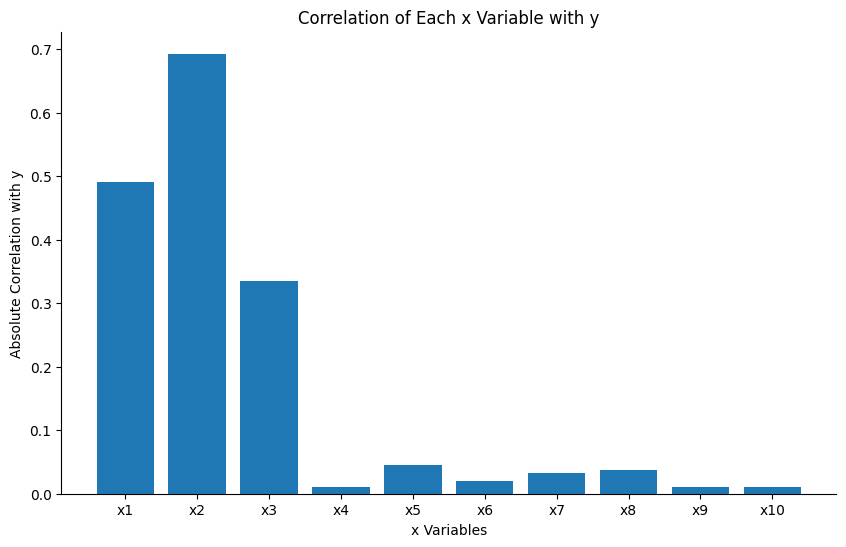

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

corr_df = pd.DataFrame(temp3) # Please run the cell above to initialize temp3

corr_df

correlation_matrix = corr_df.corr()

correlation_with_y = correlation_matrix['y'][:-1].abs()


fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(correlation_with_y.index, correlation_with_y.values)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('Absolute Correlation with y')
ax.set_xlabel('x Variables')
ax.set_title('Correlation of Each x Variable with y')


plt.show()

## Part 2 (60 Points)

In this part, you are tasked with analyzing stock market data for five major companies using the provided CSV files in [this link](https://drive.google.com/drive/folders/1Zk44P9hoMuilgXxc0hVpPBZNPnfALMtS?usp=sharing) containing historical stock data for Apple(`AAPL.csv`), Microsoft(`MSFT.csv`), Google(`GOOGL.csv`), Amazon(`AMZN.csv`), and Tesla(`TSLA.csv`). First, load the CSV files into Pandas DataFrames. Then, concatenate the DataFrames for all five companies into a single DataFrame. After concatenating the data, add a new column named `Company` that indicates the respective company for each row of data. Finally, store the concatenated DataFrame with the new column in a variable named `final_stock_data`.

Here is a short description of each column in the `final_stock_data` dataframe:
1. **Date**: The date of the stock data entry.
2. **Open**: The stock price at the beginning of the trading day.
3. **High**: The highest price the stock reached during the trading day.
4. **Low**: The lowest price the stock reached during the trading day.
5. **Close**: The stock price at the end of the trading day.
6. **Adj Close**: The closing price adjusted for dividends and stock splits.
7. **Volume**: The total number of shares traded during the trading day.
8. **Company**: The name of the company to which the stock data corresponds.

In [21]:
# Your Code Here
apple_file_id = '1d0YCeWdbUWAKOcvFD7ORWxfBp6bNfdtY'
microsoft_file_id = '1X060bNHnJ39hXAkP0Mg1Lrflsc0Z4xzQ'
google_file_id = '1FYEkKMkYrOTi3IgAR9xearuQjZ_kYa1n'
amazon_file_id = '1QmaMRyAXOLHACdDHsRT2UOTjXTtv5smL'
tesla_file_id = '1B20oYhBelK0WCDRc7Un6IfU85s7tA-t6'

apple_df = pd.read_csv(f"https://drive.google.com/uc?id={apple_file_id}")
microsoft_df = pd.read_csv(f"https://drive.google.com/uc?id={microsoft_file_id}")
google_df = pd.read_csv(f"https://drive.google.com/uc?id={google_file_id}")
amazon_df = pd.read_csv(f"https://drive.google.com/uc?id={amazon_file_id}")
tesla_df = pd.read_csv(f"https://drive.google.com/uc?id={tesla_file_id}")

apple_df['Company'] = 'Apple'
microsoft_df['Company'] = 'Microsoft'
google_df['Company'] = 'Google'
amazon_df['Company'] = 'Amazon'
tesla_df['Company'] = 'Tesla'

finalstockdata = pd.concat([apple_df, microsoft_df, google_df, amazon_df, tesla_df])

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.float_format', '{:.2f}'.format)

print(finalstockdata)

#If the data is concatenated correctly, the resulting output will be as follows.

        Date     Open   High    Low   Close  Adj Close   Volume  Company
0    2024-01-02 187.15 188.44 183.89 185.64   184.94    82488700   Apple
1    2024-01-03 184.22 185.88 183.43 184.25   183.55    58414500   Apple
2    2024-01-04 182.15 183.09 180.88 181.91   181.22    71983600   Apple
3    2024-01-05 181.99 182.76 180.17 181.18   180.50    62303300   Apple
4    2024-01-08 182.09 185.60 181.50 185.56   184.86    59144500   Apple
..          ...    ...    ...    ...    ...        ...       ...     ...
163  2024-08-26 218.75 219.09 211.01 213.21   213.21    59301200   Tesla
164  2024-08-27 213.25 215.66 206.94 209.21   209.21    62821400   Tesla
165  2024-08-28 209.72 211.84 202.59 205.75   205.75    64116400   Tesla
166  2024-08-29 209.80 214.89 205.97 206.28   206.28    62308800   Tesla
167  2024-08-30 208.63 214.57 207.03 214.11   214.11    63370600   Tesla

[840 rows x 8 columns]


### Q1: Stock Price Distribution (20 pts)
Create a figure with five subplots, each displaying a box plot for the distribution of daily closing prices for the top five companies. Analyze the spread and central tendency of the data in each subplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


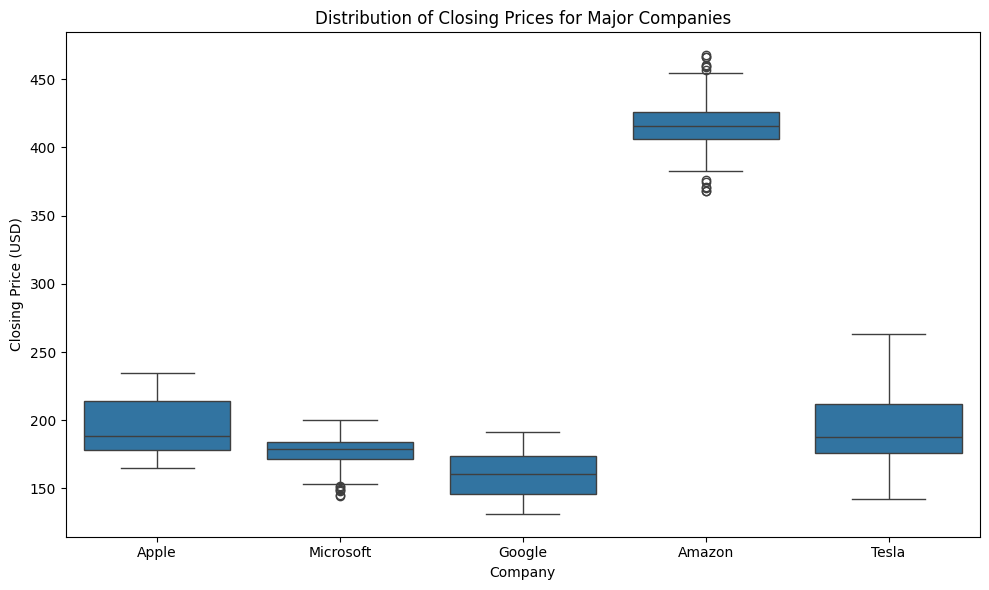

In [18]:
# Your Code Here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x='Company', y='Close', data=final_stock_data)

plt.title('Distribution of Closing Prices for Major Companies')
plt.xlabel('Company')
plt.ylabel('Closing Price (USD)')

plt.tight_layout()
plt.show()


 **Which stock is the most volatile, and which is the most stable based on the box plots?**

Answer:

###Q2: Closing Price vs. Trading Volume (20 pts)
Create a figure with five subplots, each containing a scatter plot of Closing Price vs. Trading Volume for the top five companies.

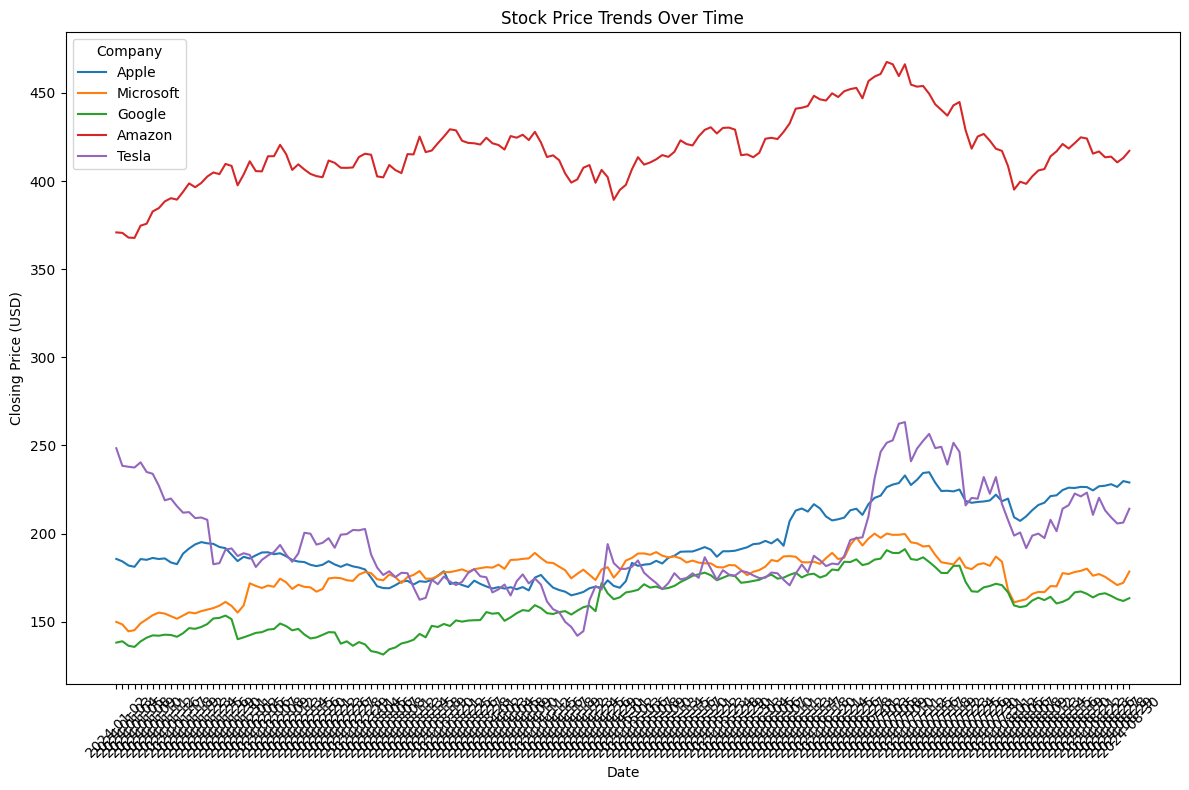

In [24]:
# Your Code Here


import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))

companyList = final_stock_data['Company'].unique()
for company in companyList:
    company_data = final_stock_data[final_stock_data['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)

plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.legend(title='Company')

plt.tight_layout()
plt.show()


**Is there any visible correlation between the closing price and trading volume for each company?**

Answer:



### Q3: Average Closing Prices (20 pts)
Create a bar chart that displays the average closing prices of each company over the entire time period.

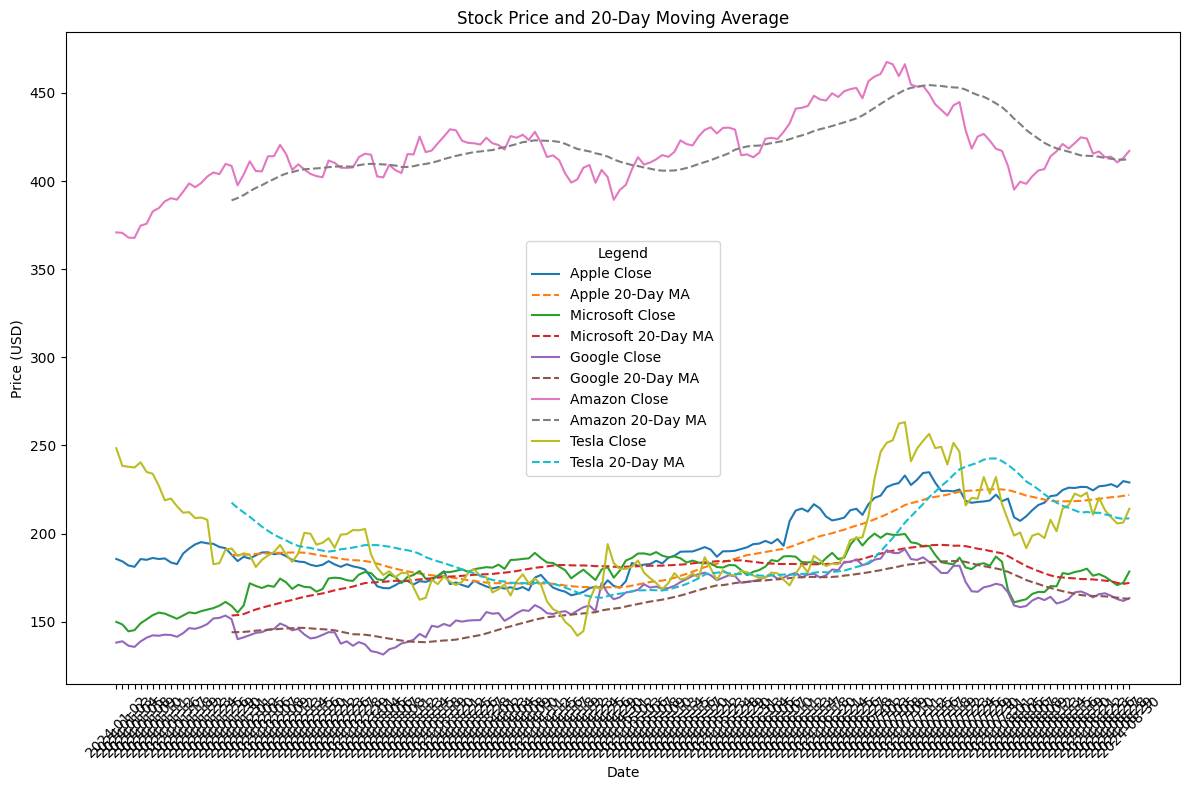

In [23]:
# Your Code Here

import pandas as pd
import matplotlib.pyplot as plt


final_stock_data['20_day_MA'] = final_stock_data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=20).mean())

plt.figure(figsize=(12, 8))

companyList = final_stock_data['Company'].unique()
for company in companyList:
    company_data = final_stock_data[final_stock_data['Company'] == company]

    plt.plot(company_data['Date'], company_data['Close'], label=f'{company} Close')

    plt.plot(company_data['Date'], company_data['20_day_MA'], linestyle='--', label=f'{company} 20-Day MA')

plt.title('Stock Price and 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend(title='Legend')

plt.tight_layout()
plt.show()



**Which company had the highest average closing price?**

Answer:

### Optional

To download stock market data for any timeframe for five major companies, you can use the following code:

```python
# If yfinance is not installed, install it using: pip install yfinance
import yfinance as yf

# List of ticker symbols for the top 5 companies
top_companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Loop through each company's ticker symbol
for company in top_companies:
    # Download the stock data for the company
    company_data = yf.download(company, start="2024-01-01", end="2024-09-01", progress=False)
    # Save the stock data as a CSV file in the current directory
    company_data.to_csv(company + ".csv")
```

This script allows you to download the stock market data for the specified companies over the given date range and save it as CSV files in your current directory. You can modify the `start` and `end` parameters to set your desired timeframe.